In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mt


dataset = pd.read_csv('irisdata.csv')

dataset['class'] = dataset['class'].str.replace('Iris-setosa','1')
dataset['class'] = dataset['class'].str.replace('Iris-virginica','0')

 
dataset = dataset.astype('float64')
dataset



x1   x2   x3   x4  class
0   5.1  3.5  1.4  0.2    1.0
1   4.9  3.0  1.4  0.2    1.0
2   4.7  3.2  1.3  0.2    1.0
3   4.6  3.1  1.5  0.2    1.0
4   5.0  3.6  1.4  0.2    1.0
5   5.4  3.9  1.7  0.4    1.0
6   4.6  3.4  1.4  0.3    1.0
7   5.0  3.4  1.5  0.2    1.0
8   4.4  2.9  1.4  0.2    1.0
9   4.9  3.1  1.5  0.1    1.0
10  5.4  3.7  1.5  0.2    1.0
11  4.8  3.4  1.6  0.2    1.0
12  4.8  3.0  1.4  0.1    1.0
13  4.3  3.0  1.1  0.1    1.0
14  5.8  4.0  1.2  0.2    1.0
15  5.7  4.4  1.5  0.4    1.0
16  5.4  3.9  1.3  0.4    1.0
17  5.1  3.5  1.4  0.3    1.0
18  5.7  3.8  1.7  0.3    1.0
19  5.1  3.8  1.5  0.3    1.0
20  5.4  3.4  1.7  0.2    1.0
21  5.1  3.7  1.5  0.4    1.0
22  4.6  3.6  1.0  0.2    1.0
23  5.1  3.3  1.7  0.5    1.0
24  4.8  3.4  1.9  0.2    1.0
25  5.0  3.0  1.6  0.2    1.0
26  5.0  3.4  1.6  0.4    1.0
27  5.2  3.5  1.5  0.2    1.0
28  5.2  3.4  1.4  0.2    1.0
29  4.7  3.2  1.6  0.2    1.0
..  ...  ...  ...  ...    ...
70  6.9  3.2  5.7  2.3    0.0
71  5.6  2.8  4.9  2.0    0.0
72  7.7  2.8  6.7  2.0    0.0
73  6.3  2.7  4.9  1.8    0.0
74  6.7  3.3  5.7  2.1    0.0
75  7.2  3.2  6.0  1.8    0.0
76  6.2  2.8  4.8  1.8    0.0
77  6.1  3.0  4.9  1.8    0.0
78  6.4  2.8  5.6  2.1    0.0
79  7.2  3.0  5.8  1.6    0.0
80  7.4  2.8  6.1  1.9    0.0
81  7.9  3.8  6.4  2.0    0.0
82  6.4  2.8  5.6  2.2    0.0
83  6.3  2.8  5.1  1.5    0.0
84  6.1  2.6  5.6  1.4    0.0
85  7.7  3.0  6.1  2.3    0.0
86  6.3  3.4  5.6  2.4    0.0
87  6.4  3.1  5.5  1.8    0.0
88  6.0  3.0  4.8  1.8    0.0
89  6.9  3.1  5.4  2.1    0.0
90  6.7  3.1  5.6  2.4    0.0
91  6.9  3.1  5.1  2.3    0.0
92  5.8  2.7  5.1  1.9    0.0
93  6.8  3.2  5.9  2.3    0.0
94  6.7  3.3  5.7  2.5    0.0
95  6.7  3.0  5.2  2.3    0.0
96  6.3  2.5  5.0  1.9    0.0
97  6.5  3.0  5.2  2.0    0.0
98  6.2  3.4  5.4  2.3    0.0
99  5.9  3.0  5.1  1.8    0.0

[100 rows x 5 columns]

In [2]:

# Input initial weight, separated by whitespace (theta1, theta2, theta3, theta4) 
# ex: 0.2 0.3 0.4 0.5

theta = [float(x) for x in input('Input initial weight = ').split()]
theta = np.array(theta)

                            
# Input initial bias
# ex: 0.9
bias = [float(x) for x in input('Input initial bias = ').split()]
bias = np.array(bias)




Input initial weight = 0.2 0.3 0.4 0.2
Input initial bias = 0.8


In [3]:
# Initial Variables

alpha = 0.1

error_each_epoch = np.zeros(60)
delta_theta_row = np.zeros(4)






In [4]:
# Functions
import math

# i = nomer iterasinya (dataset ke berapa)

# Functions
def hFunc(theta,bias,r):
    return np.dot(dataset.iloc[r,:4],np.transpose(theta))+bias

def sigmoid(hFunc):
    return 1/(1+math.exp(-hFunc))

# i = x array data ke berapa
def errorFunc(prediction,r):
    return (prediction-dataset.iloc[r,4])**2


# xn    = x ke berapa , x1,x2,x3,x4
# x_row = x array data ke berapa 
def delta_theta(fact,prediction,x_row):
    return 2*(prediction-fact)*(1-prediction)*prediction*x_row

def new_theta(theta,alpha,delta_theta):
    return theta-alpha*delta_theta

def delta_bias(fact,prediction):
    return 2*(prediction-fact)*(1-prediction)*prediction

def new_bias(bias,alpha,delta_bias):
    return bias - alpha*delta_bias


def to_bias(bias,alpha,d_bias_value):
    bias = new_bias(bias,alpha,d_bias_value)

In [5]:
# # User input theta
# initial_theta = [float(x) for x in input().split()]
# np.array(initial_theta)

In [6]:
# e = epoch ke berapa
for e in range(60):
    total = 0
    print('=======================================')
    
    # r = baris data ke berapa
    for r in range(100):
        print('Row: ', r)
        print('')

        x_row = np.array(dataset.iloc[r,:4]) #x_row
        print('x1,x2,x3,x4: ', x_row)
        
        fact_row = np.array(dataset.iloc[r,4]) #Fact
        print('fact: ', fact_row)

        print('----------------------')
        
        
        prediction_val = hFunc(theta,bias,r)

        print('h: ', prediction_val)
    
#         sigmoid_val = sigmoid(h_value)
        sigmoid_val = sigmoid(prediction_val)
        print('sigmoid: ', sigmoid_val)

        
        error_val = errorFunc(sigmoid_val,r)
        print('error: ', error_val)
        total += error_val

        
            # j = x1 atau x2 atau x3 atau x4
        for j in range(len(x_row)):
            delta_theta_row[j] = delta_theta(fact_row,sigmoid_val,x_row[j])
            print('d_theta ',j ,' : ',  delta_theta_row[j])

        
        delta_bias_val = delta_bias(fact_row,sigmoid_val)
        print('d_bias: ', delta_bias_val)



        for j in range(len(theta)):
            theta[j] = new_theta(theta[j],alpha,delta_theta_row[j])
            print('new_theta ',j ,' : ', theta[j])


        to_bias(bias,alpha,delta_bias_val)



          
        print('----------------------')
        print('total: ',total)
        print('\n')
        
    error_each_epoch[e] = total




Row:  0

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.47]
sigmoid:  0.9698220185141241
error:  0.000910710566562
d_theta  0  :  -0.00900891703144
d_theta  1  :  -0.00618259011962
d_theta  2  :  -0.00247303604785
d_theta  3  :  -0.000353290863978
d_bias:  -0.00176645431989
new_theta  0  :  0.200900891703
new_theta  1  :  0.300618259012
new_theta  2  :  0.400247303605
new_theta  3  :  0.200035329086
----------------------
total:  0.000910710566562


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.28662244]
sigmoid:  0.9639670194800841
error:  0.00129837568515
d_theta  0  :  -0.0122655951259
d_theta  1  :  -0.00750954803627
d_theta  2  :  -0.00350445575026
d_theta  3  :  -0.000500636535751
d_bias:  -0.00250318267876
new_theta  0  :  0.202127451216
new_theta  1  :  0.301369213816
new_theta  2  :  0.40059774918
new_theta  3  :  0.20008539274
----------------------
total:  0.00220908625171


Row:  2

x1,x2,x3,x4:  [ 4.7 

d_theta  1  :  -0.00489588175972
d_theta  2  :  -0.00244794087986
d_theta  3  :  -0.000305992609983
d_bias:  -0.00152996304991
new_theta  0  :  0.223170515384
new_theta  1  :  0.315793836992
new_theta  2  :  0.406774998934
new_theta  3  :  0.201041898132
----------------------
total:  0.0244425821601


Row:  30

x1,x2,x3,x4:  [ 4.8  3.1  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.54122775]
sigmoid:  0.9718383331879455
error:  0.000793079477633
d_theta  0  :  -0.00739915236123
d_theta  1  :  -0.0047786192333
d_theta  2  :  -0.00246638412041
d_theta  3  :  -0.000308298015051
d_bias:  -0.00154149007526
new_theta  0  :  0.22391043062
new_theta  1  :  0.316271698915
new_theta  2  :  0.407021637346
new_theta  3  :  0.201072727933
----------------------
total:  0.0252356616377


Row:  31

x1,x2,x3,x4:  [ 5.4  3.4  1.5  0.4]
fact:  1.0
----------------------
h:  [ 3.77540165]
sigmoid:  0.9775860250877718
error:  0.000502386271366
d_theta  0  :  -0.0053041586193
d_theta  1  :  -0.00333

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  [ 5.51188329]
sigmoid:  0.9959777492734836
error:  0.991971677048
d_theta  0  :  0.0534654479024
d_theta  1  :  0.0199497939934
d_theta  2  :  0.0462835220648
d_theta  3  :  0.0143638516753
d_bias:  0.00797991759738
new_theta  0  :  0.199547036378
new_theta  1  :  0.307887904585
new_theta  2  :  0.378013034094
new_theta  3  :  0.190268639689
----------------------
total:  8.97785294361


Row:  59

x1,x2,x3,x4:  [ 7.2  3.6  6.1  2.5]
fact:  0.0
----------------------
h:  [ 6.12668623]
sigmoid:  0.9978209529923437
error:  0.995646654231
d_theta  0  :  0.0312416764212
d_theta  1  :  0.0156208382106
d_theta  2  :  0.0264686425235
d_theta  3  :  0.0108478043129
d_bias:  0.00433912172517
new_theta  0  :  0.196422868736
new_theta  1  :  0.306325820764
new_theta  2  :  0.375366169842
new_theta  3  :  0.189183859258
----------------------
total:  9.97349959784


Row:  60

x1,x2,x3,x4:  [ 6.5  3.2  5.1  2. ]
fact:  0.0
---

new_theta  0  :  -0.439720764361
new_theta  1  :  0.0213646012539
new_theta  2  :  -0.150189165222
new_theta  3  :  0.00693193535815
----------------------
total:  25.3740603884


Row:  86

x1,x2,x3,x4:  [ 6.3  3.4  5.6  2.4]
fact:  0.0
----------------------
h:  [-2.72202385]
sigmoid:  0.0616862196814397
error:  0.00380518969859
d_theta  0  :  0.0449878203295
d_theta  1  :  0.0242791411302
d_theta  2  :  0.0399891736262
d_theta  3  :  0.0171382172684
d_bias:  0.00714092386182
new_theta  0  :  -0.444219546394
new_theta  1  :  0.0189366871409
new_theta  2  :  -0.154188082584
new_theta  3  :  0.00521811363131
----------------------
total:  25.3778655781


Row:  87

x1,x2,x3,x4:  [ 6.4  3.1  5.5  1.8]
fact:  0.0
----------------------
h:  [-2.82294322]
sigmoid:  0.05609688642219673
error:  0.00314686066626
d_theta  0  :  0.0380202442353
d_theta  1  :  0.0184160558015
d_theta  2  :  0.0326736473897
d_theta  3  :  0.0106931936912
d_bias:  0.00594066316177
new_theta  0  :  -0.448021570818
ne

new_theta  0  :  -0.0106867412685
new_theta  1  :  0.314118377573
new_theta  2  :  -0.0487156076215
new_theta  3  :  0.0139834668959
----------------------
total:  1.70629941658


Row:  6

x1,x2,x3,x4:  [ 4.6  3.4  1.4  0.3]
fact:  1.0
----------------------
h:  [ 1.75483666]
sigmoid:  0.8525618086789284
error:  0.02173802026
d_theta  0  :  -0.170503654004
d_theta  1  :  -0.126024439916
d_theta  2  :  -0.051892416436
d_theta  3  :  -0.011119803522
d_bias:  -0.03706601174
new_theta  0  :  0.00636362413193
new_theta  1  :  0.326720821565
new_theta  2  :  -0.043526365978
new_theta  3  :  0.0150954472481
----------------------
total:  1.72803743684


Row:  7

x1,x2,x3,x4:  [ 5.   3.4  1.5  0.2]
fact:  1.0
----------------------
h:  [ 1.88039845]
sigmoid:  0.8676568870547454
error:  0.017514699544
d_theta  0  :  -0.151967496841
d_theta  1  :  -0.103337897852
d_theta  2  :  -0.0455902490522
d_theta  3  :  -0.00607869987363
d_bias:  -0.0303934993682
new_theta  0  :  0.021560373816
new_theta  

new_theta  1  :  0.424268159711
new_theta  2  :  -0.000716635031748
new_theta  3  :  0.0212653472774
----------------------
total:  1.88892706122


Row:  36

x1,x2,x3,x4:  [ 5.5  3.5  1.3  0.2]
fact:  1.0
----------------------
h:  [ 3.11845388]
sigmoid:  0.9576475640138312
error:  0.00179372883396
d_theta  0  :  -0.0188953605318
d_theta  1  :  -0.0120243203384
d_theta  2  :  -0.0044661761257
d_theta  3  :  -0.000687104019338
d_bias:  -0.00343552009669
new_theta  0  :  0.152833877935
new_theta  1  :  0.425470591745
new_theta  2  :  -0.000270017419178
new_theta  3  :  0.0213340576794
----------------------
total:  1.89072079005


Row:  37

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 2.86957322]
sigmoid:  0.9463216727867753
error:  0.00288136281241
d_theta  0  :  -0.0267216215501
d_theta  1  :  -0.0169055156746
d_theta  2  :  -0.00818008822964
d_theta  3  :  -0.000545339215309
d_bias:  -0.00545339215309
new_theta  0  :  0.15550604009
new_theta  1  :  0.427

----------------------
total:  4.90516658541


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-2.56378387]
sigmoid:  0.07150591286175359
error:  0.00511309557419
d_theta  0  :  0.0541212606868
d_theta  1  :  0.0237373950381
d_theta  2  :  0.0474747900761
d_theta  3  :  0.0189899160304
d_bias:  0.00949495801522
new_theta  0  :  -0.297535326523
new_theta  1  :  0.225176060718
new_theta  2  :  -0.409355938006
new_theta  3  :  -0.124155907558
----------------------
total:  4.91027968098


Row:  64

x1,x2,x3,x4:  [ 5.8  2.8  5.1  2.4]
fact:  0.0
----------------------
h:  [-2.68090139]
sigmoid:  0.0641097722654245
error:  0.00411006289992
d_theta  0  :  0.0446201853596
d_theta  1  :  0.0215407791391
d_theta  2  :  0.0392349905748
d_theta  3  :  0.0184635249764
d_bias:  0.00769313540683
new_theta  0  :  -0.301997345059
new_theta  1  :  0.223021982804
new_theta  2  :  -0.413279437064
new_theta  3  :  -0.126002260055
----------------------
total:  4.914389

Row:  91

x1,x2,x3,x4:  [ 6.9  3.1  5.1  2.3]
fact:  0.0
----------------------
h:  [-3.546941]
sigmoid:  0.0280057238699779
error:  0.000784320569481
d_theta  0  :  0.0105205004378
d_theta  1  :  0.00472660164596
d_theta  2  :  0.00777602206271
d_theta  3  :  0.00350683347926
d_bias:  0.00152471020837
new_theta  0  :  -0.345075338209
new_theta  1  :  0.203250130856
new_theta  2  :  -0.448990462369
new_theta  3  :  -0.138974761379
----------------------
total:  4.94992851863


Row:  92

x1,x2,x3,x4:  [ 5.8  2.7  5.1  1.9]
fact:  0.0
----------------------
h:  [-3.20656501]
sigmoid:  0.03891941580193
error:  0.00151472092636
d_theta  0  :  0.0168869189246
d_theta  1  :  0.00786115191316
d_theta  2  :  0.0148488425026
d_theta  3  :  0.00553192171666
d_bias:  0.00291153774561
new_theta  0  :  -0.346764030102
new_theta  1  :  0.202464015665
new_theta  2  :  -0.450475346619
new_theta  3  :  -0.139527953551
----------------------
total:  4.95144323956


Row:  93

x1,x2,x3,x4:  [ 6.8  3.2  5.

new_theta  3  :  -0.123247033459
----------------------
total:  0.984465635195


Row:  12

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.1]
fact:  1.0
----------------------
h:  [ 2.2319012]
sigmoid:  0.9030778956093586
error:  0.00939389431951
d_theta  0  :  -0.0814408158109
d_theta  1  :  -0.0509005098818
d_theta  2  :  -0.0237535712782
d_theta  3  :  -0.00169668366273
d_bias:  -0.0169668366273
new_theta  0  :  0.0962483377531
new_theta  1  :  0.499094971204
new_theta  2  :  -0.326688416063
new_theta  3  :  -0.123077365093
----------------------
total:  0.993859529515


Row:  13

x1,x2,x3,x4:  [ 4.3  3.   1.1  0.1]
fact:  1.0
----------------------
h:  [ 2.33948777]
sigmoid:  0.9120950245625596
error:  0.00772728470666
d_theta  0  :  -0.0606129542352
d_theta  1  :  -0.0422881076059
d_theta  2  :  -0.0155056394555
d_theta  3  :  -0.00140960358686
d_bias:  -0.0140960358686
new_theta  0  :  0.102309633177
new_theta  1  :  0.503323781965
new_theta  2  :  -0.325137852118
new_theta  3  :  -0.1229364047

new_theta  3  :  -0.1191409518
----------------------
total:  1.07972576371


Row:  40

x1,x2,x3,x4:  [ 5.   3.5  1.3  0.3]
fact:  1.0
----------------------
h:  [ 3.19547975]
sigmoid:  0.9606638175116897
error:  0.00154733525275
d_theta  0  :  -0.0148646899088
d_theta  1  :  -0.0104052829362
d_theta  2  :  -0.00386481937629
d_theta  3  :  -0.000891881394528
d_bias:  -0.00297293798176
new_theta  0  :  0.178721723675
new_theta  1  :  0.554974793193
new_theta  2  :  -0.302478258271
new_theta  3  :  -0.11905176366
----------------------
total:  1.08127309896


Row:  41

x1,x2,x3,x4:  [ 4.5  2.3  1.3  0.3]
fact:  1.0
----------------------
h:  [ 2.45175252]
sigmoid:  0.9206895145033658
error:  0.00629015310971
d_theta  0  :  -0.0521215021146
d_theta  1  :  -0.0266398788586
d_theta  2  :  -0.0150573228331
d_theta  3  :  -0.00347476680764
d_bias:  -0.0115825560255
new_theta  0  :  0.183933873887
new_theta  1  :  0.557638781079
new_theta  2  :  -0.300972525987
new_theta  3  :  -0.118704286979

new_theta  1  :  0.396793363437
new_theta  2  :  -0.612090088434
new_theta  3  :  -0.239894413177
----------------------
total:  2.17413155136


Row:  61

x1,x2,x3,x4:  [ 6.4  2.7  5.3  1.9]
fact:  0.0
----------------------
h:  [-2.79917824]
sigmoid:  0.05736859836926638
error:  0.00329115607885
d_theta  0  :  0.0397100424652
d_theta  1  :  0.016752674165
d_theta  2  :  0.0328848789165
d_theta  3  :  0.0117889188569
d_bias:  0.00620469413519
new_theta  0  :  -0.155634046189
new_theta  1  :  0.39511809602
new_theta  2  :  -0.615378576326
new_theta  3  :  -0.241073305063
----------------------
total:  2.17742270744


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-2.96379334]
sigmoid:  0.04908863398475217
error:  0.00240969398649
d_theta  0  :  0.031163113445
d_theta  1  :  0.0137484324022
d_theta  2  :  0.0252054594041
d_theta  3  :  0.00962390268156
d_bias:  0.00458281080074
new_theta  0  :  -0.158750357533
new_theta  1  :  0.39374325278
new_theta

new_theta  0  :  -0.207588359878
new_theta  1  :  0.371247671177
new_theta  2  :  -0.65875035293
new_theta  3  :  -0.257231421093
----------------------
total:  2.2211552032


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  [-3.57892979]
sigmoid:  0.02714796810259072
error:  0.000737012172099
d_theta  0  :  0.00989465229041
d_theta  1  :  0.00444542349279
d_theta  2  :  0.00774364092293
d_theta  3  :  0.00301141591447
d_bias:  0.00143400757832
new_theta  0  :  -0.208577825107
new_theta  1  :  0.370803128828
new_theta  2  :  -0.659524717022
new_theta  3  :  -0.257532562685
----------------------
total:  2.22189221537


Row:  90

x1,x2,x3,x4:  [ 6.7  3.1  5.6  2.4]
fact:  0.0
----------------------
h:  [-3.75939829]
sigmoid:  0.022767326947828733
error:  0.000518351176349
d_theta  0  :  0.00678776605562
d_theta  1  :  0.00314060817499
d_theta  2  :  0.00567335670321
d_theta  3  :  0.00243143858709
d_bias:  0.00101309941129
new_theta  0  :  -0.209256601

new_theta  3  :  -0.245989776232
----------------------
total:  0.548513553257


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  [ 2.88428262]
sigmoid:  0.9470639789938582
error:  0.00280222231996
d_theta  0  :  -0.0270696149678
d_theta  1  :  -0.0201695170348
d_theta  2  :  -0.00796165146111
d_theta  3  :  -0.00159233029222
d_bias:  -0.00530776764074
new_theta  0  :  0.14070671928
new_theta  1  :  0.607981225967
new_theta  2  :  -0.564792806186
new_theta  3  :  -0.245830543203
----------------------
total:  0.551315775577


Row:  20

x1,x2,x3,x4:  [ 5.4  3.4  1.7  0.2]
fact:  1.0
----------------------
h:  [ 2.61763857]
sigmoid:  0.9319881771249243
error:  0.00462560805079
d_theta  0  :  -0.0465589297658
d_theta  1  :  -0.0293148817044
d_theta  2  :  -0.0146574408522
d_theta  3  :  -0.00172440480614
d_bias:  -0.0086220240307
new_theta  0  :  0.145362612257
new_theta  1  :  0.610912714137
new_theta  2  :  -0.563327062101
new_theta  3  :  -0.245658102

x1,x2,x3,x4:  [ 5.3  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.5039522]
sigmoid:  0.9708000123348358
error:  0.000852639279646
d_theta  0  :  -0.00877406756589
d_theta  1  :  -0.00612529245166
d_theta  2  :  -0.00248322666959
d_theta  3  :  -0.000331096889279
d_bias:  -0.00165548444639
new_theta  0  :  0.215339916826
new_theta  1  :  0.657025352722
new_theta  2  :  -0.541780594162
new_theta  3  :  -0.241882766707
----------------------
total:  0.631852545665


Row:  49

x1,x2,x3,x4:  [ 5.   3.3  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.23801386]
sigmoid:  0.9622400110609196
error:  0.00142581676468
d_theta  0  :  -0.0137197793942
d_theta  1  :  -0.00905505440015
d_theta  2  :  -0.00384153823036
d_theta  3  :  -0.000548791175766
d_bias:  -0.00274395587883
new_theta  0  :  0.216711894765
new_theta  1  :  0.657930858162
new_theta  2  :  -0.541396440339
new_theta  3  :  -0.241827887589
----------------------
total:  0.63327836243


Row:  50

x1,x2,x3,x4:  [ 6.3  3

new_theta  1  :  0.511033898467
new_theta  2  :  -0.810636596877
new_theta  3  :  -0.349645082758
----------------------
total:  1.11540701574


Row:  75

x1,x2,x3,x4:  [ 7.2  3.2  6.   1.8]
fact:  0.0
----------------------
h:  [-3.60801756]
sigmoid:  0.026390208073987228
error:  0.000696443082188
d_theta  0  :  0.00976411878246
d_theta  1  :  0.00433960834776
d_theta  2  :  0.00813676565205
d_theta  3  :  0.00244102969562
d_bias:  0.00135612760868
new_theta  0  :  -0.0773854825554
new_theta  1  :  0.510599937633
new_theta  2  :  -0.811450273442
new_theta  3  :  -0.349889185728
----------------------
total:  1.11610345882


Row:  76

x1,x2,x3,x4:  [ 6.2  2.8  4.8  1.8]
fact:  0.0
----------------------
h:  [-2.77487201]
sigmoid:  0.05869724609826389
error:  0.00344536669952
d_theta  0  :  0.0402148512145
d_theta  1  :  0.0181615457098
d_theta  2  :  0.0311340783596
d_theta  3  :  0.0116752793849
d_bias:  0.00648626632492
new_theta  0  :  -0.0814069676768
new_theta  1  :  0.50878378306

d_theta  2  :  -0.0293698518485
d_theta  3  :  -0.00419569312121
d_bias:  -0.020978465606
new_theta  0  :  0.0697036795618
new_theta  1  :  0.6147982754
new_theta  2  :  -0.786459280404
new_theta  3  :  -0.352189802017
----------------------
total:  0.245823877827


Row:  5

x1,x2,x3,x4:  [ 5.4  3.9  1.7  0.4]
fact:  1.0
----------------------
h:  [ 2.09625645]
sigmoid:  0.890538792392481
error:  0.0119817559709
d_theta  0  :  -0.115238359725
d_theta  1  :  -0.0832277042459
d_theta  2  :  -0.0362787428764
d_theta  3  :  -0.00853617479445
d_bias:  -0.0213404369861
new_theta  0  :  0.0812275155343
new_theta  1  :  0.623121045825
new_theta  2  :  -0.782831406116
new_theta  3  :  -0.351336184538
----------------------
total:  0.257805633798


Row:  6

x1,x2,x3,x4:  [ 4.6  3.4  1.4  0.3]
fact:  1.0
----------------------
h:  [ 2.0908933]
sigmoid:  0.8900149001224911
error:  0.0120967221951
d_theta  0  :  -0.0990496195655
d_theta  1  :  -0.0732105883745
d_theta  2  :  -0.0301455363895
d_thet

d_bias:  -0.000995468890535
new_theta  0  :  0.203794285064
new_theta  1  :  0.705991368816
new_theta  2  :  -0.745329511867
new_theta  3  :  -0.345597399505
----------------------
total:  0.394321275688


Row:  34

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 2.83461123]
sigmoid:  0.9445177448850332
error:  0.00307828063264
d_theta  0  :  -0.0284934086764
d_theta  1  :  -0.0180264422239
d_theta  2  :  -0.0087224720438
d_theta  3  :  -0.000581498136253
d_bias:  -0.00581498136253
new_theta  0  :  0.206643625932
new_theta  1  :  0.707794013039
new_theta  2  :  -0.744457264663
new_theta  3  :  -0.345539249692
----------------------
total:  0.397399556321


Row:  35

x1,x2,x3,x4:  [ 5.   3.2  1.2  0.2]
fact:  1.0
----------------------
h:  [ 3.1357024]
sigmoid:  0.9583416455993652
error:  0.00173541849137
d_theta  0  :  -0.0166312381282
d_theta  1  :  -0.0106439924021
d_theta  2  :  -0.00399149715077
d_theta  3  :  -0.000665249525129
d_bias:  -0.0033262476256

new_theta  3  :  -0.41511178402
----------------------
total:  0.646622585003


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-2.83216105]
sigmoid:  0.05561079442928574
error:  0.00309256045706
d_theta  0  :  0.0332946201307
d_theta  1  :  0.0146029035661
d_theta  2  :  0.0292058071322
d_theta  3  :  0.0116823228529
d_bias:  0.00584116142644
new_theta  0  :  0.0338361923621
new_theta  1  :  0.626708121212
new_theta  2  :  -0.919761128555
new_theta  3  :  -0.416280016305
----------------------
total:  0.64971514546


Row:  64

x1,x2,x3,x4:  [ 5.8  2.8  5.1  2.4]
fact:  0.0
----------------------
h:  [-2.93882114]
sigmoid:  0.050267522978100825
error:  0.00252682386635
d_theta  0  :  0.0278377575992
d_theta  1  :  0.0134389174617
d_theta  2  :  0.0244780282338
d_theta  3  :  0.01151907211
d_bias:  0.00479961337918
new_theta  0  :  0.0310524166022
new_theta  1  :  0.625364229466
new_theta  2  :  -0.922208931379
new_theta  3  :  -0.417431923516
------

d_theta  1  :  0.00272355653355
d_theta  2  :  0.00491997309286
d_theta  3  :  0.00210855989694
d_bias:  0.000878566623725
new_theta  0  :  -0.0151478236446
new_theta  1  :  0.604009511695
new_theta  2  :  -0.960220160163
new_theta  3  :  -0.431175061538
----------------------
total:  0.690590294166


Row:  91

x1,x2,x3,x4:  [ 6.9  3.1  5.1  2.3]
fact:  0.0
----------------------
h:  [-3.32091596]
sigmoid:  0.034860577792577674
error:  0.00121525988403
d_theta  0  :  0.0161859540678
d_theta  1  :  0.0072719503783
d_theta  2  :  0.0119635312675
d_theta  3  :  0.00539531802261
d_bias:  0.00234579044461
new_theta  0  :  -0.0167664190514
new_theta  1  :  0.603282316658
new_theta  2  :  -0.96141651329
new_theta  3  :  -0.431714593341
----------------------
total:  0.69180555405


Row:  92

x1,x2,x3,x4:  [ 5.8  2.7  5.1  1.9]
fact:  0.0
----------------------
h:  [-3.39186492]
sigmoid:  0.032550675625307536
error:  0.00105954648366
d_theta  0  :  0.0118906673453
d_theta  1  :  0.005535310660

d_theta  2  :  -0.00691449031619
d_theta  3  :  -0.00138289806324
d_bias:  -0.00460966021079
new_theta  0  :  0.173926849399
new_theta  1  :  0.733181516408
new_theta  2  :  -0.910004733329
new_theta  3  :  -0.425816245294
----------------------
total:  0.239556311528


Row:  20

x1,x2,x3,x4:  [ 5.4  3.4  1.7  0.2]
fact:  1.0
----------------------
h:  [ 2.59985085]
sigmoid:  0.9308519797951565
error:  0.00478144869825
d_theta  0  :  -0.0480688666602
d_theta  1  :  -0.030265582712
d_theta  2  :  -0.015132791356
d_theta  3  :  -0.00178032839482
d_bias:  -0.00890164197411
new_theta  0  :  0.178733736065
new_theta  1  :  0.73620807468
new_theta  2  :  -0.908491454193
new_theta  3  :  -0.425638212454
----------------------
total:  0.244337760227


Row:  21

x1,x2,x3,x4:  [ 5.1  3.7  1.5  0.4]
fact:  1.0
----------------------
h:  [ 2.90251946]
sigmoid:  0.9479708425808737
error:  0.00270703322174
d_theta  0  :  -0.0261751233539
d_theta  1  :  -0.0189897953744
d_theta  2  :  -0.007698565692

total:  0.318046271972


Row:  47

x1,x2,x3,x4:  [ 4.6  3.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.10400735]
sigmoid:  0.9570577418568532
error:  0.00184403753443
d_theta  0  :  -0.0162366236672
d_theta  1  :  -0.0112950425511
d_theta  2  :  -0.00494158111609
d_theta  3  :  -0.000705940159441
d_bias:  -0.00352970079721
new_theta  0  :  0.247975755308
new_theta  1  :  0.781583350749
new_theta  2  :  -0.886857672716
new_theta  3  :  -0.421789539002
----------------------
total:  0.319890309506


Row:  48

x1,x2,x3,x4:  [ 5.3  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.59148548]
sigmoid:  0.9731816782738947
error:  0.000719222380205
d_theta  0  :  -0.00741930085601
d_theta  1  :  -0.00517951191835
d_theta  2  :  -0.00209980212906
d_theta  3  :  -0.000279973617208
d_bias:  -0.00139986808604
new_theta  0  :  0.248717685393
new_theta  1  :  0.782101301941
new_theta  2  :  -0.886647692503
new_theta  3  :  -0.42176154164
----------------------
total:  0.320609531887

d_theta  2  :  0.0133875801964
d_theta  3  :  0.00540200604414
d_bias:  0.00234869828006
new_theta  0  :  0.0848306657897
new_theta  1  :  0.704071929884
new_theta  2  :  -1.03216217859
new_theta  3  :  -0.477287089328
----------------------
total:  0.478067967583


Row:  71

x1,x2,x3,x4:  [ 5.6  2.8  4.9  2. ]
fact:  0.0
----------------------
h:  [-2.76571572]
sigmoid:  0.05920519734780632
error:  0.00350525539299
d_theta  0  :  0.0369345318238
d_theta  1  :  0.0184672659119
d_theta  2  :  0.0323177153458
d_theta  3  :  0.0131909042228
d_bias:  0.00659545211139
new_theta  0  :  0.0811372126073
new_theta  1  :  0.702225203293
new_theta  2  :  -1.03539395013
new_theta  3  :  -0.47860617975
----------------------
total:  0.481573222976


Row:  72

x1,x2,x3,x4:  [ 7.7  2.8  6.7  2. ]
fact:  0.0
----------------------
h:  [-4.50336472]
sigmoid:  0.010950440914409493
error:  0.00011991215622
d_theta  0  :  0.00182642560467
d_theta  1  :  0.000664154765335
d_theta  2  :  0.00158922747419
d_

new_theta  0  :  0.0447213716383
new_theta  1  :  0.685410068348
new_theta  2  :  -1.06486995897
new_theta  3  :  -0.48925041947
----------------------
total:  0.511511641426


Row:  95

x1,x2,x3,x4:  [ 6.7  3.   5.2  2.3]
fact:  0.0
----------------------
h:  [-3.50673636]
sigmoid:  0.02912116757291504
error:  0.00084804240081
d_theta  0  :  0.0110328419737
d_theta  1  :  0.00494007849568
d_theta  2  :  0.00856280272585
d_theta  3  :  0.00378739351336
d_bias:  0.00164669283189
new_theta  0  :  0.043618087441
new_theta  1  :  0.684916060499
new_theta  2  :  -1.06572623924
new_theta  3  :  -0.489629158822
----------------------
total:  0.512359683827


Row:  96

x1,x2,x3,x4:  [ 6.3  2.5  5.   1.9]
fact:  0.0
----------------------
h:  [-3.4718425]
sigmoid:  0.03012410331602231
error:  0.000907461600594
d_theta  0  :  0.0110895766831
d_theta  1  :  0.00440062566791
d_theta  2  :  0.00880125133583
d_theta  3  :  0.00334447550761
d_bias:  0.00176025026717
new_theta  0  :  0.0425091297726
n

new_theta  0  :  0.175928701184
new_theta  1  :  0.774645905905
new_theta  2  :  -1.02925653058
new_theta  3  :  -0.485457449508
----------------------
total:  0.161743439588


Row:  15

x1,x2,x3,x4:  [ 5.7  4.4  1.5  0.4]
fact:  1.0
----------------------
h:  [ 3.47316781]
sigmoid:  0.9699145937239463
error:  0.000905131670795
d_theta  0  :  -0.0100080647509
d_theta  1  :  -0.00772552366736
d_theta  2  :  -0.00263370125024
d_theta  3  :  -0.000702320333397
d_bias:  -0.00175580083349
new_theta  0  :  0.176929507659
new_theta  1  :  0.775418458271
new_theta  2  :  -1.02899316045
new_theta  3  :  -0.485387217475
----------------------
total:  0.162648571259


Row:  16

x1,x2,x3,x4:  [ 5.4  3.9  1.3  0.4]
fact:  1.0
----------------------
h:  [ 3.24770533]
sigmoid:  0.9625905694338855
error:  0.00139946549528
d_theta  0  :  -0.0145488127105
d_theta  1  :  -0.0105074758464
d_theta  2  :  -0.00350249194881
d_theta  3  :  -0.0010776898304
d_bias:  -0.00269422457601
new_theta  0  :  0.1783843

d_theta  0  :  -0.0202149126485
d_theta  1  :  -0.0141504388539
d_theta  2  :  -0.0064687720475
d_theta  3  :  -0.00242578951781
d_bias:  -0.00404298252969
new_theta  0  :  0.251927101462
new_theta  1  :  0.824552044871
new_theta  2  :  -1.00581049914
new_theta  3  :  -0.481266009023
----------------------
total:  0.243234105426


Row:  44

x1,x2,x3,x4:  [ 5.1  3.8  1.9  0.4]
fact:  1.0
----------------------
h:  [ 3.11457964]
sigmoid:  0.9574901506504597
error:  0.00180708729172
d_theta  0  :  -0.0176487364885
d_theta  1  :  -0.0131500389522
d_theta  2  :  -0.00657501947611
d_theta  3  :  -0.00138421462655
d_bias:  -0.00346053656638
new_theta  0  :  0.253691975111
new_theta  1  :  0.825867048766
new_theta  2  :  -1.00515299719
new_theta  3  :  -0.48112758756
----------------------
total:  0.245041192717


Row:  45

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.3]
fact:  1.0
----------------------
h:  [ 2.94377015]
sigmoid:  0.9499682212648245
error:  0.00250317888341
d_theta  0  :  -0.022828227757

----------------------
h:  [-3.76065947]
sigmoid:  0.022739284057150543
error:  0.000517075039432
d_theta  0  :  0.00778188369776
d_theta  1  :  0.00384041013656
d_theta  2  :  0.0067712494513
d_theta  3  :  0.00222339534222
d_bias:  0.00101063424646
new_theta  0  :  0.138666043135
new_theta  1  :  0.772668020804
new_theta  2  :  -1.1091651425
new_theta  3  :  -0.520726051317
----------------------
total:  0.363181618342


Row:  68

x1,x2,x3,x4:  [ 7.7  2.6  6.9  2.3]
fact:  0.0
----------------------
h:  [-4.97424402]
sigmoid:  0.00686627200596734
error:  4.71456912599e-05
d_theta  0  :  0.000721058432245
d_theta  1  :  0.000243474275823
d_theta  2  :  0.000646143270454
d_theta  3  :  0.000215381090151
d_bias:  9.36439522397e-05
new_theta  0  :  0.138593937292
new_theta  1  :  0.772643673377
new_theta  2  :  -1.10922975683
new_theta  3  :  -0.520747589426
----------------------
total:  0.363228764033


Row:  69

x1,x2,x3,x4:  [ 6.   2.2  5.   1.5]
fact:  0.0
----------------------
h: 

error:  0.000248729644801
d_theta  0  :  0.00332937368412
d_theta  1  :  0.00156676408664
d_theta  2  :  0.00288872128475
d_theta  3  :  0.00112611168728
d_bias:  0.000489613777076
new_theta  0  :  0.0941727776065
new_theta  1  :  0.752246123147
new_theta  2  :  -1.14543641157
new_theta  3  :  -0.533865868666
----------------------
total:  0.400301552885


Row:  94

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.5]
fact:  0.0
----------------------
h:  [-3.9502824]
sigmoid:  0.018885728596358113
error:  0.000356670744615
d_theta  0  :  0.00468912575364
d_theta  1  :  0.00230956940105
d_theta  2  :  0.00398925623817
d_theta  3  :  0.00174967378867
d_bias:  0.000699869515468
new_theta  0  :  0.0937038650311
new_theta  1  :  0.752015166207
new_theta  2  :  -1.1458353372
new_theta  3  :  -0.534040836045
----------------------
total:  0.40065822363


Row:  95

x1,x2,x3,x4:  [ 6.7  3.   5.2  2.3]
fact:  0.0
----------------------
h:  [-3.50277628]
sigmoid:  0.029233340275169568
error:  0.000854588183644
d

new_theta  3  :  -0.531030417038
----------------------
total:  0.130931780062


Row:  21

x1,x2,x3,x4:  [ 5.1  3.7  1.5  0.4]
fact:  1.0
----------------------
h:  [ 3.00733372]
sigmoid:  0.9529043421367251
error:  0.00221800098957
d_theta  0  :  -0.0215581362931
d_theta  1  :  -0.0156402165263
d_theta  2  :  -0.00634062832149
d_theta  3  :  -0.00169083421906
d_bias:  -0.00422708554766
new_theta  0  :  0.205217287569
new_theta  1  :  0.828316787248
new_theta  2  :  -1.11593451511
new_theta  3  :  -0.530861333617
----------------------
total:  0.133149781051


Row:  22

x1,x2,x3,x4:  [ 4.6  3.6  1.   0.2]
fact:  1.0
----------------------
h:  [ 3.50383318]
sigmoid:  0.9707966381130848
error:  0.000852836345498
d_theta  0  :  -0.00761696204505
d_theta  1  :  -0.00596110073091
d_theta  2  :  -0.00165586131414
d_theta  3  :  -0.000331172262828
d_bias:  -0.00165586131414
new_theta  0  :  0.205978983773
new_theta  1  :  0.828912897321
new_theta  2  :  -1.11576892898
new_theta  3  :  -0.5308

d_bias:  0.0100801362244
new_theta  0  :  0.262487332251
new_theta  1  :  0.866407848729
new_theta  2  :  -1.10198696141
new_theta  3  :  -0.529877218292
----------------------
total:  0.208069172538


Row:  51

x1,x2,x3,x4:  [ 5.8  2.7  5.1  1.9]
fact:  0.0
----------------------
h:  [-1.9651725]
sigmoid:  0.12290835386827877
error:  0.0151064634506
d_theta  0  :  0.153697133583
d_theta  1  :  0.0715486656337
d_theta  2  :  0.13514747953
d_theta  3  :  0.0503490610015
d_bias:  0.0264995057902
new_theta  0  :  0.247117618893
new_theta  1  :  0.859252982165
new_theta  2  :  -1.11550170937
new_theta  3  :  -0.534912124393
----------------------
total:  0.223175635989


Row:  52

x1,x2,x3,x4:  [ 7.1  3.   5.9  2.1]
fact:  0.0
----------------------
h:  [-2.57248151]
sigmoid:  0.07093059999555949
error:  0.00503115001573
d_theta  0  :  0.0663748828755
d_theta  1  :  0.0280457251587
d_theta  2  :  0.0551565928121
d_theta  3  :  0.0196320076111
d_bias:  0.00934857505289
new_theta  0  :  0.24

d_theta  0  :  0.0538965866424
d_theta  1  :  0.0243403939675
d_theta  2  :  0.0417263896586
d_theta  3  :  0.015647396122
d_bias:  0.00869299784555
new_theta  0  :  0.156576023877
new_theta  1  :  0.817235866883
new_theta  2  :  -1.19193572536
new_theta  3  :  -0.563271933329
----------------------
total:  0.302375591697


Row:  77

x1,x2,x3,x4:  [ 6.1  3.   4.9  1.8]
fact:  0.0
----------------------
h:  [-2.64755319]
sigmoid:  0.06613997767348913
error:  0.00437449664665
d_theta  0  :  0.0498390439405
d_theta  1  :  0.0245110052166
d_theta  2  :  0.0400346418539
d_theta  3  :  0.01470660313
d_bias:  0.00817033507221
new_theta  0  :  0.151592119483
new_theta  1  :  0.814784766361
new_theta  2  :  -1.19593918955
new_theta  3  :  -0.564742593642
----------------------
total:  0.306750088344


Row:  78

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.1]
fact:  0.0
----------------------
h:  [-3.831632]
sigmoid:  0.021214408836601417
error:  0.000450051142286
d_theta  0  :  0.00563844573896
d_theta  1 

Row:  99

x1,x2,x3,x4:  [ 5.9  3.   5.1  1.8]
fact:  0.0
----------------------
h:  [-3.26013006]
sigmoid:  0.0369645791212937
error:  0.00136638010961
d_theta  0  :  0.0155272948385
d_theta  1  :  0.00789523466366
d_theta  2  :  0.0134218989282
d_theta  3  :  0.00473714079819
d_bias:  0.00263174488789
new_theta  0  :  0.126446189166
new_theta  1  :  0.803043372612
new_theta  2  :  -1.21654658492
new_theta  3  :  -0.572295910471
----------------------
total:  0.327099880286


Row:  0

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.2]
fact:  1.0
----------------------
h:  [ 2.43790297]
sigmoid:  0.9196723055300433
error:  0.00645253849886
d_theta  0  :  -0.0605290537692
d_theta  1  :  -0.0415395467044
d_theta  2  :  -0.0166158186817
d_theta  3  :  -0.00237368838311
d_bias:  -0.0118684419155
new_theta  0  :  0.132499094543
new_theta  1  :  0.807197327283
new_theta  2  :  -1.21488500305
new_theta  3  :  -0.572058541632
----------------------
total:  0.00645253849886


Row:  1

x1,x2,x3,x4:  [ 4.9  3.  

d_theta  2  :  -0.00945070154624
d_theta  3  :  -0.00236267538656
d_bias:  -0.0059066884664
new_theta  0  :  0.237100429112
new_theta  1  :  0.877337757358
new_theta  2  :  -1.18271906792
new_theta  3  :  -0.567061403449
----------------------
total:  0.122890654553


Row:  27

x1,x2,x3,x4:  [ 5.2  3.5  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.2161135]
sigmoid:  0.9614361741943389
error:  0.00148716866077
d_theta  0  :  -0.014870104575
d_theta  1  :  -0.0100087242331
d_theta  2  :  -0.00428945324278
d_theta  3  :  -0.000571927099037
d_bias:  -0.00285963549518
new_theta  0  :  0.23858743957
new_theta  1  :  0.878338629781
new_theta  2  :  -1.1822901226
new_theta  3  :  -0.567004210739
----------------------
total:  0.124377823213


Row:  28

x1,x2,x3,x4:  [ 5.2  3.4  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.25839901]
sigmoid:  0.9629737493199589
error:  0.00137094323942
d_theta  0  :  -0.0137298964543
d_theta  1  :  -0.00897723998932
d_theta  2  :  -0.0036965105838

d_theta  3  :  0.00887907789855
d_bias:  0.00403594449934
new_theta  0  :  0.251859794008
new_theta  1  :  0.89137197047
new_theta  2  :  -1.19288416851
new_theta  3  :  -0.573135121635
----------------------
total:  0.188225279226


Row:  55

x1,x2,x3,x4:  [ 7.6  3.   6.6  2.1]
fact:  0.0
----------------------
h:  [-3.68836892]
sigmoid:  0.024402395153998974
error:  0.000595476889252
d_theta  0  :  0.00883037656881
d_theta  1  :  0.00348567496137
d_theta  2  :  0.00766848491502
d_theta  3  :  0.00243997247296
d_bias:  0.00116189165379
new_theta  0  :  0.250976756351
new_theta  1  :  0.891023402974
new_theta  2  :  -1.193651017
new_theta  3  :  -0.573379118882
----------------------
total:  0.188820756115


Row:  56

x1,x2,x3,x4:  [ 4.9  2.5  4.5  1.7]
fact:  0.0
----------------------
h:  [-2.08882947]
sigmoid:  0.11018728833305544
error:  0.0121412385102
d_theta  0  :  0.105873597945
d_theta  1  :  0.0540171418087
d_theta  2  :  0.0972308552557
d_theta  3  :  0.0367316564299
d_bias:

error:  0.000405971949123
d_theta  0  :  0.00509173918208
d_theta  1  :  0.00222763589216
d_theta  2  :  0.00445527178432
d_theta  3  :  0.00167072691912
d_bias:  0.000795584247201
new_theta  0  :  0.181718999008
new_theta  1  :  0.858429202269
new_theta  2  :  -1.25137523421
new_theta  3  :  -0.595185261977
----------------------
total:  0.250012755613


Row:  79

x1,x2,x3,x4:  [ 7.2  3.   5.8  1.6]
fact:  0.0
----------------------
h:  [-3.52660838]
sigmoid:  0.02856455018191562
error:  0.000815933527095
d_theta  0  :  0.011413825242
d_theta  1  :  0.00475576051749
d_theta  2  :  0.00919447033382
d_theta  3  :  0.00253640560933
d_bias:  0.00158525350583
new_theta  0  :  0.180577616484
new_theta  1  :  0.857953626217
new_theta  2  :  -1.25229468124
new_theta  3  :  -0.595438902538
----------------------
total:  0.25082868914


Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  [-4.23178696]
sigmoid:  0.014318414157280733
error:  0.000205016983979
d_the

d_theta  2  :  -0.0109810693961
d_theta  3  :  -0.00156872419945
d_bias:  -0.00784362099723
new_theta  0  :  0.161778189962
new_theta  1  :  0.849974808441
new_theta  2  :  -1.26984524695
new_theta  3  :  -0.602199175357
----------------------
total:  0.00419335599205


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
----------------------
h:  [ 2.24441438]
sigmoid:  0.9041676404029885
error:  0.00918384114593
d_theta  0  :  -0.0813765733918
d_theta  1  :  -0.0498223918725
d_theta  2  :  -0.0232504495405
d_theta  3  :  -0.0033214927915
d_bias:  -0.0166074639575
new_theta  0  :  0.169915847301
new_theta  1  :  0.854957047628
new_theta  2  :  -1.267520202
new_theta  3  :  -0.601867026078
----------------------
total:  0.013377197138


Row:  2

x1,x2,x3,x4:  [ 4.7  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 2.56631737]
sigmoid:  0.9286621107120295
error:  0.00508909444806
d_theta  0  :  -0.0444248624025
d_theta  1  :  -0.0302467148272
d_theta  2  :  -0.0122877278986
d_

error:  0.000569932252304
d_theta  0  :  -0.00511820025738
d_theta  1  :  -0.00400554802752
d_theta  2  :  -0.00111265222987
d_theta  3  :  -0.000222530445973
d_bias:  -0.00111265222987
new_theta  0  :  0.230093843496
new_theta  1  :  0.895986303083
new_theta  2  :  -1.24939695917
new_theta  3  :  -0.599198175353
----------------------
total:  0.0798520096932


Row:  23

x1,x2,x3,x4:  [ 5.1  3.3  1.7  0.5]
fact:  1.0
----------------------
h:  [ 2.50665948]
sigmoid:  0.9246073578760177
error:  0.00568405048643
d_theta  0  :  -0.0536062520034
d_theta  1  :  -0.0346863983552
d_theta  2  :  -0.0178687506678
d_theta  3  :  -0.0052555149023
d_bias:  -0.0105110298046
new_theta  0  :  0.235454468697
new_theta  1  :  0.899454942919
new_theta  2  :  -1.24761008411
new_theta  3  :  -0.598672623863
----------------------
total:  0.0855360601796


Row:  24

x1,x2,x3,x4:  [ 4.8  3.4  1.9  0.2]
fact:  1.0
----------------------
h:  [ 2.49813457]
sigmoid:  0.9240109429666173
error:  0.00577433678882


Row:  52

x1,x2,x3,x4:  [ 7.1  3.   5.9  2.1]
fact:  0.0
----------------------
h:  [-3.02534672]
sigmoid:  0.04629383958737393
error:  0.00214311958374
d_theta  0  :  0.0290234701631
d_theta  1  :  0.0122634380971
d_theta  2  :  0.0241180949243
d_theta  3  :  0.00858440666796
d_bias:  0.00408781269903
new_theta  0  :  0.27361586295
new_theta  1  :  0.926242241473
new_theta  2  :  -1.24192903839
new_theta  3  :  -0.599848971232
----------------------
total:  0.14914972491


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  [-2.82464833]
sigmoid:  0.056006669117432524
error:  0.00313674698563
d_theta  0  :  0.0373094597623
d_theta  1  :  0.0171741957636
d_theta  2  :  0.0331639642331
d_theta  3  :  0.0106598456464
d_bias:  0.0059221364702
new_theta  0  :  0.269884916974
new_theta  1  :  0.924524821897
new_theta  2  :  -1.24524543481
new_theta  3  :  -0.600914955797
----------------------
total:  0.152286471896


Row:  54

x1,x2,x3,x4:  [ 6.5  3.   5.8  

d_theta  0  :  0.0513823928734
d_theta  1  :  0.0232049516203
d_theta  2  :  0.0397799170633
d_theta  3  :  0.0149174688987
d_bias:  0.00828748272152
new_theta  0  :  0.211740528442
new_theta  1  :  0.897327425155
new_theta  2  :  -1.29382984018
new_theta  3  :  -0.619281460289
----------------------
total:  0.202995457613


Row:  77

x1,x2,x3,x4:  [ 6.1  3.   4.9  1.8]
fact:  0.0
----------------------
h:  [-2.67087335]
sigmoid:  0.0647140881869413
error:  0.00418791320987
d_theta  0  :  0.047786133946
d_theta  1  :  0.0235013773505
d_theta  2  :  0.0383855830058
d_theta  3  :  0.0141008264103
d_bias:  0.00783379245017
new_theta  0  :  0.206961915048
new_theta  1  :  0.89497728742
new_theta  2  :  -1.29766839848
new_theta  3  :  -0.62069154293
----------------------
total:  0.207183370823


Row:  78

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.1]
fact:  0.0
----------------------
h:  [-3.93990261]
sigmoid:  0.019079019873896666
error:  0.000364008999349
d_theta  0  :  0.00457042002452
d_theta  1

new_theta  3  :  -0.626284817731
----------------------
total:  0.222380638976


Row:  96

x1,x2,x3,x4:  [ 6.3  2.5  5.   1.9]
fact:  0.0
----------------------
h:  [-3.55513961]
sigmoid:  0.027783407936640442
error:  0.000771917756574
d_theta  0  :  0.00945593775818
d_theta  1  :  0.00375235625325
d_theta  2  :  0.00750471250649
d_theta  3  :  0.00285179075247
d_bias:  0.0015009425013
new_theta  0  :  0.187097364703
new_theta  1  :  0.885816546935
new_theta  2  :  -1.31382018053
new_theta  3  :  -0.626569996806
----------------------
total:  0.223152556732


Row:  97

x1,x2,x3,x4:  [ 6.5  3.   5.2  2. ]
fact:  0.0
----------------------
h:  [-3.41142242]
sigmoid:  0.03194038665614795
error:  0.00102018829974
d_theta  0  :  0.0128388401828
d_theta  1  :  0.00592561854593
d_theta  2  :  0.0102710721463
d_theta  3  :  0.00395041236395
d_bias:  0.00197520618198
new_theta  0  :  0.185813480685
new_theta  1  :  0.88522398508
new_theta  2  :  -1.31484728775
new_theta  3  :  -0.626965038043
-

x1,x2,x3,x4:  [ 5.8  4.   1.2  0.2]
fact:  1.0
----------------------
h:  [ 4.12032034]
sigmoid:  0.9840201896717814
error:  0.000255354338126
d_theta  0  :  -0.00291477636114
d_theta  1  :  -0.00201019059389
d_theta  2  :  -0.000603057178167
d_theta  3  :  -0.000100509529694
d_bias:  -0.000502547648472
new_theta  0  :  0.231880878288
new_theta  1  :  0.916486702529
new_theta  2  :  -1.30234816619
new_theta  3  :  -0.625743686624
----------------------
total:  0.0541690220128


Row:  15

x1,x2,x3,x4:  [ 5.7  4.4  1.5  0.4]
fact:  1.0
----------------------
h:  [ 3.95044277]
sigmoid:  0.981117242719317
error:  0.000356558522521
d_theta  0  :  -0.00398801314512
d_theta  1  :  -0.00307846628746
d_theta  2  :  -0.00104947714345
d_theta  3  :  -0.000279860571587
d_bias:  -0.000699651428968
new_theta  0  :  0.232279679603
new_theta  1  :  0.916794549158
new_theta  2  :  -1.30224321848
new_theta  3  :  -0.625715700567
----------------------
total:  0.0545255805353


Row:  16

x1,x2,x3,x4:  [ 

new_theta  2  :  -1.28976567751
new_theta  3  :  -0.623608301377
----------------------
total:  0.0956267629139


Row:  37

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.05612674]
sigmoid:  0.9550462996126928
error:  0.00202083517851
d_theta  0  :  -0.0189139133618
d_theta  1  :  -0.0119659451881
d_theta  2  :  -0.00578997347809
d_theta  3  :  -0.000385998231873
d_bias:  -0.00385998231873
new_theta  0  :  0.27338719215
new_theta  1  :  0.944037453603
new_theta  2  :  -1.28918668016
new_theta  3  :  -0.623569701554
----------------------
total:  0.0976475980924


Row:  38

x1,x2,x3,x4:  [ 4.4  3.   1.3  0.2]
fact:  1.0
----------------------
h:  [ 3.03435938]
sigmoid:  0.954102452840494
error:  0.00210658483526
d_theta  0  :  -0.0176871002742
d_theta  1  :  -0.0120593865506
d_theta  2  :  -0.00522573417194
d_theta  3  :  -0.000803959103375
d_bias:  -0.00401979551687
new_theta  0  :  0.275155902177
new_theta  1  :  0.945243392258
new_theta  2  :  -1.288664

d_theta  3  :  0.023934786963
d_bias:  0.0140792864488
new_theta  0  :  0.273231867343
new_theta  1  :  0.946896824607
new_theta  2  :  -1.30059925609
new_theta  3  :  -0.628669088476
----------------------
total:  0.136917676564


Row:  57

x1,x2,x3,x4:  [ 7.3  2.9  6.3  1.8]
fact:  0.0
----------------------
h:  [-3.78478625]
sigmoid:  0.02220926241428509
error:  0.000493251336987
d_theta  0  :  0.00704153019367
d_theta  1  :  0.00279732021392
d_theta  2  :  0.00607693701645
d_theta  3  :  0.00173626771899
d_bias:  0.000964593177214
new_theta  0  :  0.272527714323
new_theta  1  :  0.946617092586
new_theta  2  :  -1.30120694979
new_theta  3  :  -0.628842715248
----------------------
total:  0.137410927901


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  [-3.68643878]
sigmoid:  0.02444838811529611
error:  0.000597723681436
d_theta  0  :  0.00781367803188
d_theta  1  :  0.00291555150443
d_theta  2  :  0.00676407949029
d_theta  3  :  0.00209919708319


new_theta  2  :  -1.33809046254
new_theta  3  :  -0.642830862725
----------------------
total:  0.175213384099


Row:  78

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.1]
fact:  0.0
----------------------
h:  [-3.99716432]
sigmoid:  0.018036364310109333
error:  0.000325310437527
d_theta  0  :  0.00408887065551
d_theta  1  :  0.00178888091179
d_theta  2  :  0.00357776182357
d_theta  3  :  0.00134166068384
d_bias:  0.000638886039924
new_theta  0  :  0.226861546252
new_theta  1  :  0.925376937389
new_theta  2  :  -1.33844823873
new_theta  3  :  -0.642965028793
----------------------
total:  0.175538694536


Row:  79

x1,x2,x3,x4:  [ 7.2  3.   5.8  1.6]
fact:  0.0
----------------------
h:  [-3.58220989]
sigmoid:  0.027061471946989837
error:  0.000732323263938
d_theta  0  :  0.010260079466
d_theta  1  :  0.00427503311085
d_theta  2  :  0.0082650640143
d_theta  3  :  0.00228001765912
d_bias:  0.00142501103695
new_theta  0  :  0.225835538305
new_theta  1  :  0.924949434078
new_theta  2  :  -1.3392747451

new_theta  1  :  0.925798708514
new_theta  2  :  -1.35160957863
new_theta  3  :  -0.64886960191
----------------------
total:  0.0180175361692


Row:  5

x1,x2,x3,x4:  [ 5.4  3.9  1.7  0.4]
fact:  1.0
----------------------
h:  [ 3.04706397]
sigmoid:  0.9546556002276181
error:  0.00205611459072
d_theta  0  :  -0.0211991181344
d_theta  1  :  -0.0153104742082
d_theta  2  :  -0.00667379644971
d_theta  3  :  -0.00157030504699
d_bias:  -0.00392576261748
new_theta  0  :  0.223181602321
new_theta  1  :  0.927329755935
new_theta  2  :  -1.35094219899
new_theta  3  :  -0.648712571405
----------------------
total:  0.0200736507599


Row:  6

x1,x2,x3,x4:  [ 4.6  3.4  1.4  0.3]
fact:  1.0
----------------------
h:  [ 2.89362369]
sigmoid:  0.9475303316018316
error:  0.00275306610181
d_theta  0  :  -0.0239992454546
d_theta  1  :  -0.0177385727273
d_theta  2  :  -0.00730411818185
d_theta  3  :  -0.00156516818182
d_bias:  -0.00521722727275
new_theta  0  :  0.225581526866
new_theta  1  :  0.9291036132

----------------------
h:  [ 3.45525425]
sigmoid:  0.9693874478315714
error:  0.000937128350265
d_theta  0  :  -0.00944778078144
d_theta  1  :  -0.00617739512633
d_theta  2  :  -0.00254363328731
d_theta  3  :  -0.000363376183902
d_bias:  -0.00181688091951
new_theta  0  :  0.26987964164
new_theta  1  :  0.958635075323
new_theta  2  :  -1.33629829164
new_theta  3  :  -0.646424996421
----------------------
total:  0.0704128033494


Row:  29

x1,x2,x3,x4:  [ 4.7  3.2  1.6  0.2]
fact:  1.0
----------------------
h:  [ 2.86870429]
sigmoid:  0.9462775169074524
error:  0.00288610518963
d_theta  0  :  -0.0256719306523
d_theta  1  :  -0.0174787612952
d_theta  2  :  -0.0087393806476
d_theta  3  :  -0.00109242258095
d_bias:  -0.00546211290475
new_theta  0  :  0.272446834705
new_theta  1  :  0.960382951452
new_theta  2  :  -1.33542435358
new_theta  3  :  -0.646315754163
----------------------
total:  0.073298908539


Row:  30

x1,x2,x3,x4:  [ 4.8  3.1  1.6  0.2]
fact:  1.0
----------------------
h:

new_theta  2  :  -1.33222976342
new_theta  3  :  -0.646709149326
----------------------
total:  0.107918153566


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  [-3.14504072]
sigmoid:  0.04128713299159834
error:  0.00170462735067
d_theta  0  :  0.0205915269992
d_theta  1  :  0.00947863941232
d_theta  2  :  0.0183035795548
d_theta  3  :  0.00588329342834
d_bias:  0.00326849634908
new_theta  0  :  0.291896041946
new_theta  1  :  0.974088238801
new_theta  2  :  -1.33406012137
new_theta  3  :  -0.647297478669
----------------------
total:  0.109622780916


Row:  54

x1,x2,x3,x4:  [ 6.5  3.   5.8  2.2]
fact:  0.0
----------------------
h:  [-3.54201417]
sigmoid:  0.02814015154962824
error:  0.000791868129236
d_theta  0  :  0.0100046029209
d_theta  1  :  0.00461750904043
d_theta  2  :  0.00892718414484
d_theta  3  :  0.00338617329632
d_bias:  0.00153916968014
new_theta  0  :  0.290895581654
new_theta  1  :  0.973626487897
new_theta  2  :  -1.33495283979
ne

new_theta  3  :  -0.662782177914
----------------------
total:  0.152335156766


Row:  82

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.2]
fact:  0.0
----------------------
h:  [-4.1500934]
sigmoid:  0.015518329562852094
error:  0.000240818552421
d_theta  0  :  0.00303464256973
d_theta  1  :  0.00132765612426
d_theta  2  :  0.00265531224851
d_theta  3  :  0.00104315838334
d_bias:  0.00047416290152
new_theta  0  :  0.241653490475
new_theta  1  :  0.950585838177
new_theta  2  :  -1.37571360471
new_theta  3  :  -0.662886493753
----------------------
total:  0.152575975318


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  [-3.02641179]
sigmoid:  0.04624683870962563
error:  0.00213877009063
d_theta  0  :  0.0257022200637
d_theta  1  :  0.0114232089172
d_theta  2  :  0.0208065590992
d_theta  3  :  0.00611957620565
d_bias:  0.00407971747043
new_theta  0  :  0.239083268468
new_theta  1  :  0.949443517285
new_theta  2  :  -1.37779426062
new_theta  3  :  -0.663498451373
-

d_theta  3  :  -0.000997961965272
d_bias:  -0.00498980982636
new_theta  0  :  0.25241125266
new_theta  1  :  0.961573336395
new_theta  2  :  -1.3819471998
new_theta  3  :  -0.667288402917
----------------------
total:  0.0324784131867


Row:  12

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.1]
fact:  1.0
----------------------
h:  [ 2.8948391]
sigmoid:  0.9475907248542769
error:  0.0027467321213
d_theta  0  :  -0.0249866676653
d_theta  1  :  -0.0156166672908
d_theta  2  :  -0.00728777806905
d_theta  3  :  -0.000520555576361
d_bias:  -0.00520555576361
new_theta  0  :  0.254909919426
new_theta  1  :  0.963135003125
new_theta  2  :  -1.381218422
new_theta  3  :  -0.66723634736
----------------------
total:  0.035225145308


Row:  13

x1,x2,x3,x4:  [ 4.3  3.   1.1  0.1]
fact:  1.0
----------------------
h:  [ 3.19945376]
sigmoid:  0.9608137162001412
error:  0.00153556483804
d_theta  0  :  -0.0126883691232
d_theta  1  :  -0.00885235055104
d_theta  2  :  -0.00324586186871
d_theta  3  :  -0.0002950783517

d_theta  1  :  -0.00368205432448
d_theta  2  :  -0.00136762017766
d_theta  3  :  -0.000315604656384
d_bias:  -0.00105201552128
new_theta  0  :  0.292865704752
new_theta  1  :  0.988389371164
new_theta  2  :  -1.36931724747
new_theta  3  :  -0.66531454447
----------------------
total:  0.0752188075221


Row:  41

x1,x2,x3,x4:  [ 4.5  2.3  1.3  0.3]
fact:  1.0
----------------------
h:  [ 2.41148444]
sigmoid:  0.9176988676867012
error:  0.00677347638005
d_theta  0  :  -0.0559441044385
d_theta  1  :  -0.0285936533797
d_theta  2  :  -0.0161616301711
d_theta  3  :  -0.00372960696257
d_bias:  -0.0124320232086
new_theta  0  :  0.298460115195
new_theta  1  :  0.991248736502
new_theta  2  :  -1.36770108445
new_theta  3  :  -0.664941583773
----------------------
total:  0.0819922839022


Row:  42

x1,x2,x3,x4:  [ 4.4  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 3.37422074]
sigmoid:  0.9668890829091094
error:  0.0010963328306
d_theta  0  :  -0.00932828375725
d_theta  1  :  -0.006784206

d_theta  3  :  0.00447517182322
d_bias:  0.00248620656846
new_theta  0  :  0.276953816685
new_theta  1  :  0.982823634932
new_theta  2  :  -1.39033363096
new_theta  3  :  -0.673957112853
----------------------
total:  0.11622090462


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  [-4.13066677]
sigmoid:  0.015817930454060426
error:  0.000250206923849
d_theta  0  :  0.00379223718919
d_theta  1  :  0.00187149367778
d_theta  2  :  0.00329973885293
d_theta  3  :  0.00108349633977
d_bias:  0.000492498336258
new_theta  0  :  0.276574592966
new_theta  1  :  0.982636485564
new_theta  2  :  -1.39066360485
new_theta  3  :  -0.674065462487
----------------------
total:  0.116471111544


Row:  68

x1,x2,x3,x4:  [ 7.7  2.6  6.9  2.3]
fact:  0.0
----------------------
h:  [-5.66145021]
sigmoid:  0.003465419289378725
error:  1.20091308512e-05
d_theta  0  :  0.000184299718333
d_theta  1  :  6.2231073723e-05
d_theta  2  :  0.000165151695649
d_theta  3  :  5.505056521

d_theta  2  :  0.00832063314613
d_theta  3  :  0.00272311630237
d_bias:  0.00151284239021
new_theta  0  :  0.251758858129
new_theta  1  :  0.971310703971
new_theta  2  :  -1.41088701677
new_theta  3  :  -0.68120959087
----------------------
total:  0.137053509492


Row:  88

x1,x2,x3,x4:  [ 6.   3.   4.8  1.8]
fact:  0.0
----------------------
h:  [-2.77394968]
sigmoid:  0.05874822730684263
error:  0.0034513542117
d_theta  0  :  0.0389831192394
d_theta  1  :  0.0194915596197
d_theta  2  :  0.0311864953915
d_theta  3  :  0.0116949357718
d_bias:  0.0064971865399
new_theta  0  :  0.247860546205
new_theta  1  :  0.969361548009
new_theta  2  :  -1.41400566631
new_theta  3  :  -0.682379084447
----------------------
total:  0.140504863704


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  [-3.55336811]
sigmoid:  0.02783129877348827
error:  0.000774581191419
d_theta  0  :  0.0103917255538
d_theta  1  :  0.00466874626331
d_theta  2  :  0.00813265478125
d_theta

sigmoid:  0.9815226436279324
error:  0.0003414126985
d_theta  0  :  -0.00361912637952
d_theta  1  :  -0.00261381349632
d_theta  2  :  -0.000871271165441
d_theta  3  :  -0.00026808343552
d_bias:  -0.0006702085888
new_theta  0  :  0.267749041484
new_theta  1  :  0.984616057477
new_theta  2  :  -1.41270895271
new_theta  3  :  -0.684172560496
----------------------
total:  0.032006095831


Row:  17

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.3]
fact:  1.0
----------------------
h:  [ 3.42863201]
sigmoid:  0.9685874722823962
error:  0.000986746897609
d_theta  0  :  -0.00974865697005
d_theta  1  :  -0.00669025478336
d_theta  2  :  -0.00267610191335
d_theta  3  :  -0.000573450410003
d_bias:  -0.00191150136668
new_theta  0  :  0.268723907181
new_theta  1  :  0.985285082955
new_theta  2  :  -1.41244134251
new_theta  3  :  -0.684115215455
----------------------
total:  0.0329928427286


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  [ 3.46942474]
sigmoid:  0.9698051776

new_theta  1  :  1.01148215989
new_theta  2  :  -1.39963476207
new_theta  3  :  -0.681838699892
----------------------
total:  0.0764291370859


Row:  45

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.3]
fact:  1.0
----------------------
h:  [ 3.15457458]
sigmoid:  0.9590885951134165
error:  0.00167374304979
d_theta  0  :  -0.015410571554
d_theta  1  :  -0.00963160722125
d_theta  2  :  -0.00449475003658
d_theta  3  :  -0.000963160722125
d_bias:  -0.00321053574042
new_theta  0  :  0.310742802646
new_theta  1  :  1.01244532061
new_theta  2  :  -1.39918528707
new_theta  3  :  -0.68174238382
----------------------
total:  0.0781028801357


Row:  46

x1,x2,x3,x4:  [ 5.1  3.8  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.85703558]
sigmoid:  0.9793067137764705
error:  0.000428212094729
d_theta  0  :  -0.00427737998874
d_theta  1  :  -0.00318706744259
d_theta  2  :  -0.00134192313372
d_theta  3  :  -0.000167740391715
d_bias:  -0.000838701958577
new_theta  0  :  0.311170540645
new_theta  1  :  1.0127

h:  [-3.70595453]
sigmoid:  0.023987219032379055
error:  0.000575386676907
d_theta  0  :  0.00774986955911
d_theta  1  :  0.00359414240422
d_theta  2  :  0.00640206615752
d_theta  3  :  0.00258328985304
d_bias:  0.00112316950132
new_theta  0  :  0.285702682244
new_theta  1  :  1.00122275821
new_theta  2  :  -1.42175332433
new_theta  3  :  -0.690418603674
----------------------
total:  0.104146087347


Row:  71

x1,x2,x3,x4:  [ 5.6  2.8  4.9  2. ]
fact:  0.0
----------------------
h:  [-3.14406975]
sigmoid:  0.04132558341045873
error:  0.00170780384421
d_theta  0  :  0.0183369519648
d_theta  1  :  0.00916847598241
d_theta  2  :  0.0160448329692
d_theta  3  :  0.00654891141601
d_bias:  0.003274455708
new_theta  0  :  0.283868987048
new_theta  1  :  1.00030591062
new_theta  2  :  -1.42335780762
new_theta  3  :  -0.691073494816
----------------------
total:  0.105853891191


Row:  72

x1,x2,x3,x4:  [ 7.7  2.8  6.7  2. ]
fact:  0.0
----------------------
h:  [-5.13199655]
sigmoid:  0.005870

d_theta  0  :  0.00289089983022
d_theta  1  :  0.00142387603578
d_theta  2  :  0.00245942224362
d_theta  3  :  0.0010786939665
d_bias:  0.000431477586599
new_theta  0  :  0.256946235232
new_theta  1  :  0.987824779316
new_theta  2  :  -1.44499963452
new_theta  3  :  -0.698920099983
----------------------
total:  0.12796450311


Row:  95

x1,x2,x3,x4:  [ 6.7  3.   5.2  2.3]
fact:  0.0
----------------------
h:  [-3.63650022]
sigmoid:  0.025668170378851243
error:  0.000658854970598
d_theta  0  :  0.00860204114403
d_theta  1  :  0.00385166021374
d_theta  2  :  0.00667621103716
d_theta  3  :  0.0029529394972
d_bias:  0.00128388673791
new_theta  0  :  0.256086031117
new_theta  1  :  0.987439613294
new_theta  2  :  -1.44566725562
new_theta  3  :  -0.699215393933
----------------------
total:  0.128623358081


Row:  96

x1,x2,x3,x4:  [ 6.3  2.5  5.   1.9]
fact:  0.0
----------------------
h:  [-3.6749045]
sigmoid:  0.024725002596853098
error:  0.000611325753414
d_theta  0  :  0.00751225510443

d_theta  1  :  -0.00173545254693
d_theta  2  :  -0.000482070151924
d_theta  3  :  -9.64140303847e-05
d_bias:  -0.000482070151924
new_theta  0  :  0.28277092416
new_theta  1  :  1.00613268448
new_theta  2  :  -1.43968371486
new_theta  3  :  -0.699095577329
----------------------
total:  0.0328229397087


Row:  23

x1,x2,x3,x4:  [ 5.1  3.3  1.7  0.5]
fact:  1.0
----------------------
h:  [ 2.76535947]
sigmoid:  0.9407749562319461
error:  0.00350760580933
d_theta  0  :  -0.0336586505578
d_theta  1  :  -0.0217791268315
d_theta  2  :  -0.0112195501859
d_theta  3  :  -0.00329986770175
d_bias:  -0.0065997354035
new_theta  0  :  0.286136789215
new_theta  1  :  1.00831059717
new_theta  2  :  -1.43856175984
new_theta  3  :  -0.698765590559
----------------------
total:  0.036330545518


Row:  24

x1,x2,x3,x4:  [ 4.8  3.4  1.9  0.2]
fact:  1.0
----------------------
h:  [ 2.72869216]
sigmoid:  0.938698622444896
error:  0.00375785889015
d_theta  0  :  -0.0338639708499
d_theta  1  :  -0.02398697935

new_theta  0  :  0.316617316139
new_theta  1  :  1.02846734945
new_theta  2  :  -1.43055782628
new_theta  3  :  -0.697959194745
----------------------
total:  0.0749180448563


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  [-3.49020597]
sigmoid:  0.029592188794237625
error:  0.000875697637634
d_theta  0  :  0.0107072762305
d_theta  1  :  0.00492874620132
d_theta  2  :  0.00951757887152
d_theta  3  :  0.00305922178013
d_bias:  0.00169956765563
new_theta  0  :  0.315546588516
new_theta  1  :  1.02797447483
new_theta  2  :  -1.43150958417
new_theta  3  :  -0.698265116923
----------------------
total:  0.0757937424939


Row:  54

x1,x2,x3,x4:  [ 6.5  3.   5.8  2.2]
fact:  0.0
----------------------
h:  [-3.9039626]
sigmoid:  0.019763392894485803
error:  0.000390591698702
d_theta  0  :  0.00497733965949
d_theta  1  :  0.00229723368899
d_theta  2  :  0.00444131846539
d_theta  3  :  0.0016846380386
d_bias:  0.000765744562998
new_theta  0  :  0.31504885455

new_theta  3  :  -0.708931625788
----------------------
total:  0.105095532449


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-3.8964713]
sigmoid:  0.019909043614185044
error:  0.000396370017632
d_theta  0  :  0.00613796298068
d_theta  1  :  0.00295243788944
d_theta  2  :  0.00497252697169
d_theta  3  :  0.00155391467865
d_bias:  0.000776957339326
new_theta  0  :  0.28043459725
new_theta  1  :  1.01155260102
new_theta  2  :  -1.46048352868
new_theta  3  :  -0.709087017256
----------------------
total:  0.105491902466


Row:  82

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.2]
fact:  0.0
----------------------
h:  [-4.31157049]
sigmoid:  0.013234955425342526
error:  0.000175164045111
d_theta  0  :  0.0022124256868
d_theta  1  :  0.000967936237977
d_theta  2  :  0.00193587247595
d_theta  3  :  0.000760521329839
d_bias:  0.000345691513563
new_theta  0  :  0.280213354681
new_theta  1  :  1.0114558074
new_theta  2  :  -1.46067711592
new_theta  3  :  -0.7091630693


x1,x2,x3,x4:  [ 5.4  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.72974013]
sigmoid:  0.9765633853759739
error:  0.000549274905035
d_theta  0  :  -0.00579313901624
d_theta  1  :  -0.00396937302965
d_theta  2  :  -0.00160920528229
d_theta  3  :  -0.000214560704305
d_bias:  -0.00107280352153
new_theta  0  :  0.281809639931
new_theta  1  :  1.01564798905
new_theta  2  :  -1.46829306266
new_theta  3  :  -0.713236270156
----------------------
total:  0.0191252388356


Row:  11

x1,x2,x3,x4:  [ 4.8  3.4  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.11397328]
sigmoid:  0.9574654634461198
error:  0.00180918679985
d_theta  0  :  -0.0166294452267
d_theta  1  :  -0.0117791903689
d_theta  2  :  -0.0055431484089
d_theta  3  :  -0.000692893551113
d_bias:  -0.00346446775556
new_theta  0  :  0.283472584454
new_theta  1  :  1.01682590809
new_theta  2  :  -1.46773874782
new_theta  3  :  -0.713166980801
----------------------
total:  0.0209344256354


Row:  12

x1,x2,x3,x4:  [ 4.8  3.

sigmoid:  0.9632970307856987
error:  0.00134710794915
d_theta  0  :  -0.0127171178581
d_theta  1  :  -0.00804552354287
d_theta  2  :  -0.00389299526268
d_theta  3  :  -0.000259533017512
d_bias:  -0.00259533017512
new_theta  0  :  0.311557022559
new_theta  1  :  1.03537731655
new_theta  2  :  -1.45886922703
new_theta  3  :  -0.711790560319
----------------------
total:  0.050365234386


Row:  38

x1,x2,x3,x4:  [ 4.4  3.   1.3  0.2]
fact:  1.0
----------------------
h:  [ 3.23809474]
sigmoid:  0.9622429496144271
error:  0.00142559485382
d_theta  0  :  -0.0120715636544
d_theta  1  :  -0.00823061158256
d_theta  2  :  -0.00356659835244
d_theta  3  :  -0.000548707438837
d_bias:  -0.00274353719419
new_theta  0  :  0.312764178925
new_theta  1  :  1.03620037771
new_theta  2  :  -1.4585125672
new_theta  3  :  -0.711735689575
----------------------
total:  0.0517908292399


Row:  39

x1,x2,x3,x4:  [ 5.1  3.4  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.58806261]
sigmoid:  0.97309219945688

d_bias:  0.00227310654135
new_theta  0  :  0.307530335184
new_theta  1  :  1.03554166241
new_theta  2  :  -1.46984715853
new_theta  3  :  -0.71672954483
----------------------
total:  0.0812059954254


Row:  66

x1,x2,x3,x4:  [ 6.5  3.   5.5  1.8]
fact:  0.0
----------------------
h:  [-3.46870039]
sigmoid:  0.03021604085471758
error:  0.000913009124934
d_theta  0  :  0.0115104808509
d_theta  1  :  0.00531252962349
d_theta  2  :  0.00973963764306
d_theta  3  :  0.00318751777409
d_bias:  0.00177084320783
new_theta  0  :  0.306379287099
new_theta  1  :  1.03501040945
new_theta  2  :  -1.47082112229
new_theta  3  :  -0.717048296607
----------------------
total:  0.0821190045503


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  [-4.33984771]
sigmoid:  0.012870698963132306
error:  0.0001656548918
d_theta  0  :  0.00251825108235
d_theta  1  :  0.00124277326142
d_theta  2  :  0.00219120548724
d_theta  3  :  0.000719500309244
d_bias:  0.000327045595111
new_t

d_bias:  0.0012361128167
new_theta  0  :  0.286420728754
new_theta  1  :  1.02588122298
new_theta  2  :  -1.4870771991
new_theta  3  :  -0.722779294189
----------------------
total:  0.0985596068208


Row:  88

x1,x2,x3,x4:  [ 6.   3.   4.8  1.8]
fact:  0.0
----------------------
h:  [-2.84280524]
sigmoid:  0.05505441709763286
error:  0.00303098884196
d_theta  0  :  0.0343694342164
d_theta  1  :  0.0171847171082
d_theta  2  :  0.0274955473732
d_theta  3  :  0.0103108302649
d_bias:  0.00572823903607
new_theta  0  :  0.282983785332
new_theta  1  :  1.02416275127
new_theta  2  :  -1.48982675383
new_theta  3  :  -0.723810377215
----------------------
total:  0.101590595663


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  [-3.63757362]
sigmoid:  0.025641339051846124
error:  0.000657478268372
d_theta  0  :  0.00884055110339
d_theta  1  :  0.00397184180007
d_theta  2  :  0.00691869216787
d_theta  3  :  0.00269060250973
d_bias:  0.00128123929035
new_theta  

new_theta  3  :  -0.72556436192
----------------------
total:  0.0214763353616


Row:  16

x1,x2,x3,x4:  [ 5.4  3.9  1.3  0.4]
fact:  1.0
----------------------
h:  [ 4.19546491]
sigmoid:  0.9851598112026388
error:  0.000220231203541
d_theta  0  :  -0.00234319965374
d_theta  1  :  -0.00169231086103
d_theta  2  :  -0.000564103620344
d_theta  3  :  -0.000173570344721
d_bias:  -0.000433925861803
new_theta  0  :  0.294995615478
new_theta  1  :  1.03383391546
new_theta  2  :  -1.49018405657
new_theta  3  :  -0.725547004886
----------------------
total:  0.0216965665652


Row:  17

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.3]
fact:  1.0
----------------------
h:  [ 3.61897456]
sigmoid:  0.9738898622843556
error:  0.00068173929153
d_theta  0  :  -0.00677217764437
d_theta  1  :  -0.00464757289319
d_theta  2  :  -0.00185902915728
d_theta  3  :  -0.000398363390845
d_bias:  -0.00132787796948
new_theta  0  :  0.295672833243
new_theta  1  :  1.03429867275
new_theta  2  :  -1.48999815365
new_theta  3  :  -0.

new_theta  1  :  1.05501377243
new_theta  2  :  -1.4798260498
new_theta  3  :  -0.723691613088
----------------------
total:  0.0567725975251


Row:  45

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.3]
fact:  1.0
----------------------
h:  [ 3.24956748]
sigmoid:  0.9626575676980724
error:  0.00139445725022
d_theta  0  :  -0.0128868943177
d_theta  1  :  -0.00805430894856
d_theta  2  :  -0.00375867750933
d_theta  3  :  -0.000805430894856
d_bias:  -0.00268476964952
new_theta  0  :  0.329078297872
new_theta  1  :  1.05581920333
new_theta  2  :  -1.47945018205
new_theta  3  :  -0.723611069998
----------------------
total:  0.0581670547754


Row:  46

x1,x2,x3,x4:  [ 5.1  3.8  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.97856979]
sigmoid:  0.9816313385160342
error:  0.000337407724713
d_theta  0  :  -0.00337834196364
d_theta  1  :  -0.00251719597291
d_theta  2  :  -0.00105987198859
d_theta  3  :  -0.000132483998574
d_bias:  -0.00066241999287
new_theta  0  :  0.329416132069
new_theta  1  :  1.0560

d_theta  1  :  0.0104599521513
d_theta  2  :  0.0189828761264
d_theta  3  :  0.00697330143419
d_bias:  0.00387405635233
new_theta  0  :  0.308669032324
new_theta  1  :  1.04672225495
new_theta  2  :  -1.49766245192
new_theta  3  :  -0.730639651878
----------------------
total:  0.079263675226


Row:  74

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.1]
fact:  0.0
----------------------
h:  [-3.74875329]
sigmoid:  0.02300537453252777
error:  0.000529247257382
d_theta  0  :  0.00692876112847
d_theta  1  :  0.00341267339164
d_theta  2  :  0.00589461767646
d_theta  3  :  0.00217170124922
d_bias:  0.00103414345201
new_theta  0  :  0.307976156211
new_theta  1  :  1.04638098761
new_theta  2  :  -1.49825191369
new_theta  3  :  -0.730856822003
----------------------
total:  0.0797929224834


Row:  75

x1,x2,x3,x4:  [ 7.2  3.2  6.   1.8]
fact:  0.0
----------------------
h:  [-3.93920628]
sigmoid:  0.019092056135401457
error:  0.000364506607477
d_theta  0  :  0.00514868294687
d_theta  1  :  0.00228830353194


d_theta  0  :  -0.0196212413513
d_theta  1  :  -0.0120130049089
d_theta  2  :  -0.0056060689575
d_theta  3  :  -0.000800866993929
d_bias:  -0.00400433496964
new_theta  0  :  0.287532144905
new_theta  1  :  1.03722592411
new_theta  2  :  -1.51615446093
new_theta  3  :  -0.737607062135
----------------------
total:  0.00279736655577


Row:  2

x1,x2,x3,x4:  [ 4.7  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 3.35200183]
sigmoid:  0.9661703270893923
error:  0.00114444676924
d_theta  0  :  -0.0103938667881
d_theta  1  :  -0.00707667525998
d_theta  2  :  -0.00287489932437
d_theta  3  :  -0.000442292203749
d_bias:  -0.00221146101874
new_theta  0  :  0.288571531583
new_theta  1  :  1.03793359164
new_theta  2  :  -1.515866971
new_theta  3  :  -0.737562832915
----------------------
total:  0.00394181332501


Row:  3

x1,x2,x3,x4:  [ 4.6  3.1  1.5  0.2]
fact:  1.0
----------------------
h:  [ 2.92371016]
sigmoid:  0.9490061458581277
error:  0.00260037316024
d_theta  0  :  -0.0227034850

d_theta  3  :  -0.000696341975442
d_bias:  -0.00348170987721
new_theta  0  :  0.318251071448
new_theta  1  :  1.0578746596
new_theta  2  :  -1.50642257926
new_theta  3  :  -0.736097863752
----------------------
total:  0.035630586344


Row:  30

x1,x2,x3,x4:  [ 4.8  3.1  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.04952089]
sigmoid:  0.9547618373826162
error:  0.002046491357
d_theta  0  :  -0.0187575537427
d_theta  1  :  -0.0121142534588
d_theta  2  :  -0.00625251791422
d_theta  3  :  -0.000781564739278
d_bias:  -0.00390782369639
new_theta  0  :  0.320126826823
new_theta  1  :  1.05908608494
new_theta  2  :  -1.50579732747
new_theta  3  :  -0.736019707278
----------------------
total:  0.037677077701


Row:  31

x1,x2,x3,x4:  [ 5.4  3.4  1.5  0.4]
fact:  1.0
----------------------
h:  [ 3.57647368]
sigmoid:  0.9727870882112293
error:  0.000740542568023
d_theta  0  :  -0.00778021468319
d_theta  1  :  -0.00489865368942
d_theta  2  :  -0.00216117074533
d_theta  3  :  -0.0005763121

----------------------
total:  0.0604250210728


Row:  57

x1,x2,x3,x4:  [ 7.3  2.9  6.3  1.8]
fact:  0.0
----------------------
h:  [-4.50143766]
sigmoid:  0.010971331620238183
error:  0.000120370117521
d_theta  0  :  0.00173812265685
d_theta  1  :  0.00069048708286
d_theta  2  :  0.00150002366276
d_theta  3  :  0.000428578189361
d_bias:  0.000238098994089
new_theta  0  :  0.330944048282
new_theta  1  :  1.06670024059
new_theta  2  :  -1.50585034969
new_theta  3  :  -0.736885522754
----------------------
total:  0.0605453911903


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  [-4.37625024]
sigmoid:  0.012416310826783952
error:  0.000154164774547
d_theta  0  :  0.00204015826496
d_theta  1  :  0.00076125308394
d_theta  2  :  0.00176610715474
d_theta  3  :  0.000548102220437
d_bias:  0.000304501233576
new_theta  0  :  0.330740032455
new_theta  1  :  1.06662411528
new_theta  2  :  -1.50602696041
new_theta  3  :  -0.736940332976
----------------------
t


x1,x2,x3,x4:  [ 7.2  3.   5.8  1.6]
fact:  0.0
----------------------
h:  [-3.83706457]
sigmoid:  0.02110189788618356
error:  0.000445290094399
d_theta  0  :  0.00627686824748
d_theta  1  :  0.00261536176978
d_theta  2  :  0.00505636608825
d_theta  3  :  0.00139485961055
d_bias:  0.000871787256594
new_theta  0  :  0.308060882021
new_theta  1  :  1.05608065402
new_theta  2  :  -1.52442170591
new_theta  3  :  -0.743849257323
----------------------
total:  0.0793656833581


Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  [-4.67560964]
sigmoid:  0.009233784280018571
error:  8.52627721299e-05
d_theta  0  :  0.00125023701646
d_theta  1  :  0.000473062654876
d_theta  2  :  0.00103060078384
d_theta  3  :  0.000321006801523
d_bias:  0.00016895094817
new_theta  0  :  0.30793585832
new_theta  1  :  1.05603334776
new_theta  2  :  -1.52452476599
new_theta  3  :  -0.743881358003
----------------------
total:  0.0794509461302


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  

d_theta  0  :  -0.0093362498915
d_theta  1  :  -0.00634864992622
d_theta  2  :  -0.00280087496745
d_theta  3  :  -0.00037344999566
d_bias:  -0.0018672499783
new_theta  0  :  0.302180935755
new_theta  1  :  1.05504851244
new_theta  2  :  -1.53355782825
new_theta  3  :  -0.747799912329
----------------------
total:  0.00909330878442


Row:  8

x1,x2,x3,x4:  [ 4.4  2.9  1.4  0.2]
fact:  1.0
----------------------
h:  [ 2.89269586]
sigmoid:  0.9474841839143633
error:  0.00275791093914
d_theta  0  :  -0.0229950775602
d_theta  1  :  -0.0151558465738
d_theta  2  :  -0.00731661558734
d_theta  3  :  -0.00104523079819
d_bias:  -0.00522615399096
new_theta  0  :  0.304480443511
new_theta  1  :  1.0565640971
new_theta  2  :  -1.53282616669
new_theta  3  :  -0.747695389249
----------------------
total:  0.0118512197236


Row:  9

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.19329409]
sigmoid:  0.9605811404444689
error:  0.00155384648866
d_theta  0  :  -0.014627437195

d_theta  3  :  -0.000156769314074
d_bias:  -0.000783846570372
new_theta  0  :  0.328487012453
new_theta  1  :  1.07247158872
new_theta  2  :  -1.52519684999
new_theta  3  :  -0.746542284481
----------------------
total:  0.0369712058086


Row:  36

x1,x2,x3,x4:  [ 5.5  3.5  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.22826477]
sigmoid:  0.9856317906748392
error:  0.000206445439212
d_theta  0  :  -0.0022382710672
d_theta  1  :  -0.00142435431549
d_theta  2  :  -0.00052904588861
d_theta  3  :  -8.13916751707e-05
d_bias:  -0.000406958375854
new_theta  0  :  0.328710839559
new_theta  1  :  1.07261402415
new_theta  2  :  -1.5251439454
new_theta  3  :  -0.746534145313
----------------------
total:  0.0371776512478


Row:  37

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.37341726]
sigmoid:  0.9668633501448957
error:  0.00109803756362
d_theta  0  :  -0.010404192318
d_theta  1  :  -0.00658224411955
d_theta  2  :  -0.00318495683204
d_theta  3  :  -0.00021

new_theta  3  :  -0.748905406823
----------------------
total:  0.059937837615


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-3.7033511]
sigmoid:  0.024048245669685706
error:  0.00057831811979
d_theta  0  :  0.00767598393655
d_theta  1  :  0.00338646350142
d_theta  2  :  0.00620851641927
d_theta  3  :  0.00237052445099
d_bias:  0.00112882116714
new_theta  0  :  0.330841795593
new_theta  1  :  1.07552539072
new_theta  2  :  -1.53029098626
new_theta  3  :  -0.749142459268
----------------------
total:  0.0605161557348


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-3.77512814]
sigmoid:  0.022419968749384293
error:  0.000502654998723
d_theta  0  :  0.00560179457871
d_theta  1  :  0.0024569274468
d_theta  2  :  0.0049138548936
d_theta  3  :  0.00196554195744
d_bias:  0.000982770978721
new_theta  0  :  0.330281616135
new_theta  1  :  1.07527969798
new_theta  2  :  -1.53078237175
new_theta  3  :  -0.749339013464

----------------------
h:  [-4.49515657]
sigmoid:  0.011039697252489218
error:  0.000121874915427
d_theta  0  :  0.0015427770017
d_theta  1  :  0.000674964938243
d_theta  2  :  0.00134992987649
d_theta  3  :  0.000530329594334
d_bias:  0.000241058906515
new_theta  0  :  0.314718502106
new_theta  1  :  1.06810246898
new_theta  2  :  -1.54344523852
new_theta  3  :  -0.753998893624
----------------------
total:  0.0738120502205


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  [-3.22915558]
sigmoid:  0.03808316849453933
error:  0.00145032772258
d_theta  0  :  0.0175781925592
d_theta  1  :  0.00781253002629
d_theta  2  :  0.014229965405
d_theta  3  :  0.00418528394266
d_bias:  0.0027901892951
new_theta  0  :  0.31296068285
new_theta  1  :  1.06732121598
new_theta  2  :  -1.54486823506
new_theta  3  :  -0.754417422018
----------------------
total:  0.0752623779431


Row:  84

x1,x2,x3,x4:  [ 6.1  2.6  5.6  1.4]
fact:  0.0
----------------------
h:  [-4.22

d_theta  0  :  -0.019019259548
d_theta  1  :  -0.0128173270867
d_theta  2  :  -0.00620193246129
d_theta  3  :  -0.000826924328172
d_bias:  -0.00413462164086
new_theta  0  :  0.306725708616
new_theta  1  :  1.06522605358
new_theta  2  :  -1.55246471509
new_theta  3  :  -0.757726116843
----------------------
total:  0.00536059177823


Row:  4

x1,x2,x3,x4:  [ 5.   3.6  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.84344651]
sigmoid:  0.9790295292527916
error:  0.00043976064336
d_theta  0  :  -0.00430538655652
d_theta  1  :  -0.0030998783207
d_theta  2  :  -0.00120550823583
d_theta  3  :  -0.000172215462261
d_bias:  -0.000861077311304
new_theta  0  :  0.307156247272
new_theta  1  :  1.06553604142
new_theta  2  :  -1.55234416427
new_theta  3  :  -0.757708895297
----------------------
total:  0.00580035242159


Row:  5

x1,x2,x3,x4:  [ 5.4  3.9  1.7  0.4]
fact:  1.0
----------------------
h:  [ 3.67216566]
sigmoid:  0.9752088679115525
error:  0.000614600230227
d_theta  0  :  -0.006473



Row:  32

x1,x2,x3,x4:  [ 5.2  4.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 4.57463193]
sigmoid:  0.9897951199657706
error:  0.000104139576513
d_theta  0  :  -0.00107199918413
d_theta  1  :  -0.000845230125949
d_theta  2  :  -0.000309230533884
d_theta  3  :  -2.06153689256e-05
d_bias:  -0.000206153689256
new_theta  0  :  0.332559654295
new_theta  1  :  1.08250901713
new_theta  2  :  -1.54424730094
new_theta  3  :  -0.756437149358
----------------------
total:  0.032678158117


Row:  33

x1,x2,x3,x4:  [ 5.5  4.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.86238232]
sigmoid:  0.9923272840209133
error:  5.88705704957e-05
d_theta  0  :  -0.000642607606617
d_theta  1  :  -0.000490718535962
d_theta  2  :  -0.000163572845321
d_theta  3  :  -2.33675493315e-05
d_bias:  -0.000116837746658
new_theta  0  :  0.332623915056
new_theta  1  :  1.08255808899
new_theta  2  :  -1.54423094365
new_theta  3  :  -0.756434812603
----------------------
total:  0.0327370286875


Row:  34

x1

new_theta  0  :  0.338031366002
new_theta  1  :  1.08711309551
new_theta  2  :  -1.54718271573
new_theta  3  :  -0.758315015683
----------------------
total:  0.0550769395297


Row:  61

x1,x2,x3,x4:  [ 6.4  2.7  5.3  1.9]
fact:  0.0
----------------------
h:  [-3.74226082]
sigmoid:  0.023151752782845977
error:  0.000536003656918
d_theta  0  :  0.00670200617936
d_theta  1  :  0.00282740885692
d_theta  2  :  0.00555009886728
d_theta  3  :  0.0019896580845
d_bias:  0.00104718846552
new_theta  0  :  0.337361165384
new_theta  1  :  1.08683035463
new_theta  2  :  -1.54773772562
new_theta  3  :  -0.758513981491
----------------------
total:  0.0556129431866


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-3.75088986]
sigmoid:  0.022957401475648904
error:  0.000527042282514
d_theta  0  :  0.00700322155286
d_theta  1  :  0.00308965656744
d_theta  2  :  0.00566437037364
d_theta  3  :  0.00216275959721
d_bias:  0.00102988552248
new_theta  0  :  0.3366608432

d_theta  1  :  0.00300458967125
d_theta  2  :  0.00533072361029
d_theta  3  :  0.00174460045428
d_bias:  0.000969222474598
new_theta  0  :  0.318629928581
new_theta  1  :  1.07822063427
new_theta  2  :  -1.56307009743
new_theta  3  :  -0.764048352587
----------------------
total:  0.0709583231574


Row:  88

x1,x2,x3,x4:  [ 6.   3.   4.8  1.8]
fact:  0.0
----------------------
h:  [-2.93158203]
sigmoid:  0.05061425054375151
error:  0.00256180235811
d_theta  0  :  0.0291856638205
d_theta  1  :  0.0145928319103
d_theta  2  :  0.0233485310564
d_theta  3  :  0.00875569914615
d_bias:  0.00486427730342
new_theta  0  :  0.315711362199
new_theta  1  :  1.07676135108
new_theta  2  :  -1.56540495053
new_theta  3  :  -0.764923922502
----------------------
total:  0.0735201255155


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  [-3.74315838]
sigmoid:  0.023131462482890847
error:  0.000535064556597
d_theta  0  :  0.00721309068615
d_theta  1  :  0.00324066393146


sigmoid:  0.9717114452172294
error:  0.000800242331698
d_theta  0  :  -0.00777604632658
d_theta  1  :  -0.00528771150207
d_theta  2  :  -0.00233281389797
d_theta  3  :  -0.000311041853063
d_bias:  -0.00155520926532
new_theta  0  :  0.316333149528
new_theta  1  :  1.07853850735
new_theta  2  :  -1.56847730114
new_theta  3  :  -0.766685689051
----------------------
total:  0.00754958543232


Row:  8

x1,x2,x3,x4:  [ 4.4  2.9  1.4  0.2]
fact:  1.0
----------------------
h:  [ 2.97042217]
sigmoid:  0.9512198696790318
error:  0.00237950111413
d_theta  0  :  -0.0199181729092
d_theta  1  :  -0.0131278866902
d_theta  2  :  -0.00633760047112
d_theta  3  :  -0.000905371495874
d_bias:  -0.00452685747937
new_theta  0  :  0.318324966819
new_theta  1  :  1.07985129602
new_theta  2  :  -1.5678435411
new_theta  3  :  -0.766595151902
----------------------
total:  0.00992908654646


Row:  9

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.27890653]
sigmoid:  0.963698048869

error:  0.000434056410432
d_theta  0  :  -0.00442013801088
d_theta  1  :  -0.00297509289194
d_theta  2  :  -0.00127503981083
d_theta  3  :  -0.000170005308111
d_bias:  -0.000850026540553
new_theta  0  :  0.333783648452
new_theta  1  :  1.09013217904
new_theta  2  :  -1.56288434845
new_theta  3  :  -0.765813746841
----------------------
total:  0.0260213030252


Row:  28

x1,x2,x3,x4:  [ 5.2  3.4  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.90092354]
sigmoid:  0.9801776461474236
error:  0.000392925712257
d_theta  0  :  -0.00400542479741
d_theta  1  :  -0.0026189315983
d_theta  2  :  -0.0010783835993
d_theta  3  :  -0.0001540547999
d_bias:  -0.000770273999501
new_theta  0  :  0.334184190931
new_theta  1  :  1.0903940722
new_theta  2  :  -1.56277651009
new_theta  3  :  -0.765798341361
----------------------
total:  0.0264142287374


Row:  29

x1,x2,x3,x4:  [ 4.7  3.2  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.20632464]
sigmoid:  0.9610715922723116
error:  0.0015154209282

sigmoid:  0.0268425704562371
error:  0.000720523588698
d_theta  0  :  0.00813372144864
d_theta  1  :  0.00378638757092
d_theta  2  :  0.00715206541173
d_theta  3  :  0.00266449495731
d_bias:  0.00140236576701
new_theta  0  :  0.350034545929
new_theta  1  :  1.10057802556
new_theta  2  :  -1.55849750457
new_theta  3  :  -0.765196969803
----------------------
total:  0.0455728087925


Row:  52

x1,x2,x3,x4:  [ 7.1  3.   5.9  2.1]
fact:  0.0
----------------------
h:  [-4.21506956]
sigmoid:  0.014556279146227003
error:  0.000211885262583
d_theta  0  :  0.00296497422206
d_theta  1  :  0.00125280600932
d_theta  2  :  0.00246385181833
d_theta  3  :  0.000876964206526
d_bias:  0.000417602003108
new_theta  0  :  0.349738048507
new_theta  1  :  1.10045274496
new_theta  2  :  -1.55874388975
new_theta  3  :  -0.765284666224
----------------------
total:  0.045784694055


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  [-3.91181552]
sigmoid:  0.01961183218475684

Row:  76

x1,x2,x3,x4:  [ 6.2  2.8  4.8  1.8]
fact:  0.0
----------------------
h:  [-2.99254739]
sigmoid:  0.04776369523945294
error:  0.00228137058293
d_theta  0  :  0.0269378082816
d_theta  1  :  0.0121654618046
d_theta  2  :  0.0208550773793
d_theta  3  :  0.00782065401723
d_bias:  0.00434480778735
new_theta  0  :  0.331929549469
new_theta  1  :  1.09215746833
new_theta  2  :  -1.57345675175
new_theta  3  :  -0.770825011727
----------------------
total:  0.0607774316024


Row:  77

x1,x2,x3,x4:  [ 6.1  3.   4.9  1.8]
fact:  0.0
----------------------
h:  [-2.99618045]
sigmoid:  0.047598726370660316
error:  0.00226563875211
d_theta  0  :  0.0263251262437
d_theta  1  :  0.0129467833986
d_theta  2  :  0.0211464128843
d_theta  3  :  0.00776807003913
d_bias:  0.00431559446619
new_theta  0  :  0.329297036844
new_theta  1  :  1.09086278999
new_theta  2  :  -1.57557139304
new_theta  3  :  -0.771601818731
----------------------
total:  0.0630430703545


Row:  78

x1,x2,x3,x4:  [ 6.4  2.8  5

d_theta  0  :  -0.0035519336689
d_theta  1  :  -0.00255739224161
d_theta  2  :  -0.000994541427292
d_theta  3  :  -0.000142077346756
d_bias:  -0.00071038673378
new_theta  0  :  0.320720780489
new_theta  1  :  1.08770404754
new_theta  2  :  -1.58487508462
new_theta  3  :  -0.775341623785
----------------------
total:  0.0048871624479


Row:  5

x1,x2,x3,x4:  [ 5.4  3.9  1.7  0.4]
fact:  1.0
----------------------
h:  [ 3.76951371]
sigmoid:  0.9774566474852038
error:  0.000508202742606
d_theta  0  :  -0.00536485840953
d_theta  1  :  -0.00387461996244
d_theta  2  :  -0.0016889369067
d_theta  3  :  -0.000397396919225
d_bias:  -0.000993492298062
new_theta  0  :  0.32125726633
new_theta  1  :  1.08809150954
new_theta  2  :  -1.58470619093
new_theta  3  :  -0.775301884093
----------------------
total:  0.0053953651905


Row:  6

x1,x2,x3,x4:  [ 4.6  3.4  1.4  0.3]
fact:  1.0
----------------------
h:  [ 3.52611533]
sigmoid:  0.9714217651020425
error:  0.000816715509883
d_theta  0  :  -0.00729

Row:  33

x1,x2,x3,x4:  [ 5.5  4.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.95273178]
sigmoid:  0.9929854662433388
error:  4.92036838233e-05
d_theta  0  :  -0.000537443972144
d_theta  1  :  -0.000410411760547
d_theta  2  :  -0.000136803920182
d_theta  3  :  -1.95434171689e-05
d_bias:  -9.77170858444e-05
new_theta  0  :  0.34295116327
new_theta  1  :  1.10255395153
new_theta  2  :  -1.57778070609
new_theta  3  :  -0.774228575946
----------------------
total:  0.0283552270548


Row:  34

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.45428403]
sigmoid:  0.9693586431605802
error:  0.000938892748961
d_theta  0  :  -0.00891921325182
d_theta  1  :  -0.00564276756748
d_theta  2  :  -0.00273037140362
d_theta  3  :  -0.000182024760241
d_bias:  -0.00182024760241
new_theta  0  :  0.343843084595
new_theta  1  :  1.10311822829
new_theta  2  :  -1.57750766895
new_theta  3  :  -0.77421037347
----------------------
total:  0.0292941198037


Row:  35

x1,x2,x3

d_theta  0  :  0.00565965762293
d_theta  1  :  0.00238766805968
d_theta  2  :  0.00468690396899
d_theta  3  :  0.00168021085681
d_bias:  0.000884321503583
new_theta  0  :  0.347809671684
new_theta  1  :  1.10667816912
new_theta  2  :  -1.58047332907
new_theta  3  :  -0.775930113522
----------------------
total:  0.0485752074775


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-3.83691627]
sigmoid:  0.02110496140291661
error:  0.000445419395819
d_theta  0  :  0.0059298561786
d_theta  1  :  0.00261611301997
d_theta  2  :  0.00479620720328
d_theta  3  :  0.00183127911398
d_bias:  0.000872037673323
new_theta  0  :  0.347216686066
new_theta  1  :  1.10641655781
new_theta  2  :  -1.58095294979
new_theta  3  :  -0.776113241433
----------------------
total:  0.0490206268734


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-3.91181473]
sigmoid:  0.019611847357862706
error:  0.000384624556788
d_theta  0  :  0.00429872748

total:  0.0596124156756


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.12064963]
sigmoid:  0.015974633338007155
error:  0.000255188910284
d_theta  0  :  0.00396757530396
d_theta  1  :  0.00190845394368
d_theta  2  :  0.00321423822093
d_theta  3  :  0.00100444944404
d_bias:  0.00050222472202
new_theta  0  :  0.334032897904
new_theta  1  :  1.10034246109
new_theta  2  :  -1.59168595372
new_theta  3  :  -0.780069184599
----------------------
total:  0.0598676045859


Row:  82

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.2]
fact:  0.0
----------------------
h:  [-4.61082411]
sigmoid:  0.009845718216664006
error:  9.69381672019e-05
d_theta  0  :  0.00122859188894
d_theta  1  :  0.00053750895141
d_theta  2  :  0.00107501790282
d_theta  3  :  0.000422328461822
d_bias:  0.000191967482646
new_theta  0  :  0.333910038715
new_theta  1  :  1.10028871019
new_theta  2  :  -1.59179345551
new_theta  3  :  -0.780111417445
----------------------
total:  0.0599645427531




d_theta  3  :  -0.00044192307694
d_bias:  -0.00147307692313
new_theta  0  :  0.328013366063
new_theta  1  :  1.09859201155
new_theta  2  :  -1.59932290866
new_theta  3  :  -0.783284509184
----------------------
total:  0.00574967245209


Row:  7

x1,x2,x3,x4:  [ 5.   3.4  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.6196384]
sigmoid:  0.9739067374232178
error:  0.000680858351901
d_theta  0  :  -0.00663092536147
d_theta  1  :  -0.0045090292458
d_theta  2  :  -0.00198927760844
d_theta  3  :  -0.000265237014459
d_bias:  -0.00132618507229
new_theta  0  :  0.328676458599
new_theta  1  :  1.09904291447
new_theta  2  :  -1.5991239809
new_theta  3  :  -0.783257985483
----------------------
total:  0.00643053080399


Row:  8

x1,x2,x3,x4:  [ 4.4  2.9  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.0379757]
sigmoid:  0.9542605550679643
error:  0.00209209682269
d_theta  0  :  -0.0175683681824
d_theta  1  :  -0.0115791517566
d_theta  2  :  -0.00558993533077
d_theta  3  :  -0.0007985621

new_theta  0  :  0.344380342912
new_theta  1  :  1.10946920137
new_theta  2  :  -1.5941000979
new_theta  3  :  -0.782475601969
----------------------
total:  0.0229947536021


Row:  29

x1,x2,x3,x4:  [ 4.7  3.2  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.26183378]
sigmoid:  0.9630960223916184
error:  0.00136190356332
d_theta  0  :  -0.0123294527043
d_theta  1  :  -0.00839452099017
d_theta  2  :  -0.00419726049509
d_theta  3  :  -0.000524657561886
d_bias:  -0.00262328780943
new_theta  0  :  0.345613288183
new_theta  1  :  1.11030865347
new_theta  2  :  -1.59368037185
new_theta  3  :  -0.782423136213
----------------------
total:  0.0243566571655


Row:  30

x1,x2,x3,x4:  [ 4.8  3.1  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.19452739]
sigmoid:  0.9606278129082138
error:  0.00155016911639
d_theta  0  :  -0.014295701452
d_theta  1  :  -0.00923264052108
d_theta  2  :  -0.00476523381733
d_theta  3  :  -0.000595654227166
d_bias:  -0.00297827113583
new_theta  0  :  0.3470428

x1,x2,x3,x4:  [ 5.3  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.30139672]
sigmoid:  0.986631517072283
error:  0.000178716335789
d_theta  0  :  -0.00186906799675
d_theta  1  :  -0.00130482105434
d_theta  2  :  -0.000528981508514
d_theta  3  :  -7.05308678019e-05
d_bias:  -0.00035265433901
new_theta  0  :  0.359229439443
new_theta  1  :  1.1188437077
new_theta  2  :  -1.589570324
new_theta  3  :  -0.781656983732
----------------------
total:  0.0392362534789


Row:  49

x1,x2,x3,x4:  [ 5.   3.3  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.90660158]
sigmoid:  0.9802876669307629
error:  0.000388576075033
d_theta  0  :  -0.00380916334019
d_theta  1  :  -0.00251404780452
d_theta  2  :  -0.00106656573525
d_theta  3  :  -0.000152366533608
d_bias:  -0.000761832668038
new_theta  0  :  0.359610355777
new_theta  1  :  1.11909511248
new_theta  2  :  -1.58946366743
new_theta  3  :  -0.781641747078
----------------------
total:  0.039624829554


Row:  50

x1,x2,x3,x4:  [ 6.3  3.

new_theta  3  :  -0.785383124119
----------------------
total:  0.0494834965293


Row:  72

x1,x2,x3,x4:  [ 7.7  2.8  6.7  2. ]
fact:  0.0
----------------------
h:  [-5.68850981]
sigmoid:  0.003373215867138399
error:  1.13785852863e-05
d_theta  0  :  0.000174639124073
d_theta  1  :  6.35051360265e-05
d_theta  2  :  0.000151958718349
d_theta  3  :  4.53608114475e-05
d_bias:  2.26804057238e-05
new_theta  0  :  0.347968426284
new_theta  1  :  1.11358615142
new_theta  2  :  -1.59931279588
new_theta  3  :  -0.7853876602
----------------------
total:  0.0494948751146


Row:  73

x1,x2,x3,x4:  [ 6.3  2.7  4.9  1.8]
fact:  0.0
----------------------
h:  [-3.25144679]
sigmoid:  0.037274933634925435
error:  0.00138942067749
d_theta  0  :  0.0168541394357
d_theta  1  :  0.0072232026153
d_theta  2  :  0.0131087751166
d_theta  3  :  0.0048154684102
d_bias:  0.00267526022789
new_theta  0  :  0.346283012341
new_theta  1  :  1.11286383115
new_theta  2  :  -1.6006236734
new_theta  3  :  -0.78586920704

d_theta  3  :  0.00191555133903
d_bias:  0.000832848408276
new_theta  0  :  0.331177486317
new_theta  1  :  1.10578828078
new_theta  2  :  -1.61276121215
new_theta  3  :  -0.790315630921
----------------------
total:  0.0631647829885


Row:  96

x1,x2,x3,x4:  [ 6.3  2.5  5.   1.9]
fact:  0.0
----------------------
h:  [-3.91451689]
sigmoid:  0.01955995957660655
error:  0.000382592018638
d_theta  0  :  0.00472636753117
d_theta  1  :  0.0018755426711
d_theta  2  :  0.0037510853422
d_theta  3  :  0.00142541243003
d_bias:  0.000750217068439
new_theta  0  :  0.330704849563
new_theta  1  :  1.10560072651
new_theta  2  :  -1.61313632068
new_theta  3  :  -0.790458172164
----------------------
total:  0.0635473750072


Row:  97

x1,x2,x3,x4:  [ 6.5  3.   5.2  2. ]
fact:  0.0
----------------------
h:  [-3.70284151]
sigmoid:  0.024060208709961204
error:  0.000578893643167
d_theta  0  :  0.00734454943679
d_theta  1  :  0.00338979204775
d_theta  2  :  0.00587563954943
d_theta  3  :  0.002259861365

new_theta  1  :  1.11183932356
new_theta  2  :  -1.61155037329
new_theta  3  :  -0.790665860885
----------------------
total:  0.011775248345


Row:  15

x1,x2,x3,x4:  [ 5.7  4.4  1.5  0.4]
fact:  1.0
----------------------
h:  [ 4.89376995]
sigmoid:  0.9925626087628667
error:  5.53147884142e-05
d_theta  0  :  -0.000625898653884
d_theta  1  :  -0.000483149838086
d_theta  2  :  -0.000164710172075
d_theta  3  :  -4.39227125532e-05
d_bias:  -0.000109806781383
new_theta  0  :  0.33958343651
new_theta  1  :  1.11188763855
new_theta  2  :  -1.61153390228
new_theta  3  :  -0.790661468613
----------------------
total:  0.0118305631335


Row:  16

x1,x2,x3,x4:  [ 5.4  3.9  1.3  0.4]
fact:  1.0
----------------------
h:  [ 4.55885369]
sigmoid:  0.9896345101353281
error:  0.000107443380135
d_theta  0  :  -0.00114836051016
d_theta  1  :  -0.000829371479561
d_theta  2  :  -0.000276457159854
d_theta  3  :  -8.50637414934e-05
d_bias:  -0.000212659353734
new_theta  0  :  0.339698272561
new_theta  1  :



Row:  35

x1,x2,x3,x4:  [ 5.   3.2  1.2  0.2]
fact:  1.0
----------------------
h:  [ 4.06560463]
sigmoid:  0.9831366355702731
error:  0.00028437305989
d_theta  0  :  -0.00279577573347
d_theta  1  :  -0.00178929646942
d_theta  2  :  -0.000670986176032
d_theta  3  :  -0.000111831029339
d_bias:  -0.000559155146694
new_theta  0  :  0.353374996071
new_theta  1  :  1.12101141783
new_theta  2  :  -1.6070573789
new_theta  3  :  -0.789924098223
----------------------
total:  0.0261041058715


Row:  36

x1,x2,x3,x4:  [ 5.5  3.5  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.41994303]
sigmoid:  0.9881081989378944
error:  0.000141414932501
d_theta  0  :  -0.00153706579682
d_theta  1  :  -0.000978132779793
d_theta  2  :  -0.000363306461066
d_theta  3  :  -5.58933017025e-05
d_bias:  -0.000279466508512
new_theta  0  :  0.35352870265
new_theta  1  :  1.12110923111
new_theta  2  :  -1.60702104826
new_theta  3  :  -0.789918508892
----------------------
total:  0.026245520804


Row:  37

x1,x2,x

d_theta  1  :  0.0129006907651
d_theta  2  :  0.0205604759069
d_theta  3  :  0.00806293172821
d_bias:  0.00403146586411
new_theta  0  :  0.357610872131
new_theta  1  :  1.12447168026
new_theta  2  :  -1.60909238518
new_theta  3  :  -0.791235546421
----------------------
total:  0.0427136807269


Row:  61

x1,x2,x3,x4:  [ 6.4  2.7  5.3  1.9]
fact:  0.0
----------------------
h:  [-3.90675406]
sigmoid:  0.019709386817139348
error:  0.000388459928708
d_theta  0  :  0.00487428635789
d_theta  1  :  0.00205633955723
d_theta  2  :  0.00403651839012
d_theta  3  :  0.0014470537625
d_bias:  0.00076160724342
new_theta  0  :  0.357123443495
new_theta  1  :  1.12426604631
new_theta  2  :  -1.60949603702
new_theta  3  :  -0.791380251797
----------------------
total:  0.0431021406556


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-3.91288918]
sigmoid:  0.019591199308624227
error:  0.00038381509035
d_theta  0  :  0.00511762141688
d_theta  1  :  0.00225777415451


d_theta  1  :  0.000303929088152
d_theta  2  :  0.000662131227759
d_theta  3  :  0.000206237595531
d_bias:  0.000108546102911
new_theta  0  :  0.345180050019
new_theta  1  :  1.11877984752
new_theta  2  :  -1.61921042211
new_theta  3  :  -0.794980785222
----------------------
total:  0.0529417553432


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.17462246]
sigmoid:  0.015148006114167703
error:  0.000229462089235
d_theta  0  :  0.00357058189845
d_theta  1  :  0.00171749509039
d_theta  2  :  0.00289262331013
d_theta  3  :  0.000903944784417
d_bias:  0.000451972392208
new_theta  0  :  0.344822991829
new_theta  1  :  1.11860809801
new_theta  2  :  -1.61949968444
new_theta  3  :  -0.795071179701
----------------------
total:  0.0531712174324


Row:  82

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.2]
fact:  0.0
----------------------
h:  [-4.67938501]
sigmoid:  0.009199309149846343
error:  8.46272888344e-05
d_theta  0  :  0.0010732643359
d_theta  1  :  0.000469

new_theta  1  :  1.11496806987
new_theta  2  :  -1.62742588221
new_theta  3  :  -0.798179041918
----------------------
total:  0.00212901215187


Row:  3

x1,x2,x3,x4:  [ 4.6  3.1  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.20300011]
sigmoid:  0.9609470206612032
error:  0.00152513519524
d_theta  0  :  -0.0134832819221
d_theta  1  :  -0.0090865595562
d_theta  2  :  -0.0043967223659
d_theta  3  :  -0.000586229648787
d_bias:  -0.00293114824394
new_theta  0  :  0.337733920435
new_theta  1  :  1.11587672582
new_theta  2  :  -1.62698620997
new_theta  3  :  -0.798120418953
----------------------
total:  0.00365414734711


Row:  4

x1,x2,x3,x4:  [ 5.   3.6  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.06842104]
sigmoid:  0.9831832653600507
error:  0.00028280256395
d_theta  0  :  -0.00278046748277
d_theta  1  :  -0.00200193658759
d_theta  2  :  -0.000778530895176
d_theta  3  :  -0.000111218699311
d_bias:  -0.000556093496554
new_theta  0  :  0.338011967183
new_theta  1  :  1.1160

new_theta  3  :  -0.797178459268
----------------------
total:  0.0234529617981


Row:  32

x1,x2,x3,x4:  [ 5.2  4.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 4.76930282]
sigmoid:  0.9915851165671649
error:  7.08102631882e-05
d_theta  0  :  -0.000730229792007
d_theta  1  :  -0.000575758105237
d_theta  2  :  -0.000210643209233
d_theta  3  :  -1.40428806155e-05
d_bias:  -0.000140428806155
new_theta  0  :  0.356601842901
new_theta  1  :  1.12848256972
new_theta  2  :  -1.62096005394
new_theta  3  :  -0.79717705498
----------------------
total:  0.0235237720613


Row:  33

x1,x2,x3,x4:  [ 5.5  4.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 5.07215744]
sigmoid:  0.9937701732487305
error:  3.88107413508e-05
d_theta  0  :  -0.000424258528717
d_theta  1  :  -0.000323979240111
d_theta  2  :  -0.000107993080037
d_theta  3  :  -1.54275828625e-05
d_bias:  -7.71379143123e-05
new_theta  0  :  0.356644268754
new_theta  1  :  1.12851496764
new_theta  2  :  -1.62094925463
new_theta  3 

h:  [-3.94204922]
sigmoid:  0.019038887513276592
error:  0.000362479237743
d_theta  0  :  0.00455139886477
d_theta  1  :  0.00192012139607
d_theta  2  :  0.00376912718489
d_theta  3  :  0.00135119653798
d_bias:  0.00071115607262
new_theta  0  :  0.361430780502
new_theta  1  :  1.13236146313
new_theta  2  :  -1.62285428323
new_theta  3  :  -0.798494819324
----------------------
total:  0.0407999593866


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-3.94772398]
sigmoid:  0.018933192100435956
error:  0.000358465763112
d_theta  0  :  0.00478283252262
d_theta  1  :  0.00211007317175
d_theta  2  :  0.00386846748153
d_theta  3  :  0.00147705122022
d_bias:  0.000703357723915
new_theta  0  :  0.360952497249
new_theta  1  :  1.13215045581
new_theta  2  :  -1.62324112997
new_theta  3  :  -0.798642524446
----------------------
total:  0.0411584251497


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-4.02568532]
sigmoid: 

new_theta  0  :  0.344901297389
new_theta  1  :  1.12466312535
new_theta  2  :  -1.63631987526
new_theta  3  :  -0.803372207417
----------------------
total:  0.0544355607574


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  [-3.85693432]
sigmoid:  0.020695338249810527
error:  0.000428297025274
d_theta  0  :  0.00578817917381
d_theta  1  :  0.00260048629548
d_theta  2  :  0.00452987935342
d_theta  3  :  0.00176161974855
d_bias:  0.000838866546929
new_theta  0  :  0.344322479471
new_theta  1  :  1.12440307672
new_theta  2  :  -1.63677286319
new_theta  3  :  -0.803548369392
----------------------
total:  0.0548638577827


Row:  90

x1,x2,x3,x4:  [ 6.7  3.1  5.6  2.4]
fact:  0.0
----------------------
h:  [-4.50183397]
sigmoid:  0.010967032151662604
error:  0.000120275794216
d_theta  0  :  0.00159402012456
d_theta  1  :  0.000737531699423
d_theta  2  :  0.00133231532799
d_theta  3  :  0.000570992283424
d_bias:  0.000237913451427
new_theta  0  :  0.34416

error:  0.000324305619299
d_theta  0  :  -0.00324834672945
d_theta  1  :  -0.00222925755943
d_theta  2  :  -0.00089170302377
d_theta  3  :  -0.000191079219379
d_bias:  -0.000636930731264
new_theta  0  :  0.349754025493
new_theta  1  :  1.12897929282
new_theta  2  :  -1.63748023143
new_theta  3  :  -0.804645893619
----------------------
total:  0.0108558752497


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  [ 4.0586091]
sigmoid:  0.9830202639193787
error:  0.000288311437368
d_theta  0  :  -0.00323094223187
d_theta  1  :  -0.00215396148792
d_theta  2  :  -0.000963614349857
d_theta  3  :  -0.000170049591151
d_bias:  -0.000566831970504
new_theta  0  :  0.350077119716
new_theta  1  :  1.12919468896
new_theta  2  :  -1.63738387
new_theta  3  :  -0.80462888866
----------------------
total:  0.0111441866871


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  [ 4.17886866]
sigmoid:  0.9849152107752074
error:  0.000227550865

Row:  43

x1,x2,x3,x4:  [ 5.   3.5  1.6  0.6]
fact:  1.0
----------------------
h:  [ 3.53695184]
sigmoid:  0.9717210711380619
error:  0.000799697817579
d_theta  0  :  -0.00777083219884
d_theta  1  :  -0.00543958253919
d_theta  2  :  -0.00248666630363
d_theta  3  :  -0.000932499863861
d_bias:  -0.00155416643977
new_theta  0  :  0.3685224066
new_theta  1  :  1.14092631833
new_theta  2  :  -1.63156601777
new_theta  3  :  -0.803589328083
----------------------
total:  0.0309230913849


Row:  44

x1,x2,x3,x4:  [ 5.1  3.8  1.9  0.4]
fact:  1.0
----------------------
h:  [ 3.59357312]
sigmoid:  0.9732361098597238
error:  0.000716305815441
d_theta  0  :  -0.00711077378995
d_theta  1  :  -0.0052982236082
d_theta  2  :  -0.0026491118041
d_theta  3  :  -0.000557707748232
d_bias:  -0.00139426937058
new_theta  0  :  0.369233483979
new_theta  1  :  1.14145614069
new_theta  2  :  -1.63130110659
new_theta  3  :  -0.803533557308
----------------------
total:  0.0316393972004


Row:  45

x1,x2,x3,x4:  

new_theta  1  :  1.13900895003
new_theta  2  :  -1.63742130053
new_theta  3  :  -0.806002192993
----------------------
total:  0.0405327541961


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  [-4.81823875]
sigmoid:  0.00801622810896879
error:  6.4259913095e-05
d_theta  0  :  0.00098166978099
d_theta  1  :  0.000484460411398
d_theta  2  :  0.000854180199043
d_theta  3  :  0.000280477080283
d_bias:  0.000127489581947
new_theta  0  :  0.363207648668
new_theta  1  :  1.13896050399
new_theta  2  :  -1.63750671855
new_theta  3  :  -0.806030240701
----------------------
total:  0.0405970141092


Row:  68

x1,x2,x3,x4:  [ 7.7  2.6  6.9  2.3]
fact:  0.0
----------------------
h:  [-6.59466971]
sigmoid:  0.0013657706776436713
error:  1.86532954391e-06
d_theta  0  :  2.86868417453e-05
d_theta  1  :  9.68646604388e-06
d_theta  2  :  2.57063906549e-05
d_theta  3  :  8.56879688497e-06
d_bias:  3.72556386303e-06
new_theta  0  :  0.363204779984
new_theta  1  :  1.1

d_bias:  0.000738663243706
new_theta  0  :  0.346975145474
new_theta  1  :  1.13143830807
new_theta  2  :  -1.65057914819
new_theta  3  :  -0.810833187387
----------------------
total:  0.0538624589732


Row:  96

x1,x2,x3,x4:  [ 6.3  2.5  5.   1.9]
fact:  0.0
----------------------
h:  [-3.97893961]
sigmoid:  0.01836199428416506
error:  0.000337162834092
d_theta  0  :  0.00417024533595
d_theta  1  :  0.0016548592603
d_theta  2  :  0.00330971852059
d_theta  3  :  0.00125769303783
d_bias:  0.000661943704119
new_theta  0  :  0.34655812094
new_theta  1  :  1.13127282214
new_theta  2  :  -1.65091012005
new_theta  3  :  -0.810958956691
----------------------
total:  0.0541996218073


Row:  97

x1,x2,x3,x4:  [ 6.5  3.   5.2  2. ]
fact:  0.0
----------------------
h:  [-3.76020429]
sigmoid:  0.0227494013815897
error:  0.000517535263221
d_theta  0  :  0.00657490139525
d_theta  1  :  0.00303456987473
d_theta  2  :  0.0052599211162
d_theta  3  :  0.00202304658315
d_bias:  0.00101152329158
new_th


Row:  23

x1,x2,x3,x4:  [ 5.1  3.3  1.7  0.5]
fact:  1.0
----------------------
h:  [ 3.16082018]
sigmoid:  0.9593329563720463
error:  0.00165380843744
d_theta  0  :  -0.0161828399631
d_theta  1  :  -0.0104712493879
d_theta  2  :  -0.00539427998771
d_theta  3  :  -0.00158655293756
d_bias:  -0.00317310587512
new_theta  0  :  0.357487302609
new_theta  1  :  1.13887888028
new_theta  2  :  -1.64853542554
new_theta  3  :  -0.810900057191
----------------------
total:  0.013456658169


Row:  24

x1,x2,x3,x4:  [ 4.8  3.4  1.9  0.2]
fact:  1.0
----------------------
h:  [ 3.09372993]
sigmoid:  0.9566333684334405
error:  0.00188066473343
d_theta  0  :  -0.0172714237328
d_theta  1  :  -0.0122339251441
d_theta  2  :  -0.00683660522757
d_theta  3  :  -0.000719642655534
d_bias:  -0.00359821327767
new_theta  0  :  0.359214444983
new_theta  1  :  1.14010227279
new_theta  2  :  -1.64785176502
new_theta  3  :  -0.810828092926
----------------------
total:  0.0153373229024


Row:  25

x1,x2,x3,x4:  [ 5

----------------------
total:  0.0328306952159


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  [-4.1722819]
sigmoid:  0.015182963399881842
error:  0.000230522377602
d_theta  0  :  0.00286048179623
d_theta  1  :  0.00131672971572
d_theta  2  :  0.00254265048554
d_theta  3  :  0.000817280513209
d_bias:  0.00045404472956
new_theta  0  :  0.373834948706
new_theta  1  :  1.14950651235
new_theta  2  :  -1.64396877028
new_theta  3  :  -0.810300446095
----------------------
total:  0.0330612175935


Row:  54

x1,x2,x3,x4:  [ 6.5  3.   5.8  2.2]
fact:  0.0
----------------------
h:  [-4.63923315]
sigmoid:  0.009572586450039614
error:  9.16344113435e-05
d_theta  0  :  0.00117984402925
d_theta  1  :  0.000544543398115
d_theta  2  :  0.00105278390302
d_theta  3  :  0.000399331825284
d_bias:  0.000181514466038
new_theta  0  :  0.373716964303
new_theta  1  :  1.14945205801
new_theta  2  :  -1.64407404867
new_theta  3  :  -0.810340379277
----------------------
to

d_theta  3  :  0.000782853217433
d_bias:  0.000391426608716
new_theta  0  :  0.358876576541
new_theta  1  :  1.14250993553
new_theta  2  :  -1.65622576061
new_theta  3  :  -0.81486565902
----------------------
total:  0.0455066260168


Row:  82

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.2]
fact:  0.0
----------------------
h:  [-4.7717308]
sigmoid:  0.00839464831340677
error:  7.04701203058e-05
d_theta  0  :  0.000894445419894
d_theta  1  :  0.000391319871204
d_theta  2  :  0.000782639742407
d_theta  3  :  0.000307465613089
d_bias:  0.000139757096858
new_theta  0  :  0.358787131999
new_theta  1  :  1.14247080354
new_theta  2  :  -1.65630402458
new_theta  3  :  -0.814896405581
----------------------
total:  0.0455770961371


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  [-3.41021795]
sigmoid:  0.031977650072604655
error:  0.00102257010417
d_theta  0  :  0.0124723710115
d_theta  1  :  0.00554327600512
d_theta  2  :  0.010096681295
d_theta  3  :  0.00296961214

d_bias:  -0.00164851181167
new_theta  0  :  0.356094183339
new_theta  1  :  1.14246877306
new_theta  2  :  -1.66179880073
new_theta  3  :  -0.817425066476
----------------------
total:  0.00711005430404


Row:  10

x1,x2,x3,x4:  [ 5.4  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.29385984]
sigmoid:  0.9865317418972028
error:  0.000181393976324
d_theta  0  :  -0.00193266988667
d_theta  1  :  -0.0013242367742
d_theta  2  :  -0.000536852746296
d_theta  3  :  -7.15803661729e-05
d_bias:  -0.000357901830864
new_theta  0  :  0.356287450327
new_theta  1  :  1.14260119674
new_theta  2  :  -1.66174511545
new_theta  3  :  -0.817417908439
----------------------
total:  0.00729144828037


Row:  11

x1,x2,x3,x4:  [ 4.8  3.4  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.57274806]
sigmoid:  0.9726882884289425
error:  0.000745929588941
d_theta  0  :  -0.00696534696149
d_theta  1  :  -0.00493378743106
d_theta  2  :  -0.0023217823205
d_theta  3  :  -0.000290222790062
d_bias:  -0.001451

d_theta  2  :  -0.00190701044702
d_theta  3  :  -0.000293386222619
d_bias:  -0.00146693111309
new_theta  0  :  0.37093848273
new_theta  1  :  1.15230490269
new_theta  2  :  -1.65707170516
new_theta  3  :  -0.816707454316
----------------------
total:  0.0226067482263


Row:  39

x1,x2,x3,x4:  [ 5.1  3.4  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.96067388]
sigmoid:  0.981305856209683
error:  0.000349471012053
d_theta  0  :  -0.00349796709717
d_theta  1  :  -0.00233197806478
d_theta  2  :  -0.00102881385211
d_theta  3  :  -0.000137175180281
d_bias:  -0.000685875901406
new_theta  0  :  0.37128827944
new_theta  1  :  1.1525381005
new_theta  2  :  -1.65696882377
new_theta  3  :  -0.816693736798
----------------------
total:  0.0229562192383


Row:  40

x1,x2,x3,x4:  [ 5.   3.5  1.3  0.3]
fact:  1.0
----------------------
h:  [ 4.29125716]
sigmoid:  0.9864971166296899
error:  0.000182327859312
d_theta  0  :  -0.00179865907493
d_theta  1  :  -0.00125906135245
d_theta  2  :  -0.00046

d_theta  3  :  0.00131449666472
d_bias:  0.000730275924846
new_theta  0  :  0.371227883538
new_theta  1  :  1.15344177979
new_theta  2  :  -1.66083144853
new_theta  3  :  -0.818507365762
----------------------
total:  0.0367621614473


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  [-4.88675344]
sigmoid:  0.00748936700888532
error:  5.60906181938e-05
d_theta  0  :  0.000857326238513
d_theta  1  :  0.00042309606576
d_theta  2  :  0.000745985168576
d_theta  3  :  0.000244950353861
d_bias:  0.000111341069937
new_theta  0  :  0.371142150914
new_theta  1  :  1.15339947018
new_theta  2  :  -1.66090604704
new_theta  3  :  -0.818531860797
----------------------
total:  0.0368182520655


Row:  68

x1,x2,x3,x4:  [ 7.7  2.6  6.9  2.3]
fact:  0.0
----------------------
h:  [-6.68624182]
sigmoid:  0.0012464085714294088
error:  1.55353432693e-06
d_theta  0  :  2.38946090218e-05
d_theta  1  :  8.06830953984e-06
d_theta  2  :  2.14120522404e-05
d_theta  3  :  7.137

d_bias:  0.000657966975278
new_theta  0  :  0.360976465422
new_theta  1  :  1.14874398276
new_theta  2  :  -1.66915240858
new_theta  3  :  -0.821436692282
----------------------
total:  0.045135735036


Row:  88

x1,x2,x3,x4:  [ 6.   3.   4.8  1.8]
fact:  0.0
----------------------
h:  [-3.07842687]
sigmoid:  0.044005948764890654
error:  0.0019365235267
d_theta  0  :  0.0222156596592
d_theta  1  :  0.0111078298296
d_theta  2  :  0.0177725277274
d_theta  3  :  0.00666469789776
d_bias:  0.0037026099432
new_theta  0  :  0.358754899456
new_theta  1  :  1.14763319978
new_theta  2  :  -1.67092966136
new_theta  3  :  -0.822103162072
----------------------
total:  0.0470722585627


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  [-3.91636509]
sigmoid:  0.019524547566441307
error:  0.000381207957674
d_theta  0  :  0.00515795761785
d_theta  1  :  0.00231734327759
d_theta  2  :  0.00403666248354
d_theta  3  :  0.00156981318804
d_bias:  0.000747530089544
new_the

d_theta  0  :  -0.000800509925207
d_theta  1  :  -0.000578146057094
d_theta  2  :  -0.000192715352365
d_theta  3  :  -5.92970314968e-05
d_bias:  -0.000148242578742
new_theta  0  :  0.362369948568
new_theta  1  :  1.15100024745
new_theta  2  :  -1.67217361203
new_theta  3  :  -0.823276477715
----------------------
total:  0.00893254427046


Row:  17

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.3]
fact:  1.0
----------------------
h:  [ 4.0885616]
sigmoid:  0.9835130476622904
error:  0.000271819597386
d_theta  0  :  -0.00272684883052
d_theta  1  :  -0.00187136684448
d_theta  2  :  -0.00074854673779
d_theta  3  :  -0.000160402872384
d_bias:  -0.000534676241279
new_theta  0  :  0.362642633451
new_theta  1  :  1.15118738414
new_theta  2  :  -1.67209875736
new_theta  3  :  -0.823260437427
----------------------
total:  0.00920436386785


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  [ 4.15202905]
sigmoid:  0.9845112146298888
error:  0.000239902472241
d_theta  0  : 

h:  [ 3.52986027]
sigmoid:  0.9715255470322806
error:  0.000810794471811
d_theta  0  :  -0.00756199241047
d_theta  1  :  -0.00472624525654
d_theta  2  :  -0.00220558111972
d_theta  3  :  -0.000472624525654
d_bias:  -0.00157541508551
new_theta  0  :  0.380604288668
new_theta  1  :  1.16266171413
new_theta  2  :  -1.66641882599
new_theta  3  :  -0.82222838264
----------------------
total:  0.028358369475


Row:  46

x1,x2,x3,x4:  [ 5.1  3.8  1.6  0.2]
fact:  1.0
----------------------
h:  [ 4.32848059]
sigmoid:  0.9869840787379981
error:  0.000169414206299
d_theta  0  :  -0.00170553306815
d_theta  1  :  -0.0012707893449
d_theta  2  :  -0.000535069197852
d_theta  3  :  -6.68836497315e-05
d_bias:  -0.000334418248658
new_theta  0  :  0.380774841975
new_theta  1  :  1.16278879306
new_theta  2  :  -1.66636531907
new_theta  3  :  -0.822221694275
----------------------
total:  0.0285277836813


Row:  47

x1,x2,x3,x4:  [ 4.6  3.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.77513263]
sig

new_theta  3  :  -0.825144147267
----------------------
total:  0.0373132162996


Row:  74

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.1]
fact:  0.0
----------------------
h:  [-4.15484143]
sigmoid:  0.015445958165704219
error:  0.000238577623657
d_theta  0  :  0.00314756035308
d_theta  1  :  0.00155029092017
d_theta  2  :  0.00267777522575
d_theta  3  :  0.000986548767382
d_bias:  0.000469785127325
new_theta  0  :  0.371998352373
new_theta  1  :  1.15886669455
new_theta  2  :  -1.67418150254
new_theta  3  :  -0.825242802144
----------------------
total:  0.0375517939233


Row:  75

x1,x2,x3,x4:  [ 7.2  3.2  6.   1.8]
fact:  0.0
----------------------
h:  [-4.3437645]
sigmoid:  0.012821030750552935
error:  0.000164378829507
d_theta  0  :  0.00233670705809
d_theta  1  :  0.00103853647026
d_theta  2  :  0.00194725588175
d_theta  3  :  0.000584176764524
d_bias:  0.000324542646958
new_theta  0  :  0.371764681667
new_theta  1  :  1.1587628409
new_theta  2  :  -1.67437622813
new_theta  3  :  -0.825301

d_theta  3  :  -0.000178834854923
d_bias:  -0.000894174274615
new_theta  0  :  0.359961552842
new_theta  1  :  1.153470885
new_theta  2  :  -1.68466890707
new_theta  3  :  -0.829206074103
----------------------
total:  0.00157864374714


Row:  3

x1,x2,x3,x4:  [ 4.6  3.1  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.33873831]
sigmoid:  0.9657341153612711
error:  0.00117415085007
d_theta  0  :  -0.010432041299
d_theta  1  :  -0.00703028870148
d_theta  2  :  -0.00340175259749
d_theta  3  :  -0.000453567012999
d_bias:  -0.002267835065
new_theta  0  :  0.361004756971
new_theta  1  :  1.15417391387
new_theta  2  :  -1.68432873181
new_theta  3  :  -0.829160717402
----------------------
total:  0.00275279459721


Row:  4

x1,x2,x3,x4:  [ 5.   3.6  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.23615751]
sigmoid:  0.9857431384205951
error:  0.000203258102094
d_theta  0  :  -0.00200360279468
d_theta  1  :  -0.00144259401217
d_theta  2  :  -0.00056100878251
d_theta  3  :  -8.01441117

d_theta  2  :  -0.00108600808343
d_theta  3  :  -0.000289602155582
d_bias:  -0.000724005388956
new_theta  0  :  0.375755286815
new_theta  1  :  1.16401380524
new_theta  2  :  -1.67960219661
new_theta  3  :  -0.828420594857
----------------------
total:  0.018249187838


Row:  32

x1,x2,x3,x4:  [ 5.2  4.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 4.92413874]
sigmoid:  0.9927834727410664
error:  5.20782656789e-05
d_theta  0  :  -0.000537705391133
d_theta  1  :  -0.000423960019932
d_theta  2  :  -0.000155107324365
d_theta  3  :  -1.0340488291e-05
d_bias:  -0.00010340488291
new_theta  0  :  0.375809057354
new_theta  1  :  1.16405620124
new_theta  2  :  -1.67958668587
new_theta  3  :  -0.828419560808
----------------------
total:  0.0183012661037


Row:  33

x1,x2,x3,x4:  [ 5.5  4.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 5.23888059]
sigmoid:  0.9947218137490028
error:  2.78592501002e-05
d_theta  0  :  -0.000304834241683
d_theta  1  :  -0.000232782511831
d_theta  2  :  -

d_bias:  0.00298136831439
new_theta  0  :  0.380616113246
new_theta  1  :  1.16761229806
new_theta  2  :  -1.68047425395
new_theta  3  :  -0.829258375068
----------------------
total:  0.0319213317741


Row:  61

x1,x2,x3,x4:  [ 6.4  2.7  5.3  1.9]
fact:  0.0
----------------------
h:  [-4.09360813]
sigmoid:  0.01640532161563934
error:  0.000269134577313
d_theta  0  :  0.00338840752658
d_theta  1  :  0.00142948442527
d_theta  2  :  0.00280602498295
d_theta  3  :  0.00100593348445
d_bias:  0.000529438676028
new_theta  0  :  0.380277272494
new_theta  1  :  1.16746934962
new_theta  2  :  -1.68075485645
new_theta  3  :  -0.829358968416
----------------------
total:  0.0321904663514


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-4.09751204]
sigmoid:  0.01634244612360621
error:  0.000267075545303
d_theta  0  :  0.00357286793526
d_theta  1  :  0.00157626526556
d_theta  2  :  0.00288981965352
d_theta  3  :  0.00110338568589
d_bias:  0.000525421755186
ne

fact:  0.0
----------------------
h:  [-3.95286764]
sigmoid:  0.018837886182684067
error:  0.000354865955832
d_theta  0  :  0.00480489823257
d_theta  1  :  0.00215872239434
d_theta  2  :  0.00376035513853
d_theta  3  :  0.00146236033165
d_bias:  0.000696362062691
new_theta  0  :  0.366455172223
new_theta  1  :  1.1610335453
new_theta  2  :  -1.69198603269
new_theta  3  :  -0.833433337387
----------------------
total:  0.0435307485854


Row:  90

x1,x2,x3,x4:  [ 6.7  3.1  5.6  2.4]
fact:  0.0
----------------------
h:  [-4.62090815]
sigmoid:  0.009747895478098628
error:  9.50214662519e-05
d_theta  0  :  0.00126087577287
d_theta  1  :  0.000583390282971
d_theta  2  :  0.00105386631762
d_theta  3  :  0.000451656993268
d_bias:  0.000188190413861
new_theta  0  :  0.366329084646
new_theta  1  :  1.16097520628
new_theta  2  :  -1.69209141932
new_theta  3  :  -0.833478503086
----------------------
total:  0.0436257700517


Row:  91

x1,x2,x3,x4:  [ 6.9  3.1  5.1  2.3]
fact:  0.0
--------------

new_theta  2  :  -1.69276471949
new_theta  3  :  -0.834376156597
----------------------
total:  0.00834837212002


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  [ 4.20775203]
sigmoid:  0.985338381601756
error:  0.000214963054056
d_theta  0  :  -0.00241464936478
d_theta  1  :  -0.00160976624318
d_theta  2  :  -0.000720158582477
d_theta  3  :  -0.000127086808672
d_bias:  -0.000423622695575
new_theta  0  :  0.370587458168
new_theta  1  :  1.16458011863
new_theta  2  :  -1.69269270363
new_theta  3  :  -0.834363447916
----------------------
total:  0.00856333517407


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  [ 4.3260524]
sigmoid:  0.9869528480615306
error:  0.000170228173706
d_theta  0  :  -0.00171367324476
d_theta  1  :  -0.00127685457453
d_theta  2  :  -0.000504021542577
d_theta  3  :  -0.000100804308515
d_bias:  -0.000336014361718
new_theta  0  :  0.370758825493
new_theta  1  :  1.16470780408
new_theta  2  : 

x1,x2,x3,x4:  [ 4.6  3.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.8124562]
sigmoid:  0.9783837409582437
error:  0.00046726265496
d_theta  0  :  -0.00420589209621
d_theta  1  :  -0.00292583797997
d_theta  2  :  -0.00128005411624
d_theta  3  :  -0.000182864873748
d_bias:  -0.00091432436874
new_theta  0  :  0.387594110813
new_theta  1  :  1.17546775007
new_theta  2  :  -1.68731511194
new_theta  3  :  -0.833392542717
----------------------
total:  0.0267406126225


Row:  48

x1,x2,x3,x4:  [ 5.3  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.50582829]
sigmoid:  0.9890762086981939
error:  0.000119329216405
d_theta  0  :  -0.00125107230286
d_theta  1  :  -0.000873390098224
d_theta  2  :  -0.000354077066848
d_theta  3  :  -4.72102755797e-05
d_bias:  -0.000236051377898
new_theta  0  :  0.387719218043
new_theta  1  :  1.17555508908
new_theta  2  :  -1.68727970423
new_theta  3  :  -0.83338782169
----------------------
total:  0.0268599418389


Row:  49

x1,x2,x3,x4:  [ 5.  

h:  [-4.39263904]
sigmoid:  0.012216946583744911
error:  0.00014925378383
d_theta  0  :  0.00212299715989
d_theta  1  :  0.000943554293284
d_theta  2  :  0.00176916429991
d_theta  3  :  0.000530749289972
d_bias:  0.000294860716651
new_theta  0  :  0.379010918118
new_theta  1  :  1.17153132515
new_theta  2  :  -1.69470623342
new_theta  3  :  -0.836204455089
----------------------
total:  0.0346222212373


Row:  76

x1,x2,x3,x4:  [ 6.2  2.8  4.8  1.8]
fact:  0.0
----------------------
h:  [-3.20960254]
sigmoid:  0.038805957141719465
error:  0.00150590230968
d_theta  0  :  0.017948557682
d_theta  1  :  0.0081058002435
d_theta  2  :  0.0138956575603
d_theta  3  :  0.0052108715851
d_bias:  0.00289492865839
new_theta  0  :  0.377216062349
new_theta  1  :  1.17072074513
new_theta  2  :  -1.69609579917
new_theta  3  :  -0.836725542248
----------------------
total:  0.036128123547


Row:  77

x1,x2,x3,x4:  [ 6.1  3.   4.9  1.8]
fact:  0.0
----------------------
h:  [-3.20379518]
sigmoid:  0.039

new_theta  2  :  -1.70397355213
new_theta  3  :  -0.839806977597
----------------------
total:  0.00268447505073


Row:  5

x1,x2,x3,x4:  [ 5.4  3.9  1.7  0.4]
fact:  1.0
----------------------
h:  [ 4.1128972]
sigmoid:  0.9839030443885818
error:  0.000259111979956
d_theta  0  :  -0.0027533635119
d_theta  1  :  -0.00198854031415
d_theta  2  :  -0.000866799624115
d_theta  3  :  -0.000203952852733
d_bias:  -0.000509882131832
new_theta  0  :  0.369347388029
new_theta  1  :  1.16752858455
new_theta  2  :  -1.70388687216
new_theta  3  :  -0.839786582312
----------------------
total:  0.00294358703068


Row:  6

x1,x2,x3,x4:  [ 4.6  3.4  1.4  0.3]
fact:  1.0
----------------------
h:  [ 3.83121758]
sigmoid:  0.9787769842708879
error:  0.000450416396638
d_theta  0  :  -0.00405588626178
d_theta  1  :  -0.0029978289761
d_theta  2  :  -0.00123440016663
d_theta  3  :  -0.000264514321421
d_bias:  -0.000881714404735
new_theta  0  :  0.369752976655
new_theta  1  :  1.16782836744
new_theta  2  :  -1.

error:  2.48212940179e-05
d_theta  0  :  -0.000271673951062
d_theta  1  :  -0.000207460108083
d_theta  2  :  -6.91533693611e-05
d_theta  3  :  -9.87905276587e-06
d_bias:  -4.93952638294e-05
new_theta  0  :  0.382541988807
new_theta  1  :  1.17631201888
new_theta  2  :  -1.69964930635
new_theta  3  :  -0.839130917512
----------------------
total:  0.0168224278348


Row:  34

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.68763595]
sigmoid:  0.9755801490200927
error:  0.000596329121881
d_theta  0  :  -0.00570131516518
d_theta  1  :  -0.00360695449226
d_theta  2  :  -0.00174530056077
d_theta  3  :  -0.000116353370718
d_bias:  -0.00116353370718
new_theta  0  :  0.383112120324
new_theta  1  :  1.17667271433
new_theta  2  :  -1.6994747763
new_theta  3  :  -0.839119282175
----------------------
total:  0.0174187569567


Row:  35

x1,x2,x3,x4:  [ 5.   3.2  1.2  0.2]
fact:  1.0
----------------------
h:  [ 4.2737197]
sigmoid:  0.9862615037610967
error:  0.00018874

d_theta  1  :  0.00129277306598
d_theta  2  :  0.00253766564803
d_theta  3  :  0.000909729194575
d_bias:  0.00047880483925
new_theta  0  :  0.386822018263
new_theta  1  :  1.1795378719
new_theta  2  :  -1.70064222401
new_theta  3  :  -0.839970198777
----------------------
total:  0.0296836147509


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-4.14846631]
sigmoid:  0.01554320709141421
error:  0.000241591286687
d_theta  0  :  0.00323457209269
d_theta  1  :  0.00142701709972
d_theta  2  :  0.00261619801615
d_theta  3  :  0.000998911969802
d_bias:  0.000475672366572
new_theta  0  :  0.386498561054
new_theta  1  :  1.17939517019
new_theta  2  :  -1.70090384381
new_theta  3  :  -0.840070089974
----------------------
total:  0.0299252060376


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-4.23312968]
sigmoid:  0.01429947616241671
error:  0.00020447501852
d_theta  0  :  0.00229768291468
d_theta  1  :  0.001007755664

new_theta  1  :  1.17356011222
new_theta  2  :  -1.71106655772
new_theta  3  :  -0.843750967229
----------------------
total:  0.0402069161409


Row:  90

x1,x2,x3,x4:  [ 6.7  3.1  5.6  2.4]
fact:  0.0
----------------------
h:  [-4.66322127]
sigmoid:  0.00934781131675811
error:  8.73815764137e-05
d_theta  0  :  0.00115996764899
d_theta  1  :  0.000536701449534
d_theta  2  :  0.000969525199158
d_theta  3  :  0.000415510799639
d_bias:  0.00017312949985
new_theta  0  :  0.373871678781
new_theta  1  :  1.17350644207
new_theta  2  :  -1.71116351024
new_theta  3  :  -0.843792518309
----------------------
total:  0.0402942977174


Row:  91

x1,x2,x3,x4:  [ 6.9  3.1  5.1  2.3]
fact:  0.0
----------------------
h:  [-3.65007214]
sigmoid:  0.025330922074306764
error:  0.000641655613135
d_theta  0  :  0.00863054601024
d_theta  1  :  0.00387749168576
d_theta  2  :  0.00637909922496
d_theta  3  :  0.00287684867008
d_bias:  0.0012508037696
new_theta  0  :  0.37300862418
new_theta  1  :  1.173118692

error:  0.000639432004428
d_theta  0  :  -0.00598332184264
d_theta  1  :  -0.00373957615165
d_theta  2  :  -0.00174513553744
d_theta  3  :  -0.000124652538388
d_bias:  -0.00124652538388
new_theta  0  :  0.376839171175
new_theta  1  :  1.17618097522
new_theta  2  :  -1.71200833952
new_theta  3  :  -0.844669076766
----------------------
total:  0.00697022250572


Row:  13

x1,x2,x3,x4:  [ 4.3  3.   1.1  0.1]
fact:  1.0
----------------------
h:  [ 3.98127528]
sigmoid:  0.9816800584519224
error:  0.000335620258325
d_theta  0  :  -0.00283345674737
d_theta  1  :  -0.00197683028886
d_theta  2  :  -0.000724837772582
d_theta  3  :  -6.5894342962e-05
d_bias:  -0.00065894342962
new_theta  0  :  0.37712251685
new_theta  1  :  1.17637865825
new_theta  2  :  -1.71193585574
new_theta  3  :  -0.844662487332
----------------------
total:  0.00730584276405


Row:  14

x1,x2,x3,x4:  [ 5.8  4.   1.2  0.2]
fact:  1.0
----------------------
h:  [ 5.46956971]
sigmoid:  0.9958046306639595
error:  1.760112386

d_theta  1  :  -0.00366810663277
d_theta  2  :  -0.0015895128742
d_theta  3  :  -0.000244540442185
d_bias:  -0.00122270221092
new_theta  0  :  0.387624431144
new_theta  1  :  1.18331753869
new_theta  2  :  -1.70855089173
new_theta  3  :  -0.844125585283
----------------------
total:  0.0181930141604


Row:  39

x1,x2,x3,x4:  [ 5.1  3.4  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.06851278]
sigmoid:  0.9831847820884142
error:  0.000282751553414
d_theta  0  :  -0.00283556964917
d_theta  1  :  -0.00189037976611
d_theta  2  :  -0.000833991073286
d_theta  3  :  -0.000111198809771
d_bias:  -0.000555994048857
new_theta  0  :  0.387907988109
new_theta  1  :  1.18350657667
new_theta  2  :  -1.70846749262
new_theta  3  :  -0.844114465402
----------------------
total:  0.0184757657138


Row:  40

x1,x2,x3,x4:  [ 5.   3.5  1.3  0.3]
fact:  1.0
----------------------
h:  [ 4.40757088]
sigmoid:  0.9879619400170762
error:  0.000144914888152
d_theta  0  :  -0.00143170394036
d_theta  1  :  -0.0



Row:  68

x1,x2,x3,x4:  [ 7.7  2.6  6.9  2.3]
fact:  0.0
----------------------
h:  [-6.88356779]
sigmoid:  0.001023433885321652
error:  1.04741691762e-06
d_theta  0  :  1.61137123171e-05
d_theta  1  :  5.44099376943e-06
d_theta  2  :  1.44395603881e-05
d_theta  3  :  4.81318679603e-06
d_bias:  2.09268991132e-06
new_theta  0  :  0.388311164275
new_theta  1  :  1.18447767085
new_theta  2  :  -1.71138369187
new_theta  3  :  -0.845514400635
----------------------
total:  0.0298591043329


Row:  69

x1,x2,x3,x4:  [ 6.   2.2  5.   1.5]
fact:  0.0
----------------------
h:  [-4.0894722]
sigmoid:  0.01647219341597979
error:  0.000271333155933
d_theta  0  :  0.0032023644445
d_theta  1  :  0.00117420029632
d_theta  2  :  0.00266863703709
d_theta  3  :  0.000800591111126
d_bias:  0.000533727407417
new_theta  0  :  0.387990927831
new_theta  1  :  1.18436025082
new_theta  2  :  -1.71165055557
new_theta  3  :  -0.845594459746
----------------------
total:  0.0301304374888


Row:  70

x1,x2,x3,x4:

d_theta  2  :  0.00258047195108
d_theta  3  :  0.000980579341411
d_bias:  0.000516094390217
new_theta  0  :  0.375460052677
new_theta  1  :  1.17853733678
new_theta  2  :  -1.72171547584
new_theta  3  :  -0.849317706644
----------------------
total:  0.0403283919259


Row:  97

x1,x2,x3,x4:  [ 6.5  3.   5.2  2. ]
fact:  0.0
----------------------
h:  [-3.87545353]
sigmoid:  0.02032332136866491
error:  0.000413037391454
d_theta  0  :  0.00526036029753
d_theta  1  :  0.00242785859886
d_theta  2  :  0.00420828823803
d_theta  3  :  0.00161857239924
d_bias:  0.00080928619962
new_theta  0  :  0.374934016647
new_theta  1  :  1.17829455092
new_theta  2  :  -1.72213630467
new_theta  3  :  -0.849479563884
----------------------
total:  0.0407414293173


Row:  98

x1,x2,x3,x4:  [ 6.2  3.4  5.4  2.3]
fact:  0.0
----------------------
h:  [-4.12254667]
sigmoid:  0.015944840324538447
error:  0.000254237932975
d_theta  0  :  0.00310228345664
d_theta  1  :  0.00170125221816
d_theta  2  :  0.0027019888

new_theta  2  :  -1.71922541268
new_theta  3  :  -0.849214907182
----------------------
total:  0.0122637445844


Row:  26

x1,x2,x3,x4:  [ 5.   3.4  1.6  0.4]
fact:  1.0
----------------------
h:  [ 3.6687034]
sigmoid:  0.9751250246617074
error:  0.000618764398081
d_theta  0  :  -0.00603372648938
d_theta  1  :  -0.00410293401278
d_theta  2  :  -0.0019307924766
d_theta  3  :  -0.000482698119151
d_bias:  -0.00120674529788
new_theta  0  :  0.386252674374
new_theta  1  :  1.18597015108
new_theta  2  :  -1.71903233343
new_theta  3  :  -0.84916663737
----------------------
total:  0.0128825089825


Row:  27

x1,x2,x3,x4:  [ 5.2  3.5  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.21102761]
sigmoid:  0.9853856275814515
error:  0.000213579881188
d_theta  0  :  -0.00218876887074
d_theta  1  :  -0.00147320981684
d_theta  2  :  -0.00063137563579
d_theta  3  :  -8.41834181053e-05
d_bias:  -0.000420917090526
new_theta  0  :  0.386471551261
new_theta  1  :  1.18611747206
new_theta  2  :  -1.71

d_theta  1  :  0.000868595928845
d_theta  2  :  0.00167728869018
d_theta  3  :  0.000539128507559
d_bias:  0.000299515837533
new_theta  0  :  0.396069077676
new_theta  1  :  1.19225933802
new_theta  2  :  -1.71644225368
new_theta  3  :  -0.848804328652
----------------------
total:  0.0248200996846


Row:  54

x1,x2,x3,x4:  [ 6.5  3.   5.8  2.2]
fact:  0.0
----------------------
h:  [-4.87150758]
sigmoid:  0.007603548911085632
error:  5.78139560433e-05
d_theta  0  :  0.00074586674241
d_theta  1  :  0.000344246188805
d_theta  2  :  0.000665542631689
d_theta  3  :  0.000252447205123
d_bias:  0.000114748729602
new_theta  0  :  0.395994491001
new_theta  1  :  1.1922249134
new_theta  2  :  -1.71650880795
new_theta  3  :  -0.848829573372
----------------------
total:  0.0248779136406


Row:  55

x1,x2,x3,x4:  [ 7.6  3.   6.6  2.1]
fact:  0.0
----------------------
h:  [-5.72526736]
sigmoid:  0.003251871717785141
error:  1.05746696689e-05
d_theta  0  :  0.000160212289436
d_theta  1  :  6.3241

d_theta  3  :  0.000647838906716
d_bias:  0.000404899316698
new_theta  0  :  0.385242893017
new_theta  1  :  1.18719271964
new_theta  2  :  -1.72529810895
new_theta  3  :  -0.852114935527
----------------------
total:  0.0338441691178


Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  [-5.16839982]
sigmoid:  0.005661438067514055
error:  3.20518809923e-05
d_theta  0  :  0.000471682234546
d_theta  1  :  0.000178474359017
d_theta  2  :  0.000388819139288
d_theta  3  :  0.000121107600762
d_bias:  6.37408425062e-05
new_theta  0  :  0.385195724794
new_theta  1  :  1.1871748722
new_theta  2  :  -1.72533699086
new_theta  3  :  -0.852127046287
----------------------
total:  0.0338762209988


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.39210009]
sigmoid:  0.012223452130010621
error:  0.000149412781975
d_theta  0  :  0.00233186578339
d_theta  1  :  0.0011216569591
d_theta  2  :  0.00188910645743
d_theta  3  :  0.000590

new_theta  2  :  -1.73129502832
new_theta  3  :  -0.85441130682
----------------------
total:  0.00088682142718


Row:  2

x1,x2,x3,x4:  [ 4.7  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 3.94605752]
sigmoid:  0.9810358290161809
error:  0.000359639781104
d_theta  0  :  -0.00331650340154
d_theta  1  :  -0.00225804486913
d_theta  2  :  -0.000917330728085
d_theta  3  :  -0.000141127804321
d_bias:  -0.000705639021604
new_theta  0  :  0.378738962805
new_theta  1  :  1.18432235143
new_theta  2  :  -1.73120329524
new_theta  3  :  -0.85439719404
----------------------
total:  0.00124646120828


Row:  3

x1,x2,x3,x4:  [ 4.6  3.1  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.44591414]
sigmoid:  0.9691090575782875
error:  0.000954250323702
d_theta  0  :  -0.00850790821344
d_theta  1  :  -0.00573359031776
d_theta  2  :  -0.00277431789569
d_theta  3  :  -0.000369909052758
d_bias:  -0.00184954526379
new_theta  0  :  0.379589753626
new_theta  1  :  1.18489571046
new_theta  2  :  -1.

d_bias:  -0.00188677759643
new_theta  0  :  0.391388694939
new_theta  1  :  1.19277382963
new_theta  2  :  -1.72712286429
new_theta  3  :  -0.853775328809
----------------------
total:  0.01460636404


Row:  31

x1,x2,x3,x4:  [ 5.4  3.4  1.5  0.4]
fact:  1.0
----------------------
h:  [ 4.03673555]
sigmoid:  0.98265127944521
error:  0.000300978104888
d_theta  0  :  -0.00319417041442
d_theta  1  :  -0.002011144335
d_theta  2  :  -0.00088726955956
d_theta  3  :  -0.000236605215883
d_bias:  -0.000591513039707
new_theta  0  :  0.39170811198
new_theta  1  :  1.19297494406
new_theta  2  :  -1.72703413734
new_theta  3  :  -0.853751668288
----------------------
total:  0.0149073421449


Row:  32

x1,x2,x3,x4:  [ 5.2  4.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 5.05215308]
sigmoid:  0.993645094622238
error:  4.03848223603e-05
d_theta  0  :  -0.000417333078609
d_theta  1  :  -0.000329051081211
d_theta  2  :  -0.000120384541907
d_theta  3  :  -8.0256361271e-06
d_bias:  -8.0256361271e-0

d_theta  1  :  0.000161756424197
d_theta  2  :  0.000351401887049
d_theta  3  :  0.000100400539157
d_bias:  5.57780773094e-05
new_theta  0  :  0.397851692491
new_theta  1  :  1.19700389531
new_theta  2  :  -1.72618504269
new_theta  3  :  -0.853845128886
----------------------
total:  0.0249747388324


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  [-5.0906784]
sigmoid:  0.006116205520385438
error:  3.74079699676e-05
d_theta  0  :  0.000498200946811
d_theta  1  :  0.000185895875676
d_theta  2  :  0.000431278431568
d_theta  3  :  0.000133845030487
d_bias:  7.43583502703e-05
new_theta  0  :  0.397801872397
new_theta  1  :  1.19698530573
new_theta  2  :  -1.72622817054
new_theta  3  :  -0.853858513389
----------------------
total:  0.0250121468023


Row:  59

x1,x2,x3,x4:  [ 7.2  3.6  6.1  2.5]
fact:  0.0
----------------------
h:  [-4.69131754]
sigmoid:  0.00909118240898324
error:  8.26495975934e-05
d_theta  0  :  0.00117933429637
d_theta  1  :  0.0005

sigmoid:  0.01408213526504842
error:  0.000198306533623
d_theta  0  :  0.00281540094037
d_theta  1  :  0.00117308372516
d_theta  2  :  0.00226796186864
d_theta  3  :  0.000625644653417
d_bias:  0.000391027908385
new_theta  0  :  0.388406780165
new_theta  1  :  1.19261578155
new_theta  2  :  -1.73381398684
new_theta  3  :  -0.85669726942
----------------------
total:  0.0326662121338


Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  [-5.19045577]
sigmoid:  0.0055386206700541165
error:  3.06763189268e-05
d_theta  0  :  0.000451494933603
d_theta  1  :  0.000170835920823
d_theta  2  :  0.000372178256078
d_theta  3  :  0.000115924374844
d_bias:  6.10128288653e-05
new_theta  0  :  0.388361630671
new_theta  1  :  1.19259869796
new_theta  2  :  -1.73385120466
new_theta  3  :  -0.856708861858
----------------------
total:  0.0326968884527


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.4101335]
sigmoid:  0.01200762044

d_theta  3  :  -0.000130395017201
d_bias:  -0.000651975086005
new_theta  0  :  0.383939379133
new_theta  1  :  1.19111649746
new_theta  2  :  -1.73897013952
new_theta  3  :  -0.858820583114
----------------------
total:  0.00318941548555


Row:  8

x1,x2,x3,x4:  [ 4.4  2.9  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.3372488]
sigmoid:  0.9656847906086018
error:  0.00117753359558
d_theta  0  :  -0.0100067112964
d_theta  1  :  -0.00659533244533
d_theta  2  :  -0.0031839535943
d_theta  3  :  -0.000454850513471
d_bias:  -0.00227425256736
new_theta  0  :  0.384940050263
new_theta  1  :  1.1917760307
new_theta  2  :  -1.73865174416
new_theta  3  :  -0.858775098063
----------------------
total:  0.00436694908113


Row:  9

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.68685682]
sigmoid:  0.9755615803539401
error:  0.000597236354797
d_theta  0  :  -0.00570988025288
d_theta  1  :  -0.00361237322121
d_theta  2  :  -0.00174792252639
d_theta  3  :  -0.000116

new_theta  1  :  1.19863428501
new_theta  2  :  -1.73531925488
new_theta  3  :  -0.858273081947
----------------------
total:  0.0151158265625


Row:  36

x1,x2,x3,x4:  [ 5.5  3.5  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.74186833]
sigmoid:  0.9913530864885296
error:  7.47691132748e-05
d_theta  0  :  -0.000815348503409
d_theta  1  :  -0.000518858138533
d_theta  2  :  -0.000192718737169
d_theta  3  :  -2.96490364876e-05
d_bias:  -0.000148245182438
new_theta  0  :  0.395393894195
new_theta  1  :  1.19868617083
new_theta  2  :  -1.73529998301
new_theta  3  :  -0.858270117043
----------------------
total:  0.0151905956758


Row:  37

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.76458022]
sigmoid:  0.977347681023265
error:  0.000513127555024
d_theta  0  :  -0.00491473945452
d_theta  1  :  -0.00310932496102
d_theta  2  :  -0.00150451207791
d_theta  3  :  -0.000100300805194
d_bias:  -0.00100300805194
new_theta  0  :  0.39588536814
new_theta  1  :  1

new_theta  3  :  -0.858425643637
----------------------
total:  0.02425254685


Row:  60

x1,x2,x3,x4:  [ 6.5  3.2  5.1  2. ]
fact:  0.0
----------------------
h:  [-3.31516599]
sigmoid:  0.03505455539040494
error:  0.00122882185362
d_theta  0  :  0.0154146986485
d_theta  1  :  0.00758877471927
d_theta  2  :  0.0120946097088
d_theta  3  :  0.00474298419955
d_bias:  0.00237149209977
new_theta  0  :  0.398887347805
new_theta  1  :  1.20126089401
new_theta  2  :  -1.73602618423
new_theta  3  :  -0.858899942057
----------------------
total:  0.0254813687036


Row:  61

x1,x2,x3,x4:  [ 6.4  2.7  5.3  1.9]
fact:  0.0
----------------------
h:  [-4.23656523]
sigmoid:  0.014251132782562988
error:  0.000203094785586
d_theta  0  :  0.00256256582182
d_theta  1  :  0.00108108245608
d_theta  2  :  0.00212212482119
d_theta  3  :  0.000760761728352
d_bias:  0.000400400909659
new_theta  0  :  0.398631091223
new_theta  1  :  1.20115278577
new_theta  2  :  -1.73623839671
new_theta  3  :  -0.85897601823


total:  0.0317815639246


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  [-3.55982777]
sigmoid:  0.02765705356595051
error:  0.00076491261195
d_theta  0  :  0.00937134302414
d_theta  1  :  0.00416504134406
d_theta  2  :  0.00758632530525
d_theta  3  :  0.0022312721486
d_bias:  0.00148751476574
new_theta  0  :  0.390207207982
new_theta  1  :  1.19729081916
new_theta  2  :  -1.74307139648
new_theta  3  :  -0.861438151211
----------------------
total:  0.0325464765366


Row:  84

x1,x2,x3,x4:  [ 6.1  2.6  5.6  1.4]
fact:  0.0
----------------------
h:  [-4.67399313]
sigmoid:  0.009248584633209824
error:  8.55363177176e-05
d_theta  0  :  0.0010338917797
d_theta  1  :  0.000440675184789
d_theta  2  :  0.000949146551853
d_theta  3  :  0.000237286637963
d_bias:  0.000169490455688
new_theta  0  :  0.390103818804
new_theta  1  :  1.19724675164
new_theta  2  :  -1.74316631113
new_theta  3  :  -0.861461879874
----------------------
total:  0.0326320128543


Ro

fact:  1.0
----------------------
h:  [ 3.48315022]
sigmoid:  0.9702045209434861
error:  0.000887770572207
d_theta  0  :  -0.00792413500899
d_theta  1  :  -0.00534017794084
d_theta  2  :  -0.00258395706815
d_theta  3  :  -0.000344527609086
d_bias:  -0.00172263804543
new_theta  0  :  0.386088729396
new_theta  1  :  1.19566014717
new_theta  2  :  -1.74737288968
new_theta  3  :  -0.863250062158
----------------------
total:  0.00203596544058


Row:  4

x1,x2,x3,x4:  [ 5.   3.6  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.41584812]
sigmoid:  0.9880599858680813
error:  0.00014256393747
d_theta  0  :  -0.00140861722042
d_theta  1  :  -0.0010142043987
d_theta  2  :  -0.000394412821718
d_theta  3  :  -5.63446888169e-05
d_bias:  -0.000281723444085
new_theta  0  :  0.386229591118
new_theta  1  :  1.19576156761
new_theta  2  :  -1.74733344839
new_theta  3  :  -0.863244427689
----------------------
total:  0.00217852937805


Row:  5

x1,x2,x3,x4:  [ 5.4  3.9  1.7  0.4]
fact:  1.0
---------

d_theta  2  :  -0.00056080325255
d_theta  3  :  -7.47737670067e-05
d_bias:  -0.000373868835034
new_theta  0  :  0.395347551919
new_theta  1  :  1.20185231008
new_theta  2  :  -1.74439915975
new_theta  3  :  -0.86277717387
----------------------
total:  0.0117262772473


Row:  28

x1,x2,x3,x4:  [ 5.2  3.4  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.32739087]
sigmoid:  0.9869700721857584
error:  0.000169779018844
d_theta  0  :  -0.00174269482904
d_theta  1  :  -0.00113945431129
d_theta  2  :  -0.000469187069356
d_theta  3  :  -6.70267241938e-05
d_bias:  -0.000335133620969
new_theta  0  :  0.395521821402
new_theta  1  :  1.20196625551
new_theta  2  :  -1.74435224105
new_theta  3  :  -0.862770471197
----------------------
total:  0.0118960562662


Row:  29

x1,x2,x3,x4:  [ 4.7  3.2  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.5417269]
sigmoid:  0.9718519910524638
error:  0.000792310407711
d_theta  0  :  -0.00723807940429
d_theta  1  :  -0.0049280540625
d_theta  2  :  -0.00

----------------------
h:  [-4.79358925]
sigmoid:  0.008214636245236575
error:  6.74802486416e-05
d_theta  0  :  0.000950348105822
d_theta  1  :  0.000401555537671
d_theta  2  :  0.000789725890754
d_theta  3  :  0.00028108887637
d_bias:  0.00013385184589
new_theta  0  :  0.404328577479
new_theta  1  :  1.20755551263
new_theta  2  :  -1.74191185757
new_theta  3  :  -0.862394716491
----------------------
total:  0.0222944166962


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  [-4.45783587]
sigmoid:  0.011454682733274844
error:  0.00013120975652
d_theta  0  :  0.00163430555888
d_theta  1  :  0.000752299384248
d_theta  2  :  0.00145271605234
d_theta  3  :  0.000466944445395
d_bias:  0.000259413580775
new_theta  0  :  0.404165146923
new_theta  1  :  1.20748028269
new_theta  2  :  -1.74205712917
new_theta  3  :  -0.862441410936
----------------------
total:  0.0224256264527


Row:  54

x1,x2,x3,x4:  [ 6.5  3.   5.8  2.2]
fact:  0.0
----------------------




Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  [-5.232588]
sigmoid:  0.005311327445454575
error:  2.82101992328e-05
d_theta  0  :  0.000415293411286
d_theta  1  :  0.000157138047514
d_theta  2  :  0.000342336460654
d_theta  3  :  0.000106629389384
d_bias:  5.61207312548e-05
new_theta  0  :  0.394376447365
new_theta  1  :  1.20290238348
new_theta  2  :  -1.7500594902
new_theta  3  :  -0.865430472204
----------------------
total:  0.0305686851205


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.44463869]
sigmoid:  0.01160508815458893
error:  0.000134678071076
d_theta  0  :  0.00210321889898
d_theta  1  :  0.00101167491343
d_theta  2  :  0.00170387353841
d_theta  3  :  0.000532460480754
d_bias:  0.000266230240377
new_theta  0  :  0.394166125475
new_theta  1  :  1.20280121599
new_theta  2  :  -1.75022987755
new_theta  3  :  -0.865483718252
----------------------
total:  0.0307033631916


Row:  82

x1,x2,x3,x4: 

d_theta  2  :  -0.000656702035257
d_theta  3  :  -0.000154518125943
d_bias:  -0.000386295314857
new_theta  0  :  0.389517577293
new_theta  1  :  1.20102133724
new_theta  2  :  -1.75510339744
new_theta  3  :  -0.8674627975
----------------------
total:  0.00229466849892


Row:  6

x1,x2,x3,x4:  [ 4.6  3.4  1.4  0.3]
fact:  1.0
----------------------
h:  [ 3.95786981]
sigmoid:  0.9812543468690303
error:  0.000351399511307
d_theta  0  :  -0.00317227314121
d_theta  1  :  -0.00234472362611
d_theta  2  :  -0.00096547443428
d_theta  3  :  -0.000206887378774
d_bias:  -0.000689624595915
new_theta  0  :  0.389834804607
new_theta  1  :  1.2012558096
new_theta  2  :  -1.75500684999
new_theta  3  :  -0.867442108762
----------------------
total:  0.00264606801023


Row:  7

x1,x2,x3,x4:  [ 5.   3.4  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.02744508]
sigmoid:  0.9824921857240726
error:  0.00030652356072
d_theta  0  :  -0.00301157003148
d_theta  1  :  -0.00204786762141
d_theta  2  :  -0.000

d_theta  0  :  -0.00167831905548
d_theta  1  :  -0.00109736245935
d_theta  2  :  -0.000451855130321
d_theta  3  :  -6.4550732903e-05
d_bias:  -0.000322753664515
new_theta  0  :  0.398295320011
new_theta  1  :  1.20687057678
new_theta  2  :  -1.75228492107
new_theta  3  :  -0.867019776355
----------------------
total:  0.0114936122732


Row:  29

x1,x2,x3,x4:  [ 4.7  3.2  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.55691402]
sigmoid:  0.9722644815304338
error:  0.000769258984776
d_theta  0  :  -0.00703047796716
d_theta  1  :  -0.00478670840317
d_theta  2  :  -0.00239335420159
d_theta  3  :  -0.000299169275198
d_bias:  -0.00149584637599
new_theta  0  :  0.398998367808
new_theta  1  :  1.20734924762
new_theta  2  :  -1.75204558565
new_theta  3  :  -0.866989859428
----------------------
total:  0.012262871258


Row:  30

x1,x2,x3,x4:  [ 4.8  3.1  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.48130392]
sigmoid:  0.9701511023122683
error:  0.000890956693173
d_theta  0  :  -0.00

d_theta  0  :  0.000348735828
d_theta  1  :  0.000138538890575
d_theta  2  :  0.000300963796767
d_theta  3  :  8.59896562191e-05
d_bias:  4.77720312329e-05
new_theta  0  :  0.405826774199
new_theta  1  :  1.21179246703
new_theta  2  :  -1.75085353661
new_theta  3  :  -0.866998763794
----------------------
total:  0.0226236345604


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  [-5.16702773]
sigmoid:  0.005669167312441951
error:  3.21394580165e-05
d_theta  0  :  0.000428227204292
d_theta  1  :  0.000159786270258
d_theta  2  :  0.000370704146999
d_theta  3  :  0.000115046114586
d_bias:  6.39145081033e-05
new_theta  0  :  0.405783951478
new_theta  1  :  1.2117764884
new_theta  2  :  -1.75089060703
new_theta  3  :  -0.867010268405
----------------------
total:  0.0226557740184


Row:  59

x1,x2,x3,x4:  [ 7.2  3.6  6.1  2.5]
fact:  0.0
----------------------
h:  [-4.76391856]
sigmoid:  0.008459929130383351
error:  7.15704008911e-05
d_theta  0  :  0.00102


Row:  85

x1,x2,x3,x4:  [ 7.7  3.   6.1  2.3]
fact:  0.0
----------------------
h:  [-5.25853482]
sigmoid:  0.005175992083582394
error:  2.67908940493e-05
d_theta  0  :  0.000410444258744
d_theta  1  :  0.000159913347563
d_theta  2  :  0.000325157140044
d_theta  3  :  0.000122600233131
d_bias:  5.33044491876e-05
new_theta  0  :  0.395957184475
new_theta  1  :  1.20723257567
new_theta  2  :  -1.7588383734
new_theta  3  :  -0.869904063917
----------------------
total:  0.0306081056451


Row:  86

x1,x2,x3,x4:  [ 6.3  3.4  5.6  2.4]
fact:  0.0
----------------------
h:  [-4.53814362]
sigmoid:  0.010580103230803037
error:  0.000111938584374
d_theta  0  :  0.00139550370871
d_theta  1  :  0.000753128985655
d_theta  2  :  0.00124044774108
d_theta  3  :  0.000531620460462
d_bias:  0.000221508525193
new_theta  0  :  0.395817634104
new_theta  1  :  1.20715726277
new_theta  2  :  -1.75896241818
new_theta  3  :  -0.869957225963
----------------------
total:  0.0307200442295


Row:  87

x1,x2,x3,x

d_theta  0  :  -0.00305965052161
d_theta  1  :  -0.00226148082032
d_theta  2  :  -0.000931197984838
d_theta  3  :  -0.000199542425322
d_bias:  -0.000665141417741
new_theta  0  :  0.392795057952
new_theta  1  :  1.20618685283
new_theta  2  :  -1.76260986108
new_theta  3  :  -0.87154789134
----------------------
total:  0.00255130806465


Row:  7

x1,x2,x3,x4:  [ 5.   3.4  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.04678622]
sigmoid:  0.9828217921601657
error:  0.000295090824589
d_theta  0  :  -0.00290021693072
d_theta  1  :  -0.00197214751289
d_theta  2  :  -0.000870065079216
d_theta  3  :  -0.000116008677229
d_bias:  -0.000580043386144
new_theta  0  :  0.393085079645
new_theta  1  :  1.20638406758
new_theta  2  :  -1.76252285458
new_theta  3  :  -0.871536290473
----------------------
total:  0.00284639888924


Row:  8

x1,x2,x3,x4:  [ 4.4  2.9  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.38624889]
sigmoid:  0.967272004252573
error:  0.00107112170564
d_theta  0  :  -0.0

fact:  1.0
----------------------
h:  [ 4.41298501]
sigmoid:  0.9880261612859966
error:  0.000143372813549
d_theta  0  :  -0.00141656090604
d_theta  1  :  -0.000906598979863
d_theta  2  :  -0.000339974617449
d_theta  3  :  -5.66624362414e-05
d_bias:  -0.000283312181207
new_theta  0  :  0.403405171592
new_theta  1  :  1.21320472942
new_theta  2  :  -1.75920651892
new_theta  3  :  -0.87103916676
----------------------
total:  0.0136589585818


Row:  36

x1,x2,x3,x4:  [ 5.5  3.5  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.80376869]
sigmoid:  0.9918678834522823
error:  6.61313195457e-05
d_theta  0  :  -0.000721528851424
d_theta  1  :  -0.000459154723634
d_theta  2  :  -0.000170543183064
d_theta  3  :  -2.62374127791e-05
d_bias:  -0.000131187063895
new_theta  0  :  0.403477324477
new_theta  1  :  1.21325064489
new_theta  2  :  -1.7591894646
new_theta  3  :  -0.871036543019
----------------------
total:  0.0137250899014


Row:  37

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----

d_theta  1  :  0.0010631344009
d_theta  2  :  0.00194907973499
d_theta  3  :  0.000744194080633
d_bias:  0.000354378133635
new_theta  0  :  0.406330298376
new_theta  1  :  1.21546545052
new_theta  2  :  -1.76016432958
new_theta  3  :  -0.871730055525
----------------------
total:  0.0235085191068


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-4.38953543]
sigmoid:  0.012254456728454243
error:  0.00015017170971
d_theta  0  :  0.0016909783817
d_theta  1  :  0.000741657184955
d_theta  2  :  0.00148331436991
d_theta  3  :  0.000593325747964
d_bias:  0.000296662873982
new_theta  0  :  0.406161200538
new_theta  1  :  1.2153912848
new_theta  2  :  -1.76031266102
new_theta  3  :  -0.8717893881
----------------------
total:  0.0236586908165


Row:  64

x1,x2,x3,x4:  [ 5.8  2.8  5.1  2.4]
fact:  0.0
----------------------
h:  [-4.51105854]
sigmoid:  0.010867425511630686
error:  0.000118100937251
d_theta  0  :  0.0013550828157
d_theta  1  :  0.0006541779110

new_theta  2  :  -1.76548857678
new_theta  3  :  -0.873689584091
----------------------
total:  0.028867446705


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  [-3.60117572]
sigmoid:  0.026566571598447473
error:  0.000705782726495
d_theta  0  :  0.0086566094894
d_theta  1  :  0.00384738199529
d_theta  2  :  0.00700773149142
d_theta  3  :  0.00206109749748
d_bias:  0.00137406499832
new_theta  0  :  0.39889958539
new_theta  1  :  1.21205431383
new_theta  2  :  -1.76618934992
new_theta  3  :  -0.87389569384
----------------------
total:  0.0295732294315


Row:  84

x1,x2,x3,x4:  [ 6.1  2.6  5.6  1.4]
fact:  0.0
----------------------
h:  [-4.72948564]
sigmoid:  0.008753708052682992
error:  7.66274046716e-05
d_theta  0  :  0.000926670895056
d_theta  1  :  0.00039497447986
d_theta  2  :  0.000850714264314
d_theta  3  :  0.000212678566078
d_bias:  0.000151913261485
new_theta  0  :  0.398806918301
new_theta  1  :  1.21201481639
new_theta  2  :  -1.76627442

d_theta  3  :  -3.91550139874e-05
d_bias:  -0.000195775069937
new_theta  0  :  0.397431203958
new_theta  1  :  1.21212584559
new_theta  2  :  -1.76944077416
new_theta  3  :  -0.875466378669
----------------------
total:  0.00440495967084


Row:  11

x1,x2,x3,x4:  [ 4.8  3.4  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.82269914]
sigmoid:  0.9785993106355008
error:  0.000457989505276
d_theta  0  :  -0.00430260685576
d_theta  1  :  -0.00304767985616
d_theta  2  :  -0.00143420228525
d_theta  3  :  -0.000179275285656
d_bias:  -0.000896376428282
new_theta  0  :  0.397861464644
new_theta  1  :  1.21243061358
new_theta  2  :  -1.76929735394
new_theta  3  :  -0.875448451141
----------------------
total:  0.00486294917612


Row:  12

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.1]
fact:  1.0
----------------------
h:  [ 3.78246573]
sigmoid:  0.9777402892531257
error:  0.000495494722535
d_theta  0  :  -0.00465086547201
d_theta  1  :  -0.00290679092001
d_theta  2  :  -0.00135650242934
d_theta  3  :  -

fact:  1.0
----------------------
h:  [ 3.82252117]
sigmoid:  0.9785955831001715
error:  0.000458149062822
d_theta  0  :  -0.00439375796293
d_theta  1  :  -0.00277972442553
d_theta  2  :  -0.00134502794784
d_theta  3  :  -8.96685298558e-05
d_bias:  -0.000896685298558
new_theta  0  :  0.405816774588
new_theta  1  :  1.21768357702
new_theta  2  :  -1.76671894975
new_theta  3  :  -0.875043853409
----------------------
total:  0.013094350592


Row:  35

x1,x2,x3,x4:  [ 5.   3.2  1.2  0.2]
fact:  1.0
----------------------
h:  [ 4.43059981]
sigmoid:  0.9882327710622495
error:  0.000138467676873
d_theta  0  :  -0.00136838296019
d_theta  1  :  -0.000875765094523
d_theta  2  :  -0.000328411910446
d_theta  3  :  -5.47353184077e-05
d_bias:  -0.000273676592038
new_theta  0  :  0.405953612884
new_theta  1  :  1.21777115353
new_theta  2  :  -1.76668610856
new_theta  3  :  -0.875038379878
----------------------
total:  0.0132328182688


Row:  36

x1,x2,x3,x4:  [ 5.5  3.5  1.3  0.2]
fact:  1.0
------

d_theta  3  :  0.00032505205738
d_bias:  0.000130020822952
new_theta  0  :  0.410648078611
new_theta  1  :  1.22085250124
new_theta  2  :  -1.76615796684
new_theta  3  :  -0.875147082758
----------------------
total:  0.0213831301089


Row:  60

x1,x2,x3,x4:  [ 6.5  3.2  5.1  2. ]
fact:  0.0
----------------------
h:  [-3.38175928]
sigmoid:  0.03287042133176724
error:  0.00108046459853
d_theta  0  :  0.0135843405352
d_theta  1  :  0.00668767534042
d_theta  2  :  0.0106584825738
d_theta  3  :  0.00417979708776
d_bias:  0.00208989854388
new_theta  0  :  0.409289644558
new_theta  1  :  1.2201837337
new_theta  2  :  -1.76722381509
new_theta  3  :  -0.875565062466
----------------------
total:  0.0224635947074


Row:  61

x1,x2,x3,x4:  [ 6.4  2.7  5.3  1.9]
fact:  0.0
----------------------
h:  [-4.31591003]
sigmoid:  0.013178401497943675
error:  0.000173670266041
d_theta  0  :  0.0021936840902
d_theta  1  :  0.000925460475553
d_theta  2  :  0.0018166446372
d_theta  3  :  0.000651249964278


new_theta  3  :  -0.878457207922
----------------------
total:  0.0305454229519


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  [-4.10647643]
sigmoid:  0.016198963286058264
error:  0.000262406411543
d_theta  0  :  0.00356254865609
d_theta  1  :  0.00160056533824
d_theta  2  :  0.00278808155694
d_theta  3  :  0.00108425393881
d_bias:  0.000516311399433
new_theta  0  :  0.399086139573
new_theta  1  :  1.21543626
new_theta  2  :  -1.77550425239
new_theta  3  :  -0.878565633316
----------------------
total:  0.0308078293634


Row:  90

x1,x2,x3,x4:  [ 6.7  3.1  5.6  2.4]
fact:  0.0
----------------------
h:  [-4.80965179]
sigmoid:  0.008084800577219135
error:  6.53640003734e-05
d_theta  0  :  0.000868796309237
d_theta  1  :  0.000401980381886
d_theta  2  :  0.000726158109213
d_theta  3  :  0.000311210618234
d_bias:  0.000129671090931
new_theta  0  :  0.398999259942
new_theta  1  :  1.21539606196
new_theta  2  :  -1.77557686821
new_theta  3  :  -0.87859

d_theta  3  :  -9.47947785537e-05
d_bias:  -0.000315982595179
new_theta  0  :  0.401475613242
new_theta  1  :  1.21761602723
new_theta  2  :  -1.77623637546
new_theta  3  :  -0.87929128043
----------------------
total:  0.00566488276349


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  [ 4.43196268]
sigmoid:  0.9882486089821599
error:  0.000138095190854
d_theta  0  :  -0.00155578513506
d_theta  1  :  -0.00103719009004
d_theta  2  :  -0.000464006092914
d_theta  3  :  -8.18834281613e-05
d_bias:  -0.000272944760538
new_theta  0  :  0.401631191756
new_theta  1  :  1.21771974624
new_theta  2  :  -1.77618997485
new_theta  3  :  -0.879283092087
----------------------
total:  0.00580297795434


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  [ 4.54758422]
sigmoid:  0.9895182672682392
error:  0.00010986672106
d_theta  0  :  -0.00110889430003
d_theta  1  :  -0.000826234968649
d_theta  2  :  -0.000326145382361
d_theta  3  :  

d_theta  3  :  -0.000331978038877
d_bias:  -0.00110659346292
new_theta  0  :  0.413757017477
new_theta  1  :  1.22542282669
new_theta  2  :  -1.77235033179
new_theta  3  :  -0.87858090428
----------------------
total:  0.0187341115545


Row:  46

x1,x2,x3,x4:  [ 5.1  3.8  1.6  0.2]
fact:  1.0
----------------------
h:  [ 4.55529082]
sigmoid:  0.9895978982364888
error:  0.000108203721098
d_theta  0  :  -0.0010921973848
d_theta  1  :  -0.000813794129851
d_theta  2  :  -0.000342650159937
d_theta  3  :  -4.28312699922e-05
d_bias:  -0.000214156349961
new_theta  0  :  0.413866237216
new_theta  1  :  1.22550420611
new_theta  2  :  -1.77231606678
new_theta  3  :  -0.878576621153
----------------------
total:  0.0188423152756


Row:  47

x1,x2,x3,x4:  [ 4.6  3.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.96844033]
sigmoid:  0.9814477979065009
error:  0.000344184202518
d_theta  0  :  -0.00310774921425
d_theta  1  :  -0.00216191249687
d_theta  2  :  -0.000945836717379
d_theta  3  :  -0.

d_theta  2  :  4.66083406567e-05
d_theta  3  :  1.39129375095e-05
d_bias:  6.95646875473e-06
new_theta  0  :  0.409550928383
new_theta  1  :  1.22357852287
new_theta  2  :  -1.77627975107
new_theta  3  :  -0.880129265953
----------------------
total:  0.0235878854661


Row:  73

x1,x2,x3,x4:  [ 6.3  2.7  4.9  1.8]
fact:  0.0
----------------------
h:  [-3.6041706]
sigmoid:  0.026489231399019077
error:  0.000701679380111
d_theta  0  :  0.0086069646513
d_theta  1  :  0.00368869913627
d_theta  2  :  0.0066943058399
d_theta  3  :  0.00245913275752
d_bias:  0.00136618486529
new_theta  0  :  0.408690231917
new_theta  1  :  1.22320965295
new_theta  2  :  -1.77694918165
new_theta  3  :  -0.880375179229
----------------------
total:  0.0242895648462


Row:  74

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.1]
fact:  0.0
----------------------
h:  [-4.4025818]
sigmoid:  0.012097540464195297
error:  0.000146350485283
d_theta  0  :  0.00193737205849
d_theta  1  :  0.00095422802881
d_theta  2  :  0.001648212049

d_bias:  6.9714928307e-05
new_theta  0  :  0.400781653674
new_theta  1  :  1.21949403401
new_theta  2  :  -1.78329005607
new_theta  3  :  -0.882683038861
----------------------
total:  0.0307051640499


Row:  94

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.5]
fact:  0.0
----------------------
h:  [-4.86189352]
sigmoid:  0.007676438480463574
error:  5.89277077443e-05
d_theta  0  :  0.000783569727802
d_theta  1  :  0.000385937328619
d_theta  2  :  0.00066661902216
d_theta  3  :  0.000292376764105
d_bias:  0.000116950705642
new_theta  0  :  0.400703296701
new_theta  1  :  1.21945544028
new_theta  2  :  -1.78335671798
new_theta  3  :  -0.882712276537
----------------------
total:  0.0307640917577


Row:  95

x1,x2,x3,x4:  [ 6.7  3.   5.2  2.3]
fact:  0.0
----------------------
h:  [-4.16061476]
sigmoid:  0.015358406059489262
error:  0.000235880636688
d_theta  0  :  0.00311225567358
d_theta  1  :  0.00139354731653
d_theta  2  :  0.00241548201532
d_theta  3  :  0.00106838627601
d_bias:  0.0004645157721

d_bias:  -0.000726503066349
new_theta  0  :  0.40473233847
new_theta  1  :  1.22248007454
new_theta  2  :  -1.78303063785
new_theta  3  :  -0.883026834313
----------------------
total:  0.0060955765292


Row:  21

x1,x2,x3,x4:  [ 5.1  3.7  1.5  0.4]
fact:  1.0
----------------------
h:  [ 4.35955451]
sigmoid:  0.9873772882338654
error:  0.000159332852331
d_theta  0  :  -0.00160468072454
d_theta  1  :  -0.00116418013349
d_theta  2  :  -0.000471964918983
d_theta  3  :  -0.000125857311729
d_bias:  -0.000314643279322
new_theta  0  :  0.404892806542
new_theta  1  :  1.22259649255
new_theta  2  :  -1.78298344136
new_theta  3  :  -0.883014248582
----------------------
total:  0.00625490938153


Row:  22

x1,x2,x3,x4:  [ 4.6  3.6  1.   0.2]
fact:  1.0
----------------------
h:  [ 5.10426799]
sigmoid:  0.9939658508506805
error:  3.64109559562e-05
d_theta  0  :  -0.000332959470719
d_theta  1  :  -0.000260576977085
d_theta  2  :  -7.23824936346e-05
d_theta  3  :  -1.44764987269e-05
d_bias:  -7.23

x1,x2,x3,x4:  [ 4.4  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.06402419]
sigmoid:  0.9831104135982521
error:  0.000285258128822
d_theta  0  :  -0.00246787408568
d_theta  1  :  -0.00179481751685
d_theta  2  :  -0.000729144616222
d_theta  3  :  -0.000112176094803
d_bias:  -0.000560880474017
new_theta  0  :  0.41462980795
new_theta  1  :  1.22868293531
new_theta  2  :  -1.77990611466
new_theta  3  :  -0.882485831149
----------------------
total:  0.016753316216


Row:  43

x1,x2,x3,x4:  [ 5.   3.5  1.6  0.6]
fact:  1.0
----------------------
h:  [ 3.79619803]
sigmoid:  0.9780372094115848
error:  0.000482364170431
d_theta  0  :  -0.00471770107168
d_theta  1  :  -0.00330239075018
d_theta  2  :  -0.00150966434294
d_theta  3  :  -0.000566124128602
d_bias:  -0.000943540214336
new_theta  0  :  0.415101578057
new_theta  1  :  1.22901317439
new_theta  2  :  -1.77975514822
new_theta  3  :  -0.882429218736
----------------------
total:  0.0172356803865


Row:  44

x1,x2,x3,x4:  [ 5.1

d_theta  2  :  0.00107873063803
d_theta  3  :  0.000435277274993
d_bias:  0.000189250989127
new_theta  0  :  0.412376747387
new_theta  1  :  1.22807122267
new_theta  2  :  -1.78290079743
new_theta  3  :  -0.883721395531
----------------------
total:  0.0225634890996


Row:  71

x1,x2,x3,x4:  [ 5.6  2.8  4.9  2. ]
fact:  0.0
----------------------
h:  [-3.95574749]
sigmoid:  0.018784731464314846
error:  0.000352866136186
d_theta  0  :  0.00387786157444
d_theta  1  :  0.00193893078722
d_theta  2  :  0.00339312887764
d_theta  3  :  0.0013849505623
d_bias:  0.000692475281151
new_theta  0  :  0.411988961229
new_theta  1  :  1.22787732959
new_theta  2  :  -1.78324011032
new_theta  3  :  -0.883859890587
----------------------
total:  0.0229163552358


Row:  72

x1,x2,x3,x4:  [ 7.7  2.8  6.7  2. ]
fact:  0.0
----------------------
h:  [-6.305057]
sigmoid:  0.0018237100367976598
error:  3.32591829832e-06
d_theta  0  :  5.11257329311e-05
d_theta  1  :  1.85911756113e-05
d_theta  2  :  4.44860273

d_theta  0  :  0.00465626802016
d_theta  1  :  0.00236759390856
d_theta  2  :  0.00402490964455
d_theta  3  :  0.00142055634513
d_bias:  0.000789197969519
new_theta  0  :  0.401676505296
new_theta  1  :  1.22305718694
new_theta  2  :  -1.7915267997
new_theta  3  :  -0.886919992882
----------------------
total:  0.0312758686683


Row:  0

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.44372881]
sigmoid:  0.9883844705423201
error:  0.000134920524582
d_theta  0  :  -0.0013602041828
d_theta  1  :  -0.000933473458781
d_theta  2  :  -0.000373389383513
d_theta  3  :  -5.33413405018e-05
d_bias:  -0.000266706702509
new_theta  0  :  0.401812525715
new_theta  1  :  1.22315053428
new_theta  2  :  -1.79148946076
new_theta  3  :  -0.886914658748
----------------------
total:  0.000134920524582


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.7528648]
sigmoid:  0.9770868553938928
error:  0.00052501219574
d_theta  0  :  -0.00502722

sigmoid:  0.9882798823002235
error:  0.000137361158897
d_theta  0  :  -0.00141181320745
d_theta  1  :  -0.000923108635639
d_theta  2  :  -0.000380103555852
d_theta  3  :  -5.43005079788e-05
d_bias:  -0.000271502539894
new_theta  0  :  0.411042251583
new_theta  1  :  1.22929617305
new_theta  2  :  -1.78855281645
new_theta  3  :  -0.886456703435
----------------------
total:  0.00982545247592


Row:  29

x1,x2,x3,x4:  [ 4.7  3.2  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.62667049]
sigmoid:  0.9740848453080316
error:  0.000671595242709
d_theta  0  :  -0.00614939303217
d_theta  1  :  -0.00418682078786
d_theta  2  :  -0.00209341039393
d_theta  3  :  -0.000261676299241
d_bias:  -0.00130838149621
new_theta  0  :  0.411657190886
new_theta  1  :  1.22971485513
new_theta  2  :  -1.78834347541
new_theta  3  :  -0.886430535805
----------------------
total:  0.0104970477186


Row:  30

x1,x2,x3,x4:  [ 4.8  3.1  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.5494349]
sigmoid:  0.97206

d_theta  3  :  0.0022926938925
d_bias:  0.00134864346618
new_theta  0  :  0.41776974113
new_theta  1  :  1.23366244815
new_theta  2  :  -1.78720779848
new_theta  3  :  -0.886407636914
----------------------
total:  0.0195386810992


Row:  57

x1,x2,x3,x4:  [ 7.3  2.9  6.3  1.8]
fact:  0.0
----------------------
h:  [-5.42760267]
sigmoid:  0.004374396728207947
error:  1.91353467358e-05
d_theta  0  :  0.000278153960609
d_theta  1  :  0.000110499518598
d_theta  2  :  0.000240050678334
d_theta  3  :  6.85859080954e-05
d_bias:  3.81032822752e-05
new_theta  0  :  0.417741925734
new_theta  1  :  1.2336513982
new_theta  2  :  -1.78723180355
new_theta  3  :  -0.886414495505
----------------------
total:  0.0195578164459


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  [-5.27849115]
sigmoid:  0.005074241043633457
error:  2.57479221689e-05
d_theta  0  :  0.000343271431473
d_theta  1  :  0.000128086355027
d_theta  2  :  0.000297160343663
d_theta  3  :  9.222217

new_theta  1  :  1.2302212352
new_theta  2  :  -1.79318556572
new_theta  3  :  -0.88863947562
----------------------
total:  0.0255548058018


Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  [-5.34554822]
sigmoid:  0.004746697238840035
error:  2.25311346772e-05
d_theta  0  :  0.000331877955796
d_theta  1  :  0.000125575442734
d_theta  2  :  0.00027357507167
d_theta  3  :  8.52119075693e-05
d_bias:  4.48483724049e-05
new_theta  0  :  0.410328876216
new_theta  1  :  1.23020867765
new_theta  2  :  -1.79321292323
new_theta  3  :  -0.888647996811
----------------------
total:  0.0255773369365


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.53746761]
sigmoid:  0.010587182260132885
error:  0.000112088428209
d_theta  0  :  0.00175224729593
d_theta  1  :  0.000842853129688
d_theta  2  :  0.00141954211316
d_theta  3  :  0.000443606910362
d_bias:  0.000221803455181
new_theta  0  :  0.410153651486
new_theta  1  :  1.2301

d_theta  3  :  -0.000101272454661
d_bias:  -0.000506362273303
new_theta  0  :  0.405148326073
new_theta  1  :  1.22790181451
new_theta  2  :  -1.79786404888
new_theta  3  :  -0.890443261727
----------------------
total:  0.000896506262755


Row:  3

x1,x2,x3,x4:  [ 4.6  3.1  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.5952932]
sigmoid:  0.9732808773611236
error:  0.000713911514591
d_theta  0  :  -0.00639249511257
d_theta  1  :  -0.00430798583673
d_theta  2  :  -0.00208450927584
d_theta  3  :  -0.000277934570112
d_bias:  -0.00138967285056
new_theta  0  :  0.405787575584
new_theta  1  :  1.2283326131
new_theta  2  :  -1.79765559795
new_theta  3  :  -0.89041546827
----------------------
total:  0.00161041777735


Row:  4

x1,x2,x3,x4:  [ 5.   3.6  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.55613435]
sigmoid:  0.989606577919074
error:  0.000108023222552
d_theta  0  :  -0.00106900491606
d_theta  1  :  -0.000769683539561
d_theta  2  :  -0.000299321376496
d_theta  3  :  -4.27

----------------------
h:  [ 3.4539576]
sigmoid:  0.969348945693719
error:  0.000939487130087
d_theta  0  :  -0.00928904676223
d_theta  1  :  -0.00601055966968
d_theta  2  :  -0.00309634892074
d_theta  3  :  -0.000910690859042
d_bias:  -0.00182138171808
new_theta  0  :  0.410806230905
new_theta  1  :  1.23169632244
new_theta  2  :  -1.79610818856
new_theta  3  :  -0.890150625245
----------------------
total:  0.00685291146598


Row:  24

x1,x2,x3,x4:  [ 4.8  3.4  1.9  0.2]
fact:  1.0
----------------------
h:  [ 3.36900172]
sigmoid:  0.9667215905396221
error:  0.00110745253621
d_theta  0  :  -0.0102777434616
d_theta  1  :  -0.00728006828533
d_theta  2  :  -0.00406827345357
d_theta  3  :  -0.000428239310902
d_bias:  -0.00214119655451
new_theta  0  :  0.411834005251
new_theta  1  :  1.23242432927
new_theta  2  :  -1.79570136121
new_theta  3  :  -0.890107801314
----------------------
total:  0.00796036400219


Row:  25

x1,x2,x3,x4:  [ 5.   3.   1.6  0.2]
fact:  1.0
----------------------

new_theta  0  :  0.416638855822
new_theta  1  :  1.23554507533
new_theta  2  :  -1.79421189289
new_theta  3  :  -0.889899751881
----------------------
total:  0.01297296099


Row:  41

x1,x2,x3,x4:  [ 4.5  2.3  1.3  0.3]
fact:  1.0
----------------------
h:  [ 2.91718314]
sigmoid:  0.9486893534394327
error:  0.00263278245046
d_theta  0  :  -0.0224792341261
d_theta  1  :  -0.0114893863311
d_theta  2  :  -0.00649400096976
d_theta  3  :  -0.00149861560841
d_bias:  -0.00499538536135
new_theta  0  :  0.418886779234
new_theta  1  :  1.23669401396
new_theta  2  :  -1.79356249279
new_theta  3  :  -0.88974989032
----------------------
total:  0.0156057434404


Row:  42

x1,x2,x3,x4:  [ 4.4  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.09094145]
sigmoid:  0.9835515928902075
error:  0.000270550096449
d_theta  0  :  -0.00234167980921
d_theta  1  :  -0.00170303986124
d_theta  2  :  -0.000691859943631
d_theta  3  :  -0.000106439991328
d_bias:  -0.000532199956639
new_theta  0  :  0.419120

fact:  0.0
----------------------
h:  [-4.38591956]
sigmoid:  0.012298301570588475
error:  0.000151248221521
d_theta  0  :  0.00191216800359
d_theta  1  :  0.000806695876517
d_theta  2  :  0.00158351412798
d_theta  3  :  0.000567674876067
d_bias:  0.000298776250562
new_theta  0  :  0.418430002452
new_theta  1  :  1.23694071383
new_theta  2  :  -1.79512167204
new_theta  3  :  -0.89045018722
----------------------
total:  0.0202388770257


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  [-4.38696843]
sigmoid:  0.01228556737138521
error:  0.000150935165637
d_theta  0  :  0.00202749944427
d_theta  1  :  0.000894485048944
d_theta  2  :  0.0016398892564
d_theta  3  :  0.000626139534261
d_bias:  0.000298161682981
new_theta  0  :  0.418227252507
new_theta  1  :  1.23685126533
new_theta  2  :  -1.79528566096
new_theta  3  :  -0.890512801174
----------------------
total:  0.0203898121914


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
--------------

sigmoid:  0.004666334345825659
error:  2.1774676227e-05
d_theta  0  :  0.000320761410951
d_theta  1  :  0.000121369182522
d_theta  2  :  0.000264411433351
d_theta  3  :  8.23576595684e-05
d_bias:  4.3346136615e-05
new_theta  0  :  0.412733647541
new_theta  1  :  1.23432066819
new_theta  2  :  -1.79973472453
new_theta  3  :  -0.892156592299
----------------------
total:  0.0249002259378


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.55160107]
sigmoid:  0.010440152389155822
error:  0.000108996781909
d_theta  0  :  0.00170416965455
d_theta  1  :  0.000819727175608
d_theta  2  :  0.00138059313787
d_theta  3  :  0.000431435355583
d_bias:  0.000215717677791
new_theta  0  :  0.412563230576
new_theta  1  :  1.23423869547
new_theta  2  :  -1.79987278384
new_theta  3  :  -0.892199735834
----------------------
total:  0.0250092227197


Row:  82

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.2]
fact:  0.0
----------------------
h:  [-5.14585399]
sigmoid:  0.0057897822

new_theta  3  :  -0.893940141391
----------------------
total:  0.000125560240592


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.78389373]
sigmoid:  0.9777713473002769
error:  0.000494113000845
d_theta  0  :  -0.00473466943864
d_theta  1  :  -0.00289877720733
d_theta  2  :  -0.00135276269675
d_theta  3  :  -0.000193251813822
d_bias:  -0.000966259069109
new_theta  0  :  0.407434300775
new_theta  1  :  1.231905124
new_theta  2  :  -1.80434477279
new_theta  3  :  -0.893920816209
----------------------
total:  0.000619673241437


Row:  2

x1,x2,x3,x4:  [ 4.7  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.13260524]
sigmoid:  0.9842122187741345
error:  0.000249254036036
d_theta  0  :  -0.00230599735774
d_theta  1  :  -0.00157004075421
d_theta  2  :  -0.000637829056398
d_theta  3  :  -9.81275471381e-05
d_bias:  -0.00049063773569
new_theta  0  :  0.407664900511
new_theta  1  :  1.23206212807
new_theta  2  :  -1.80428098988
new_theta  3  :  -

new_theta  0  :  0.414973866453
new_theta  1  :  1.23694447002
new_theta  2  :  -1.80191879544
new_theta  3  :  -0.893552388806
----------------------
total:  0.00856826162007


Row:  26

x1,x2,x3,x4:  [ 5.   3.4  1.6  0.4]
fact:  1.0
----------------------
h:  [ 3.8399895]
sigmoid:  0.978958436736461
error:  0.000442747384574
d_theta  0  :  -0.00433431287471
d_theta  1  :  -0.0029473327548
d_theta  2  :  -0.00138698011991
d_theta  3  :  -0.000346745029977
d_bias:  -0.000866862574942
new_theta  0  :  0.41540729774
new_theta  1  :  1.2372392033
new_theta  2  :  -1.80178009743
new_theta  3  :  -0.893517714303
----------------------
total:  0.00901100900464


Row:  27

x1,x2,x3,x4:  [ 5.2  3.5  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.40908147]
sigmoid:  0.987979892469801
error:  0.000144482985038
d_theta  0  :  -0.00148456135382
d_theta  1  :  -0.000999223988148
d_theta  2  :  -0.000428238852063
d_theta  3  :  -5.70985136084e-05
d_bias:  -0.000285492568042
new_theta  0  :  0.4

d_theta  0  :  -0.000759100066772
d_theta  1  :  -0.000529937782463
d_theta  2  :  -0.000214839641539
d_theta  3  :  -2.86452855386e-05
d_bias:  -0.000143226427693
new_theta  0  :  0.423064701263
new_theta  1  :  1.24202597533
new_theta  2  :  -1.79945106598
new_theta  3  :  -0.89309103098
----------------------
total:  0.0173157793334


Row:  49

x1,x2,x3,x4:  [ 5.   3.3  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.31615953]
sigmoid:  0.9868248427079951
error:  0.000173584769669
d_theta  0  :  -0.00171297763025
d_theta  1  :  -0.00113056523597
d_theta  2  :  -0.000479633736471
d_theta  3  :  -6.85191052101e-05
d_bias:  -0.00034259552605
new_theta  0  :  0.423235999026
new_theta  1  :  1.24213903185
new_theta  2  :  -1.79940310261
new_theta  3  :  -0.89308417907
----------------------
total:  0.017489364103


Row:  50

x1,x2,x3,x4:  [ 6.3  3.3  6.   2.5]
fact:  0.0
----------------------
h:  [-5.46368346]
sigmoid:  0.0042200325975497235
error:  1.78086751244e-05
d_theta  0  :  

d_theta  3  :  0.000522957466842
d_bias:  0.000348638311228
new_theta  0  :  0.41938896145
new_theta  1  :  1.24031849851
new_theta  2  :  -1.80263742996
new_theta  3  :  -0.894307614887
----------------------
total:  0.0207126678777


Row:  70

x1,x2,x3,x4:  [ 6.9  3.2  5.7  2.3]
fact:  0.0
----------------------
h:  [-4.66913784]
sigmoid:  0.009293180132490706
error:  8.63631969749e-05
d_theta  0  :  0.00118073639355
d_theta  1  :  0.000547587892663
d_theta  2  :  0.000975390933806
d_theta  3  :  0.000393578797852
d_bias:  0.000171121216457
new_theta  0  :  0.41927088781
new_theta  1  :  1.24026373972
new_theta  2  :  -1.80273496905
new_theta  3  :  -0.894346972767
----------------------
total:  0.0207990310747


Row:  71

x1,x2,x3,x4:  [ 5.6  2.8  4.9  2. ]
fact:  0.0
----------------------
h:  [-4.00143985]
sigmoid:  0.017960795940339693
error:  0.000322590190811
d_theta  0  :  0.00354811759928
d_theta  1  :  0.00177405879964
d_theta  2  :  0.00310460289937
d_theta  3  :  0.0012671

new_theta  3  :  -0.896989632104
----------------------
total:  0.028042884576


Row:  97

x1,x2,x3,x4:  [ 6.5  3.   5.2  2. ]
fact:  0.0
----------------------
h:  [-4.02970692]
sigmoid:  0.017468950070575882
error:  0.000305164216568
d_theta  0  :  0.00389783313537
d_theta  1  :  0.00179899990863
d_theta  2  :  0.0031182665083
d_theta  3  :  0.00119933327242
d_bias:  0.000599666636211
new_theta  0  :  0.409965595546
new_theta  1  :  1.23593773993
new_theta  2  :  -1.810194623
new_theta  3  :  -0.897109565431
----------------------
total:  0.0283480487925


Row:  98

x1,x2,x3,x4:  [ 6.2  3.4  5.4  2.3]
fact:  0.0
----------------------
h:  [-4.29442796]
sigmoid:  0.013460711647732179
error:  0.000181190758063
d_theta  0  :  0.0022165223388
d_theta  1  :  0.00121551225031
d_theta  2  :  0.00193051945637
d_theta  3  :  0.000822258286973
d_bias:  0.000357503603032
new_theta  0  :  0.409743943312
new_theta  1  :  1.2358161887
new_theta  2  :  -1.81038767495
new_theta  3  :  -0.89719179126

new_theta  1  :  1.240394453
new_theta  2  :  -1.80848809846
new_theta  3  :  -0.89697375348
----------------------
total:  0.00752867770783


Row:  25

x1,x2,x3,x4:  [ 5.   3.   1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.53043215]
sigmoid:  0.9715413632422468
error:  0.00080989400611
d_theta  0  :  -0.00786845526778
d_theta  1  :  -0.00472107316067
d_theta  2  :  -0.00251790568569
d_theta  3  :  -0.000314738210711
d_bias:  -0.00157369105356
new_theta  0  :  0.417231746044
new_theta  1  :  1.24086656032
new_theta  2  :  -1.80823630789
new_theta  3  :  -0.896942279659
----------------------
total:  0.00833857171393


Row:  26

x1,x2,x3,x4:  [ 5.   3.4  1.6  0.4]
fact:  1.0
----------------------
h:  [ 3.85315003]
sigmoid:  0.9792278261015859
error:  0.000431483208466
d_theta  0  :  -0.00422520364225
d_theta  1  :  -0.00287313847673
d_theta  2  :  -0.00135206516552
d_theta  3  :  -0.00033801629138
d_bias:  -0.000845040728451
new_theta  0  :  0.417654266409
new_theta  1  :  1.241

d_theta  1  :  -0.000702288673411
d_theta  2  :  -0.000295700494068
d_theta  3  :  -3.69625617585e-05
d_bias:  -0.000184812808792
new_theta  0  :  0.424792219036
new_theta  1  :  1.24558932265
new_theta  2  :  -1.80592853705
new_theta  3  :  -0.896505762674
----------------------
total:  0.0165146549756


Row:  47

x1,x2,x3,x4:  [ 4.6  3.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.03232894]
sigmoid:  0.9825759967024654
error:  0.000303595890912
d_theta  0  :  -0.00274441552299
d_theta  1  :  -0.00190915862469
d_theta  2  :  -0.000835256898303
d_theta  3  :  -0.000119322414043
d_bias:  -0.000596612070216
new_theta  0  :  0.425066660588
new_theta  1  :  1.24578023851
new_theta  2  :  -1.80584501136
new_theta  3  :  -0.896493830432
----------------------
total:  0.0168182508665


Row:  48

x1,x2,x3,x4:  [ 5.3  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.7741739]
sigmoid:  0.9916256640850767
error:  7.0129502016e-05
d_theta  0  :  -0.000737147468491
d_theta  1  :  -

new_theta  2  :  -1.81015086504
new_theta  3  :  -0.898134082753
----------------------
total:  0.0214150607762


Row:  76

x1,x2,x3,x4:  [ 6.2  2.8  4.8  1.8]
fact:  0.0
----------------------
h:  [-3.41922645]
sigmoid:  0.03169996385995184
error:  0.00100488770872
d_theta  0  :  0.0120656067779
d_theta  1  :  0.00544898370617
d_theta  2  :  0.00934111492486
d_theta  3  :  0.00350291809682
d_bias:  0.00194606560934
new_theta  0  :  0.418854655478
new_theta  1  :  1.24294064015
new_theta  2  :  -1.81108497653
new_theta  3  :  -0.898484374562
----------------------
total:  0.0224199484849


Row:  77

x1,x2,x3,x4:  [ 6.1  3.   4.9  1.8]
fact:  0.0
----------------------
h:  [-3.40775294]
sigmoid:  0.032054042806410846
error:  0.00102746166024
d_theta  0  :  0.0121332337944
d_theta  1  :  0.00596716416118
d_theta  2  :  0.00974636812992
d_theta  3  :  0.00358029849671
d_bias:  0.00198905472039
new_theta  0  :  0.417641332098
new_theta  1  :  1.24234392373
new_theta  2  :  -1.81205961334
n

d_theta  1  :  -0.00147774787207
d_theta  2  :  -0.00060033507303
d_theta  3  :  -9.23592420046e-05
d_bias:  -0.000461796210023
new_theta  0  :  0.412500841274
new_theta  1  :  1.24005909958
new_theta  2  :  -1.81664043528
new_theta  3  :  -0.900589150363
----------------------
total:  0.000818350694683


Row:  3

x1,x2,x3,x4:  [ 4.6  3.1  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.6366086]
sigmoid:  0.9743345399938329
error:  0.000658715837328
d_theta  0  :  -0.00590464824962
d_theta  1  :  -0.00397921947257
d_theta  2  :  -0.00192542877705
d_theta  3  :  -0.00025672383694
d_bias:  -0.0012836191847
new_theta  0  :  0.413091306099
new_theta  1  :  1.24045702153
new_theta  2  :  -1.8164478924
new_theta  3  :  -0.900563477979
----------------------
total:  0.00147706653201


Row:  4

x1,x2,x3,x4:  [ 5.   3.6  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.60796206]
sigmoid:  0.9901263411462788
error:  9.74891391597e-05
d_theta  0  :  -0.000965265646577
d_theta  1  :  -0.000

----------------------
h:  [ 3.54253876]
sigmoid:  0.9718741916489523
error:  0.0007910610954
d_theta  0  :  -0.00768811862637
d_theta  1  :  -0.00461287117582
d_theta  2  :  -0.00246019796044
d_theta  3  :  -0.000307524745055
d_bias:  -0.00153762372527
new_theta  0  :  0.419435938134
new_theta  1  :  1.24469102293
new_theta  2  :  -1.81439783666
new_theta  3  :  -0.900248779108
----------------------
total:  0.0081207230025


Row:  26

x1,x2,x3,x4:  [ 5.   3.4  1.6  0.4]
fact:  1.0
----------------------
h:  [ 3.86599312]
sigmoid:  0.9794874618066126
error:  0.000420764223135
d_theta  0  :  -0.00412133280938
d_theta  1  :  -0.00280250631038
d_theta  2  :  -0.001318826499
d_theta  3  :  -0.00032970662475
d_bias:  -0.000824266561875
new_theta  0  :  0.419848071415
new_theta  1  :  1.24497127356
new_theta  2  :  -1.81426595401
new_theta  3  :  -0.900215808445
----------------------
total:  0.00854148722563


Row:  27

x1,x2,x3,x4:  [ 5.2  3.5  1.5  0.2]
fact:  1.0
----------------------


x1,x2,x3,x4:  [ 7.1  3.   5.9  2.1]
fact:  0.0
----------------------
h:  [-5.00058609]
sigmoid:  0.006688955721331473
error:  4.47421286419e-05
d_theta  0  :  0.000631088477449
d_theta  1  :  0.000266657103147
d_theta  2  :  0.00052442563619
d_theta  3  :  0.000186659972203
d_bias:  8.88857010491e-05
new_theta  0  :  0.427043818399
new_theta  1  :  1.24951921949
new_theta  2  :  -1.81224612915
new_theta  3  :  -0.89989493914
----------------------
total:  0.0168874053055


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  [-4.65440742]
sigmoid:  0.009429785317249608
error:  8.89208511294e-05
d_theta  0  :  0.00110983756707
d_theta  1  :  0.00051087761024
d_theta  2  :  0.000986522281842
d_theta  3  :  0.000317096447735
d_bias:  0.000176164693186
new_theta  0  :  0.426932834642
new_theta  1  :  1.24946813173
new_theta  2  :  -1.81234478138
new_theta  3  :  -0.899926648784
----------------------
total:  0.0169763261566


Row:  54

x1,x2,x3,x4:  [ 6.5  3

d_theta  2  :  0.00127489042446
d_theta  3  :  0.000398403257644
d_bias:  0.000199201628822
new_theta  0  :  0.419429862666
new_theta  1  :  1.24595568102
new_theta  2  :  -1.81846744328
new_theta  3  :  -0.90220540231
----------------------
total:  0.023169675598


Row:  82

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.2]
fact:  0.0
----------------------
h:  [-5.19524254]
sigmoid:  0.0055123177162215995
error:  3.03856466046e-05
d_theta  0  :  0.000386792336211
d_theta  1  :  0.000169221647092
d_theta  2  :  0.000338443294185
d_theta  3  :  0.000132959865572
d_bias:  6.04363025329e-05
new_theta  0  :  0.419391183432
new_theta  1  :  1.24593875886
new_theta  2  :  -1.81850128761
new_theta  3  :  -0.902218698296
----------------------
total:  0.0232000612446


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  [-3.69689163]
sigmoid:  0.024200315971817165
error:  0.000585655293136
d_theta  0  :  0.00720067634989
d_theta  1  :  0.00320030059995
d_theta  2  :  0.00582

sigmoid:  0.9797541312036518
error:  0.000409895203319
d_theta  0  :  -0.00393564588436
d_theta  1  :  -0.00248989841664
d_theta  2  :  -0.00120478955644
d_theta  3  :  -8.03193037625e-05
d_bias:  -0.000803193037625
new_theta  0  :  0.417204601411
new_theta  1  :  1.2455096905
new_theta  2  :  -1.82185298017
new_theta  3  :  -0.903703696255
----------------------
total:  0.00339756213961


Row:  10

x1,x2,x3,x4:  [ 5.4  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.74777049]
sigmoid:  0.9914035342668744
error:  7.38992231008e-05
d_theta  0  :  -0.000791250670386
d_theta  1  :  -0.000542153237117
d_theta  2  :  -0.000219791852885
d_theta  3  :  -2.93055803847e-05
d_bias:  -0.000146527901923
new_theta  0  :  0.417283726478
new_theta  1  :  1.24556390583
new_theta  2  :  -1.82183100098
new_theta  3  :  -0.903700765697
----------------------
total:  0.00347146136272


Row:  11

x1,x2,x3,x4:  [ 4.8  3.4  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.94220941]
sigmoid:  0.98

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.93438107]
sigmoid:  0.9808173695258637
error:  0.000367973311907
d_theta  0  :  -0.00353696323524
d_theta  1  :  -0.00223767061821
d_theta  2  :  -0.00108274384752
d_theta  3  :  -7.21829231681e-05
d_bias:  -0.000721829231681
new_theta  0  :  0.424565491223
new_theta  1  :  1.25037370846
new_theta  2  :  -1.81948253549
new_theta  3  :  -0.903346088874
----------------------
total:  0.0109967824845


Row:  38

x1,x2,x3,x4:  [ 4.4  3.   1.3  0.2]
fact:  1.0
----------------------
h:  [ 3.87321277]
sigmoid:  0.9796320164356653
error:  0.000414854754477
d_theta  0  :  -0.00357636399697
d_theta  1  :  -0.00243842999794
d_theta  2  :  -0.00105665299911
d_theta  3  :  -0.000162561999862
d_bias:  -0.000812809999312
new_theta  0  :  0.424923127623
new_theta  1  :  1.25061755146
new_theta  2  :  -1.81937687019
new_theta  3  :  -0.903329832674
----------------------
total:  0.0114116372389


Row:  39

x1,x2,x3,x4:  [ 5.

new_theta  2  :  -1.82032879988
new_theta  3  :  -0.903899167537
----------------------
total:  0.0185459006144


Row:  64

x1,x2,x3,x4:  [ 5.8  2.8  5.1  2.4]
fact:  0.0
----------------------
h:  [-4.6731348]
sigmoid:  0.009256452900568861
error:  8.56819203004e-05
d_theta  0  :  0.000984710191833
d_theta  1  :  0.000475377333988
d_theta  2  :  0.000865865858336
d_theta  3  :  0.000407466286276
d_bias:  0.000169777619282
new_theta  0  :  0.426514068573
new_theta  1  :  1.25193365946
new_theta  2  :  -1.82041538647
new_theta  3  :  -0.903939914165
----------------------
total:  0.0186315825347


Row:  65

x1,x2,x3,x4:  [ 6.4  3.2  5.3  2.3]
fact:  0.0
----------------------
h:  [-4.1913856]
sigmoid:  0.014899946339945366
error:  0.000222008400933
d_theta  0  :  0.00279936624221
d_theta  1  :  0.0013996831211
d_theta  2  :  0.00231822516933
d_theta  3  :  0.00100602224329
d_bias:  0.000437400975345
new_theta  0  :  0.426234131949
new_theta  1  :  1.25179369115
new_theta  2  :  -1.82064

error:  1.91385866744e-05
d_theta  0  :  0.000293444841169
d_theta  1  :  0.000114329158897
d_theta  2  :  0.000232469289757
d_theta  3  :  8.76523551544e-05
d_bias:  3.81097196323e-05
new_theta  0  :  0.420765897962
new_theta  1  :  1.24929856631
new_theta  2  :  -1.82506248442
new_theta  3  :  -0.90558774763
----------------------
total:  0.0232953177823


Row:  86

x1,x2,x3,x4:  [ 6.3  3.4  5.6  2.4]
fact:  0.0
----------------------
h:  [-4.69532022]
sigmoid:  0.00905519487311148
error:  8.199655419e-05
d_theta  0  :  0.0010238011486
d_theta  1  :  0.000552527604008
d_theta  2  :  0.000910045465425
d_theta  3  :  0.000390019485182
d_bias:  0.000162508118826
new_theta  0  :  0.420663517847
new_theta  1  :  1.24924331355
new_theta  2  :  -1.82515348897
new_theta  3  :  -0.905626749578
----------------------
total:  0.0233773143365


Row:  87

x1,x2,x3,x4:  [ 6.4  3.1  5.5  1.8]
fact:  0.0
----------------------
h:  [-4.30357155]
sigmoid:  0.013339827696975217
error:  0.00017795100298

new_theta  1  :  1.24951062664
new_theta  2  :  -1.82755844439
new_theta  3  :  -0.906833082088
----------------------
total:  0.00373443953544


Row:  12

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.1]
fact:  1.0
----------------------
h:  [ 3.91441669]
sigmoid:  0.9804381187221475
error:  0.000382667199129
d_theta  0  :  -0.00360174248458
d_theta  1  :  -0.00225108905286
d_theta  2  :  -0.00105050822467
d_theta  3  :  -7.50363017621e-05
d_bias:  -0.000750363017621
new_theta  0  :  0.420183078888
new_theta  1  :  1.24973573555
new_theta  2  :  -1.82745339356
new_theta  3  :  -0.906825578458
----------------------
total:  0.00411710673457


Row:  13

x1,x2,x3,x4:  [ 4.3  3.   1.1  0.1]
fact:  1.0
----------------------
h:  [ 4.25511316]
sigmoid:  0.9860070952790515
error:  0.00019580138253
d_theta  0  :  -0.00166032935098
d_theta  1  :  -0.00115836931464
d_theta  2  :  -0.000424735415367
d_theta  3  :  -3.86123104879e-05
d_bias:  -0.000386123104879
new_theta  0  :  0.420349111823
new_theta  1  : 

new_theta  0  :  0.425751029829
new_theta  1  :  1.25343293999
new_theta  2  :  -1.82562518107
new_theta  3  :  -0.906520804952
----------------------
total:  0.00985392565805


Row:  34

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.94273231]
sigmoid:  0.9809738659389861
error:  0.000361993777308
d_theta  0  :  -0.00348004306468
d_theta  1  :  -0.00220165989806
d_theta  2  :  -0.00106531930551
d_theta  3  :  -7.10212870343e-05
d_bias:  -0.000710212870343
new_theta  0  :  0.426099034136
new_theta  1  :  1.25365310598
new_theta  2  :  -1.82551864914
new_theta  3  :  -0.906513702823
----------------------
total:  0.0102159194354


Row:  35

x1,x2,x3,x4:  [ 5.   3.2  1.2  0.2]
fact:  1.0
----------------------
h:  [ 4.57025999]
sigmoid:  0.9897508654271855
error:  0.000105044759492
d_theta  0  :  -0.00103968141615
d_theta  1  :  -0.000665396106339
d_theta  2  :  -0.000249523539877
d_theta  3  :  -4.15872566462e-05
d_bias:  -0.000207936283231
new_theta  0  :

----------------------
h:  [-4.46355399]
sigmoid:  0.011390114263209595
error:  0.000129734702929
d_theta  0  :  0.00174429533381
d_theta  1  :  0.000769542059032
d_theta  2  :  0.00141082710823
d_theta  3  :  0.000538679441323
d_bias:  0.000256514019677
new_theta  0  :  0.428745609824
new_theta  1  :  1.25560692455
new_theta  2  :  -1.82608406346
new_theta  3  :  -0.906994582712
----------------------
total:  0.0180047168564


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-4.5615422]
sigmoid:  0.01033794729494546
error:  0.000106873154273
d_theta  0  :  0.0012057586797
d_theta  1  :  0.000528841526185
d_theta  2  :  0.00105768305237
d_theta  3  :  0.000423073220948
d_bias:  0.000211536610474
new_theta  0  :  0.428625033956
new_theta  1  :  1.25555404039
new_theta  2  :  -1.82618983177
new_theta  3  :  -0.907036890034
----------------------
total:  0.0181115900107


Row:  64

x1,x2,x3,x4:  [ 5.8  2.8  5.1  2.4]
fact:  0.0
----------------------
h:

h:  [-4.21537012]
sigmoid:  0.01455196849142439
error:  0.000211759786975
d_theta  0  :  0.00287976006014
d_theta  1  :  0.00129380524441
d_theta  2  :  0.00225372526446
d_theta  3  :  0.000876448713956
d_bias:  0.000417356530455
new_theta  0  :  0.42092371784
new_theta  1  :  1.25195264074
new_theta  2  :  -1.83242235913
new_theta  3  :  -0.909288283865
----------------------
total:  0.024409129155


Row:  90

x1,x2,x3,x4:  [ 6.7  3.1  5.6  2.4]
fact:  0.0
----------------------
h:  [-4.942615]
sigmoid:  0.0070853530956347275
error:  5.02022284898e-05
d_theta  0  :  0.000667943474862
d_theta  1  :  0.000309048473444
d_theta  2  :  0.000558281113318
d_theta  3  :  0.000239263334279
d_bias:  9.96930559496e-05
new_theta  0  :  0.420856923493
new_theta  1  :  1.25192173589
new_theta  2  :  -1.83247818725
new_theta  3  :  -0.909312210198
----------------------
total:  0.0244593313835


Row:  91

x1,x2,x3,x4:  [ 6.9  3.1  5.1  2.3]
fact:  0.0
----------------------
h:  [-3.85218669]
sigmoid

d_theta  2  :  -0.000206262744995
d_theta  3  :  -2.75016993327e-05
d_bias:  -0.000137508496664
new_theta  0  :  0.421645489323
new_theta  1  :  1.25289852882
new_theta  2  :  -1.83337423706
new_theta  3  :  -0.909921195114
----------------------
total:  0.00329573474347


Row:  11

x1,x2,x3,x4:  [ 4.8  3.4  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.96837033]
sigmoid:  0.9814465232183864
error:  0.000344231500686
d_theta  0  :  -0.00324331017149
d_theta  1  :  -0.00229734470481
d_theta  2  :  -0.0010811033905
d_theta  3  :  -0.000135137923812
d_bias:  -0.000675689619061
new_theta  0  :  0.42196982034
new_theta  1  :  1.25312826329
new_theta  2  :  -1.83326612672
new_theta  3  :  -0.909907681322
----------------------
total:  0.00363996624416


Row:  12

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.1]
fact:  1.0
----------------------
h:  [ 3.92727658]
sigmoid:  0.9806832434552084
error:  0.000373137083411
d_theta  0  :  -0.00351292113804
d_theta  1  :  -0.00219557571128
d_theta  2  :  -0

d_theta  0  :  -0.000813427698455
d_theta  1  :  -0.000569399388918
d_theta  2  :  -0.000211491201598
d_theta  3  :  -4.88056619073e-05
d_bias:  -0.000162685539691
new_theta  0  :  0.429182206058
new_theta  1  :  1.25788792854
new_theta  2  :  -1.83096149431
new_theta  3  :  -0.90955583816
----------------------
total:  0.0111163573995


Row:  41

x1,x2,x3,x4:  [ 4.5  2.3  1.3  0.3]
fact:  1.0
----------------------
h:  [ 2.97134547]
sigmoid:  0.9512626934907147
error:  0.00237532504578
d_theta  0  :  -0.0203360229087
d_theta  1  :  -0.0103939672644
d_theta  2  :  -0.00587485106251
d_theta  3  :  -0.00135573486058
d_bias:  -0.00451911620193
new_theta  0  :  0.431215808349
new_theta  1  :  1.25892732527
new_theta  2  :  -1.83037400921
new_theta  3  :  -0.909420264674
----------------------
total:  0.0134916824453


Row:  42

x1,x2,x3,x4:  [ 4.4  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.16454673]
sigmoid:  0.9847009421157039
error:  0.000234061172147
d_theta  0  :  -0.002


x1,x2,x3,x4:  [ 7.7  2.6  6.9  2.3]
fact:  0.0
----------------------
h:  [-7.35372501]
sigmoid:  0.0006397935531668035
error:  4.09335790674e-07
d_theta  0  :  6.29973806422e-06
d_theta  1  :  2.12718428142e-06
d_theta  2  :  5.64521982378e-06
d_theta  3  :  1.88173994126e-06
d_bias:  8.18147800548e-07
new_theta  0  :  0.42999220079
new_theta  1  :  1.25875418005
new_theta  2  :  -1.83242530933
new_theta  3  :  -0.910304747929
----------------------
total:  0.018174141392


Row:  69

x1,x2,x3,x4:  [ 6.   2.2  5.   1.5]
fact:  0.0
----------------------
h:  [-4.37837127]
sigmoid:  0.012390329406321112
error:  0.000153520262797
d_theta  0  :  0.00181941715405
d_theta  1  :  0.00066711962315
d_theta  2  :  0.00151618096171
d_theta  3  :  0.000454854288512
d_bias:  0.000303236192341
new_theta  0  :  0.429810259075
new_theta  1  :  1.25868746808
new_theta  2  :  -1.83257692742
new_theta  3  :  -0.910350233358
----------------------
total:  0.0183276616548


Row:  70

x1,x2,x3,x4:  [ 6.9  

new_theta  0  :  0.422271962105
new_theta  1  :  1.2551642961
new_theta  2  :  -1.83862306162
new_theta  3  :  -0.912568831443
----------------------
total:  0.0244606400938


Row:  93

x1,x2,x3,x4:  [ 6.8  3.2  5.9  2.3]
fact:  0.0
----------------------
h:  [-5.25880929]
sigmoid:  0.005174578980753102
error:  2.67762676281e-05
d_theta  0  :  0.000362272879343
d_theta  1  :  0.000170481354985
d_theta  2  :  0.000314324998254
d_theta  3  :  0.000122533473895
d_bias:  5.32754234328e-05
new_theta  0  :  0.422235734817
new_theta  1  :  1.25514724796
new_theta  2  :  -1.83865449412
new_theta  3  :  -0.91258108479
----------------------
total:  0.0244874163614


Row:  94

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.5]
fact:  0.0
----------------------
h:  [-4.99081799]
sigmoid:  0.0067541707884861395
error:  4.561882304e-05
d_theta  0  :  0.000607163456622
d_theta  1  :  0.000299050657739
d_theta  2  :  0.000516542045186
d_theta  3  :  0.00022655352859
d_bias:  9.06214114361e-05
new_theta  0  :  0.422

error:  0.000116693368472
d_theta  0  :  -0.0011774144764
d_theta  1  :  -0.000808029542626
d_theta  2  :  -0.00032321181705
d_theta  3  :  -6.92596750822e-05
d_bias:  -0.000230865583607
new_theta  0  :  0.424739311629
new_theta  1  :  1.25710633789
new_theta  2  :  -1.8386608425
new_theta  3  :  -0.912892303965
----------------------
total:  0.00426471274977


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  [ 4.59842704]
sigmoid:  0.9900326881466632
error:  9.93473055817e-05
d_theta  0  :  -0.00112127071206
d_theta  1  :  -0.000747513808039
d_theta  2  :  -0.000334414072017
d_theta  3  :  -5.90142480031e-05
d_bias:  -0.00019671416001
new_theta  0  :  0.4248514387
new_theta  1  :  1.25718108927
new_theta  2  :  -1.83862740109
new_theta  3  :  -0.91288640254
----------------------
total:  0.00436406005535


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  [ 4.71222345]
sigmoid:  0.9910952292750584
error:  7.929494166

new_theta  0  :  0.433703971486
new_theta  1  :  1.26275225334
new_theta  2  :  -1.83583264027
new_theta  3  :  -0.912380871353
----------------------
total:  0.0138167270727


Row:  44

x1,x2,x3,x4:  [ 5.1  3.8  1.9  0.4]
fact:  1.0
----------------------
h:  [ 3.95731445]
sigmoid:  0.9812441288108052
error:  0.000351782704066
d_theta  0  :  -0.00352088407241
d_theta  1  :  -0.00262340381866
d_theta  2  :  -0.00131170190933
d_theta  3  :  -0.000276147770385
d_bias:  -0.000690369425963
new_theta  0  :  0.434056059893
new_theta  1  :  1.26301459372
new_theta  2  :  -1.83570147008
new_theta  3  :  -0.912353256576
----------------------
total:  0.0141685097767


Row:  45

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.3]
fact:  1.0
----------------------
h:  [ 3.82882483]
sigmoid:  0.9787272237956066
error:  0.000452531007442
d_theta  0  :  -0.00425188239932
d_theta  1  :  -0.00265742649957
d_theta  2  :  -0.00124013236647
d_theta  3  :  -0.000265742649957
d_bias:  -0.000885808833191
new_theta  0  :  0

d_theta  3  :  0.000399295939476
d_bias:  0.000199647969738
new_theta  0  :  0.432521627618
new_theta  1  :  1.26245799897
new_theta  2  :  -1.83751605411
new_theta  3  :  -0.913101353946
----------------------
total:  0.0173015913033


Row:  64

x1,x2,x3,x4:  [ 5.8  2.8  5.1  2.4]
fact:  0.0
----------------------
h:  [-4.71926729]
sigmoid:  0.008842820094522138
error:  7.81954672241e-05
d_theta  0  :  0.000899046385792
d_theta  1  :  0.000434022393141
d_theta  2  :  0.000790540787507
d_theta  3  :  0.000372019194121
d_bias:  0.00015500799755
new_theta  0  :  0.432431722979
new_theta  1  :  1.26241459673
new_theta  2  :  -1.83759510819
new_theta  3  :  -0.913138555866
----------------------
total:  0.0173797867705


Row:  65

x1,x2,x3,x4:  [ 6.4  3.2  5.3  2.3]
fact:  0.0
----------------------
h:  [-4.23218302]
sigmoid:  0.01431282547630232
error:  0.000204856973115
d_theta  0  :  0.00258463860494
d_theta  1  :  0.00129231930247
d_theta  2  :  0.00214040384472
d_theta  3  :  0.000928

new_theta  2  :  -1.84132171569
new_theta  3  :  -0.9144981761
----------------------
total:  0.021128990911


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  [-3.73848235]
sigmoid:  0.02323735992901613
error:  0.000539974896471
d_theta  0  :  0.00664558404865
d_theta  1  :  0.00295359291051
d_theta  2  :  0.00537975851558
d_theta  3  :  0.00158228191635
d_bias:  0.0010548546109
new_theta  0  :  0.427146987597
new_theta  1  :  1.25998782813
new_theta  2  :  -1.84185969154
new_theta  3  :  -0.914656404292
----------------------
total:  0.0216689658075


Row:  84

x1,x2,x3,x4:  [ 6.1  2.6  5.6  1.4]
fact:  0.0
----------------------
h:  [-4.91336826]
sigmoid:  0.00729410277776577
error:  5.32039353326e-05
d_theta  0  :  0.000644353496393
d_theta  1  :  0.000274642473873
d_theta  2  :  0.000591537636033
d_theta  3  :  0.000147884409008
d_bias:  0.00010563172072
new_theta  0  :  0.427082552247
new_theta  1  :  1.25996036388
new_theta  2  :  -1.8419188453

new_theta  2  :  -1.84510257721
new_theta  3  :  -0.915963557233
----------------------
total:  0.000713511466381


Row:  3

x1,x2,x3,x4:  [ 4.6  3.1  1.5  0.2]
fact:  1.0
----------------------
h:  [ 3.69867928]
sigmoid:  0.9758418627405376
error:  0.000583615595847
d_theta  0  :  -0.00523955207762
d_theta  1  :  -0.00353100248709
d_theta  2  :  -0.00170854959053
d_theta  3  :  -0.00022780661207
d_bias:  -0.00113903306035
new_theta  0  :  0.424109494578
new_theta  1  :  1.25875064014
new_theta  2  :  -1.84493172225
new_theta  3  :  -0.915940776572
----------------------
total:  0.00129712706223


Row:  4

x1,x2,x3,x4:  [ 5.   3.6  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.68595721]
sigmoid:  0.9908604015862256
error:  8.35322591651e-05
d_theta  0  :  -0.000827688078617
d_theta  1  :  -0.000595935416604
d_theta  2  :  -0.000231752662013
d_theta  3  :  -3.31075231447e-05
d_bias:  -0.000165537615723
new_theta  0  :  0.424192263386
new_theta  1  :  1.25881023368
new_theta  2  : 

d_theta  0  :  -0.00192456030626
d_theta  1  :  -0.00121176019283
d_theta  2  :  -0.000534600085071
d_theta  3  :  -0.000142560022686
d_bias:  -0.000356400056714
new_theta  0  :  0.431623050869
new_theta  1  :  1.26375393956
new_theta  2  :  -1.84250665713
new_theta  3  :  -0.915562878832
----------------------
total:  0.00914534969426


Row:  32

x1,x2,x3,x4:  [ 5.2  4.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 5.37051474]
sigmoid:  0.9953698022142841
error:  2.14387315348e-05
d_theta  0  :  -0.000221930446063
d_theta  1  :  -0.000174983620934
d_theta  2  :  -6.40183979027e-05
d_theta  3  :  -4.26789319351e-06
d_bias:  -4.26789319351e-05
new_theta  0  :  0.431645243913
new_theta  1  :  1.26377143792
new_theta  2  :  -1.84250025529
new_theta  3  :  -0.915562452043
----------------------
total:  0.00916678842579


Row:  33

x1,x2,x3,x4:  [ 5.5  4.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 5.71927603]
sigmoid:  0.9967286506857814
error:  1.07017263356e-05
d_theta  0  

x1,x2,x3,x4:  [ 7.3  2.9  6.3  1.8]
fact:  0.0
----------------------
h:  [-5.5957925]
sigmoid:  0.003699716506999698
error:  1.36879022322e-05
d_theta  0  :  0.000199104008765
d_theta  1  :  7.90961130711e-05
d_theta  2  :  0.000171829487017
d_theta  3  :  4.90941391476e-05
d_bias:  2.72745217487e-05
new_theta  0  :  0.43592397135
new_theta  1  :  1.26651452839
new_theta  2  :  -1.84177790365
new_theta  3  :  -0.915563448962
----------------------
total:  0.0157286147474


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  [-5.44334912]
sigmoid:  0.004306349280099178
error:  1.85446441222e-05
d_theta  0  :  0.000247428111058
d_theta  1  :  9.23239220367e-05
d_theta  2  :  0.000214191499125
d_theta  3  :  6.64732238664e-05
d_bias:  3.69295688147e-05
new_theta  0  :  0.435899228539
new_theta  1  :  1.266505296
new_theta  2  :  -1.8417993228
new_theta  3  :  -0.915570096284
----------------------
total:  0.0157471593915


Row:  59

x1,x2,x3,x4:  [ 7.2  3.

d_theta  1  :  0.000733236824939
d_theta  2  :  0.00141759119488
d_theta  3  :  0.000391059639967
d_bias:  0.00024441227498
new_theta  0  :  0.429998121454
new_theta  1  :  1.26375908283
new_theta  2  :  -1.8465536854
new_theta  3  :  -0.917347758616
----------------------
total:  0.0205358255588


Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  [-5.48642669]
sigmoid:  0.004125530112943343
error:  1.70199987128e-05
d_theta  0  :  0.000250856776495
d_theta  1  :  9.49187802953e-05
d_theta  2  :  0.000206787342786
d_theta  3  :  6.44091723432e-05
d_bias:  3.38995643912e-05
new_theta  0  :  0.429973035776
new_theta  1  :  1.26374959096
new_theta  2  :  -1.84657436414
new_theta  3  :  -0.917354199533
----------------------
total:  0.0205528455575


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.6537489]
sigmoid:  0.00943593845099796
error:  8.9036934451e-05
d_theta  0  :  0.0013935092412
d_theta  1  :  0.000670295

x1,x2,x3,x4:  [ 4.4  2.9  1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.56539289]
sigmoid:  0.9724922116970748
error:  0.000756678417319
d_theta  0  :  -0.00647560203489
d_theta  1  :  -0.00426801043209
d_theta  2  :  -0.00206041882928
d_theta  3  :  -0.000294345547041
d_bias:  -0.0014717277352
new_theta  0  :  0.427409452659
new_theta  1  :  1.26301521254
new_theta  2  :  -1.8498720192
new_theta  3  :  -0.9187532819
----------------------
total:  0.0026373912489


Row:  9

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.94297012]
sigmoid:  0.9809783039856456
error:  0.000361824919263
d_theta  0  :  -0.00347843547725
d_theta  1  :  -0.00220064285295
d_theta  2  :  -0.00106482718691
d_theta  3  :  -7.09884791276e-05
d_bias:  -0.000709884791276
new_theta  0  :  0.427757296206
new_theta  1  :  1.26323527682
new_theta  2  :  -1.84976553648
new_theta  3  :  -0.918746183052
----------------------
total:  0.00299921616816


Row:  10

x1,x2,x3,x4:  [ 5.4  3.

new_theta  0  :  0.433863306228
new_theta  1  :  1.26728122982
new_theta  2  :  -1.84777982602
new_theta  3  :  -0.918439115227
----------------------
total:  0.00930274143855


Row:  35

x1,x2,x3,x4:  [ 5.   3.2  1.2  0.2]
fact:  1.0
----------------------
h:  [ 4.62359285]
sigmoid:  0.9902779855503568
error:  9.45175649591e-05
d_theta  0  :  -0.000935986638268
d_theta  1  :  -0.000599031448491
d_theta  2  :  -0.000224636793184
d_theta  3  :  -3.74394655307e-05
d_bias:  -0.000187197327654
new_theta  0  :  0.433956904892
new_theta  1  :  1.26734113297
new_theta  2  :  -1.84775736234
new_theta  3  :  -0.91843537128
----------------------
total:  0.00939725900351


Row:  36

x1,x2,x3,x4:  [ 5.5  3.5  1.3  0.2]
fact:  1.0
----------------------
h:  [ 5.0366853]
sigmoid:  0.9935466734456702
error:  4.16454236168e-05
d_theta  0  :  -0.000455143393086
d_theta  1  :  -0.000289636704691
d_theta  2  :  -0.000107579347457
d_theta  3  :  -1.65506688395e-05
d_bias:  -8.27533441975e-05
new_theta  0

x1,x2,x3,x4:  [ 4.9  2.5  4.5  1.7]
fact:  0.0
----------------------
h:  [-3.74854684]
sigmoid:  0.023010015228642225
error:  0.000529460800822
d_theta  0  :  0.00506932341738
d_theta  1  :  0.00258638949866
d_theta  2  :  0.00465550109759
d_theta  3  :  0.00175874485909
d_bias:  0.00103455579946
new_theta  0  :  0.437758176356
new_theta  1  :  1.26977248021
new_theta  2  :  -1.84714883134
new_theta  3  :  -0.918439933368
----------------------
total:  0.0153809661748


Row:  57

x1,x2,x3,x4:  [ 7.3  2.9  6.3  1.8]
fact:  0.0
----------------------
h:  [-5.61225464]
sigmoid:  0.003639529709358824
error:  1.32461765053e-05
d_theta  0  :  0.000192690313125
d_theta  1  :  7.65482065838e-05
d_theta  2  :  0.00016629437982
d_theta  3  :  4.75126799486e-05
d_bias:  2.63959333048e-05
new_theta  0  :  0.437738907325
new_theta  1  :  1.26976482539
new_theta  2  :  -1.84716546078
new_theta  3  :  -0.918444684636
----------------------
total:  0.0153942123513


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5

----------------------
total:  0.0202269024442


Row:  83

x1,x2,x3,x4:  [ 6.3  2.8  5.1  1.5]
fact:  0.0
----------------------
h:  [-3.75800439]
sigmoid:  0.02279836051326456
error:  0.000519765242093
d_theta  0  :  0.00639973462869
d_theta  1  :  0.00284432650164
d_theta  2  :  0.00518073755656
d_theta  3  :  0.00152374634016
d_bias:  0.00101583089344
new_theta  0  :  0.431106780282
new_theta  1  :  1.26669482884
new_theta  2  :  -1.85251554328
new_theta  3  :  -0.920394892779
----------------------
total:  0.0207466676863


Row:  84

x1,x2,x3,x4:  [ 6.1  2.6  5.6  1.4]
fact:  0.0
----------------------
h:  [-4.93948198]
sigmoid:  0.007107428430190206
error:  5.05155388903e-05
d_theta  0  :  0.000611909340419
d_theta  1  :  0.000260813817228
d_theta  2  :  0.000561752837106
d_theta  3  :  0.000140438209276
d_bias:  0.000100313006626
new_theta  0  :  0.431045589348
new_theta  1  :  1.26666874745
new_theta  2  :  -1.85257171857
new_theta  3  :  -0.9204089366
----------------------
tot

d_theta  3  :  -3.12844448162e-05
d_bias:  -0.000156422224081
new_theta  0  :  0.428251351511
new_theta  1  :  1.26555348596
new_theta  2  :  -1.8554525917
new_theta  3  :  -0.921628070258
----------------------
total:  0.00131553584737


Row:  5

x1,x2,x3,x4:  [ 5.4  3.9  1.7  0.4]
fact:  1.0
----------------------
h:  [ 4.52529526]
sigmoid:  0.9892845487232644
error:  0.000114820896064
d_theta  0  :  -0.00122677781415
d_theta  1  :  -0.000886006199105
d_theta  2  :  -0.000386207830379
d_theta  3  :  -9.08724306774e-05
d_bias:  -0.000227181076694
new_theta  0  :  0.428374029292
new_theta  1  :  1.26564208658
new_theta  2  :  -1.85541397092
new_theta  3  :  -0.921618983015
----------------------
total:  0.00143035674343


Row:  6

x1,x2,x3,x4:  [ 4.6  3.4  1.4  0.3]
fact:  1.0
----------------------
h:  [ 4.19963837]
sigmoid:  0.9852207036554959
error:  0.000218427600439
d_theta  0  :  -0.00197983442666
d_theta  1  :  -0.00146335588057
d_theta  2  :  -0.000602558303766
d_theta  3  :  -

new_theta  3  :  -0.921269105465
----------------------
total:  0.00876526863443


Row:  33

x1,x2,x3,x4:  [ 5.5  4.2  1.4  0.2]
fact:  1.0
----------------------
h:  [ 5.75122097]
sigmoid:  0.9968311762732832
error:  1.0041443811e-05
d_theta  0  :  -0.000110105866702
d_theta  1  :  -8.40808436631e-05
d_theta  2  :  -2.80269478877e-05
d_theta  3  :  -4.00384969824e-06
d_bias:  -2.00192484912e-05
new_theta  0  :  0.435395474567
new_theta  1  :  1.27030973651
new_theta  2  :  -1.85314386959
new_theta  3  :  -0.92126870508
----------------------
total:  0.00877531007824


Row:  34

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 3.99955533]
sigmoid:  0.9820059343436461
error:  0.000323786398845
d_theta  0  :  -0.00311600961823
d_theta  1  :  -0.00197135302378
d_theta  2  :  -0.000953880495377
d_theta  3  :  -6.35920330251e-05
d_bias:  -0.000635920330251
new_theta  0  :  0.435707075529
new_theta  1  :  1.27050687182
new_theta  2  :  -1.85304848154
new_theta  3  

new_theta  0  :  0.43953743721
new_theta  1  :  1.27295470417
new_theta  2  :  -1.85242345885
new_theta  3  :  -0.921260997595
----------------------
total:  0.0150609971123


Row:  57

x1,x2,x3,x4:  [ 7.3  2.9  6.3  1.8]
fact:  0.0
----------------------
h:  [-5.62834565]
sigmoid:  0.0035816427151265625
error:  1.28281645388e-05
d_theta  0  :  0.000186620392097
d_theta  1  :  7.41368680932e-05
d_theta  2  :  0.000161055954823
d_theta  3  :  4.60159870923e-05
d_bias:  2.55644372735e-05
new_theta  0  :  0.439518775171
new_theta  1  :  1.27294729048
new_theta  2  :  -1.85243956444
new_theta  3  :  -0.921265599194
----------------------
total:  0.0150738252768


Row:  58

x1,x2,x3,x4:  [ 6.7  2.5  5.8  1.8]
fact:  0.0
----------------------
h:  [-5.47528353]
sigmoid:  0.004171565793864832
error:  1.74019611725e-05
d_theta  0  :  0.000232213527804
d_theta  1  :  8.66468387328e-05
d_theta  2  :  0.00020102066586
d_theta  3  :  6.23857238877e-05
d_bias:  3.46587354931e-05
new_theta  0  :  0.

new_theta  3  :  -0.922974819415
----------------------
total:  0.0196783806202


Row:  80

x1,x2,x3,x4:  [ 7.4  2.8  6.1  1.9]
fact:  0.0
----------------------
h:  [-5.51415831]
sigmoid:  0.004013147100976476
error:  1.61053496541e-05
d_theta  0  :  0.000237402604449
d_theta  1  :  8.98280124941e-05
d_theta  2  :  0.000195696741505
d_theta  3  :  6.09547227638e-05
d_bias:  3.20814330336e-05
new_theta  0  :  0.433817216348
new_theta  1  :  1.27029798259
new_theta  2  :  -1.85703411656
new_theta  3  :  -0.922980914887
----------------------
total:  0.0196944859699


Row:  81

x1,x2,x3,x4:  [ 7.9  3.8  6.4  2. ]
fact:  0.0
----------------------
h:  [-4.67669183]
sigmoid:  0.009223889042862561
error:  8.5080129075e-05
d_theta  0  :  0.00133186667859
d_theta  1  :  0.000640644731476
d_theta  2  :  0.00107898060038
d_theta  3  :  0.000337181437619
d_bias:  0.000168590718809
new_theta  0  :  0.43368402968
new_theta  1  :  1.27023391812
new_theta  2  :  -1.85714201462
new_theta  3  :  -0.92

d_bias:  -0.000182718209269
new_theta  0  :  0.429107827873
new_theta  1  :  1.26808793411
new_theta  2  :  -1.86089682408
new_theta  3  :  -0.924432411396
----------------------
total:  9.22450658655e-05


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.91675012]
sigmoid:  0.980482821960172
error:  0.000380920238638
d_theta  0  :  -0.00366016035511
d_theta  1  :  -0.00224091450313
d_theta  2  :  -0.00104576010146
d_theta  3  :  -0.000149394300209
d_bias:  -0.000746971501044
new_theta  0  :  0.429473843908
new_theta  1  :  1.26831202556
new_theta  2  :  -1.86079224807
new_theta  3  :  -0.924417471966
----------------------
total:  0.000473165304504


Row:  2

x1,x2,x3,x4:  [ 4.7  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  [ 4.27321213]
sigmoid:  0.9862546246411986
error:  0.000188935343754
d_theta  0  :  -0.00175158055144
d_theta  1  :  -0.00119256548183
d_theta  2  :  -0.000484479726993
d_theta  3  :  -7.45353426144e-05
d_bias:  -0.0003

Row:  29

x1,x2,x3,x4:  [ 4.7  3.2  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.7627485]
sigmoid:  0.9773070926261731
error:  0.000514968045077
d_theta  0  :  -0.00473085007554
d_theta  1  :  -0.00322100430675
d_theta  2  :  -0.00161050215337
d_theta  3  :  -0.000201312769172
d_bias:  -0.00100656384586
new_theta  0  :  0.43643550463
new_theta  1  :  1.2729715373
new_theta  2  :  -1.85854818181
new_theta  3  :  -0.924071365956
----------------------
total:  0.00778717904587


Row:  30

x1,x2,x3,x4:  [ 4.8  3.1  1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.68261082]
sigmoid:  0.9754601462219866
error:  0.000602204423446
d_theta  0  :  -0.00563929358352
d_theta  1  :  -0.00364204377269
d_theta  2  :  -0.00187976452784
d_theta  3  :  -0.00023497056598
d_bias:  -0.0011748528299
new_theta  0  :  0.436999433988
new_theta  1  :  1.27333574168
new_theta  2  :  -1.85836020536
new_theta  3  :  -0.9240478689
----------------------
total:  0.00838938346932


Row:  31

x1,x2,x3,x4:  [

fact:  0.0
----------------------
h:  [-5.30295919]
sigmoid:  0.004952198330533424
error:  2.45242683049e-05
d_theta  0  :  0.000317236650437
d_theta  1  :  0.000146416915586
d_theta  2  :  0.000283072703467
d_theta  3  :  0.000107372404763
d_bias:  4.88056385288e-05
new_theta  0  :  0.441773343933
new_theta  1  :  1.27632133549
new_theta  2  :  -1.857139294
new_theta  3  :  -0.923854528435
----------------------
total:  0.0142446514133


Row:  55

x1,x2,x3,x4:  [ 7.6  3.   6.6  2.1]
fact:  0.0
----------------------
h:  [-6.21077243]
sigmoid:  0.0020036633415840117
error:  4.01466678641e-06
d_theta  0  :  6.09006657352e-05
d_theta  1  :  2.40397364744e-05
d_theta  2  :  5.28874202438e-05
d_theta  3  :  1.68278155321e-05
d_bias:  8.01324549148e-06
new_theta  0  :  0.441767253867
new_theta  1  :  1.27631893152
new_theta  2  :  -1.85714458274
new_theta  3  :  -0.923856211216
----------------------
total:  0.0142486660801


Row:  56

x1,x2,x3,x4:  [ 4.9  2.5  4.5  1.7]
fact:  0.0
--------

total:  0.0182679531199


Row:  77

x1,x2,x3,x4:  [ 6.1  3.   4.9  1.8]
fact:  0.0
----------------------
h:  [-3.49756351]
sigmoid:  0.02938163575090203
error:  0.000863280519399
d_theta  0  :  0.0102225742926
d_theta  1  :  0.00502749555376
d_theta  2  :  0.00821157607114
d_theta  3  :  0.00301649733226
d_bias:  0.00167583185125
new_theta  0  :  0.435905417194
new_theta  1  :  1.27356328757
new_theta  2  :  -1.86192043479
new_theta  3  :  -0.925653861298
----------------------
total:  0.0191312336393


Row:  78

x1,x2,x3,x4:  [ 6.4  2.8  5.6  2.1]
fact:  0.0
----------------------
h:  [-5.21485567]
sigmoid:  0.005405835997426543
error:  2.92230628311e-05
d_theta  0  :  0.00037203312315
d_theta  1  :  0.000162764491378
d_theta  2  :  0.000325528982756
d_theta  3  :  0.000122073368533
d_bias:  5.81301754921e-05
new_theta  0  :  0.435868213882
new_theta  1  :  1.27354701112
new_theta  2  :  -1.86195298769
new_theta  3  :  -0.925666068634
----------------------
total:  0.0191604567022




new_theta  0  :  0.431500655994
new_theta  1  :  1.27151629937
new_theta  2  :  -1.86545799224
new_theta  3  :  -0.926962126708
----------------------
total:  0.0226327447855


Row:  98

x1,x2,x3,x4:  [ 6.2  3.4  5.4  2.3]
fact:  0.0
----------------------
h:  [-4.40702656]
sigmoid:  0.012044535312628871
error:  0.000145070830897
d_theta  0  :  0.00177721164988
d_theta  1  :  0.000974599937031
d_theta  2  :  0.00154789401764
d_theta  3  :  0.000659288192697
d_bias:  0.000286647040303
new_theta  0  :  0.431322934829
new_theta  1  :  1.27141883938
new_theta  2  :  -1.86561278164
new_theta  3  :  -0.927028055527
----------------------
total:  0.0227778156164


Row:  99

x1,x2,x3,x4:  [ 5.9  3.   5.1  1.8]
fact:  0.0
----------------------
h:  [-4.02421385]
sigmoid:  0.017563482278708326
error:  0.000308475909755
d_theta  0  :  0.00357608438325
d_theta  1  :  0.00181834799148
d_theta  2  :  0.00309119158552
d_theta  3  :  0.00109100879489
d_bias:  0.00060611599716
new_theta  0  :  0.430965

----------------------
total:  0.005916560559


Row:  25

x1,x2,x3,x4:  [ 5.   3.   1.6  0.2]
fact:  1.0
----------------------
h:  [ 3.63998146]
sigmoid:  0.974418749459404
error:  0.000654400379221
d_theta  0  :  -0.00637659999166
d_theta  1  :  -0.003825959995
d_theta  2  :  -0.00204051199733
d_theta  3  :  -0.000255063999666
d_bias:  -0.00127531999833
new_theta  0  :  0.437220141868
new_theta  1  :  1.2753964907
new_theta  2  :  -1.863921306
new_theta  3  :  -0.92683482109
----------------------
total:  0.00657096093822


Row:  26

x1,x2,x3,x4:  [ 5.   3.4  1.6  0.4]
fact:  1.0
----------------------
h:  [ 3.96944076]
sigmoid:  0.9814660049222867
error:  0.000343508973541
d_theta  0  :  -0.00337142379916
d_theta  1  :  -0.00229256818343
d_theta  2  :  -0.00107885561573
d_theta  3  :  -0.000269713903933
d_bias:  -0.000674284759832
new_theta  0  :  0.437557284248
new_theta  1  :  1.27562574752
new_theta  2  :  -1.86381342044
new_theta  3  :  -0.9268078497
----------------------
total

Row:  48

x1,x2,x3,x4:  [ 5.3  3.7  1.5  0.2]
fact:  1.0
----------------------
h:  [ 4.90674396]
sigmoid:  0.9926577744476368
error:  5.39082760618e-05
d_theta  0  :  -0.000567232175002
d_theta  1  :  -0.000395992273114
d_theta  2  :  -0.000160537408019
d_theta  3  :  -2.14049877359e-05
d_bias:  -0.00010702493868
new_theta  0  :  0.443681298925
new_theta  1  :  1.27943882505
new_theta  2  :  -1.86195070185
new_theta  3  :  -0.92646432069
----------------------
total:  0.013551328628


Row:  49

x1,x2,x3,x4:  [ 5.   3.3  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.44853077]
sigmoid:  0.9884394708453664
error:  0.000133645834335
d_theta  0  :  -0.00132100817771
d_theta  1  :  -0.000871865397288
d_theta  2  :  -0.000369882289759
d_theta  3  :  -5.28403271084e-05
d_bias:  -0.000264201635542
new_theta  0  :  0.443813399743
new_theta  1  :  1.27952601159
new_theta  2  :  -1.86191371362
new_theta  3  :  -0.926459036657
----------------------
total:  0.0136849744623


Row:  50

x1,x2,

d_theta  0  :  0.00613074143343
d_theta  1  :  0.00262746061433
d_theta  2  :  0.00476835444822
d_theta  3  :  0.00175164040955
d_bias:  0.000973133560861
new_theta  0  :  0.439948379037
new_theta  1  :  1.27771659256
new_theta  2  :  -1.8651298544
new_theta  3  :  -0.927679682452
----------------------
total:  0.0169113834193


Row:  74

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.1]
fact:  0.0
----------------------
h:  [-4.61524861]
sigmoid:  0.00980267816034406
error:  9.60924991153e-05
d_theta  0  :  0.00127501717266
d_theta  1  :  0.000627993532801
d_theta  2  :  0.00108471610211
d_theta  3  :  0.000399632248146
d_bias:  0.000190301070546
new_theta  0  :  0.43982087732
new_theta  1  :  1.27765379321
new_theta  2  :  -1.86523832601
new_theta  3  :  -0.927719645676
----------------------
total:  0.0170074759184


Row:  75

x1,x2,x3,x4:  [ 7.2  3.2  6.   1.8]
fact:  0.0
----------------------
h:  [-4.80612286]
sigmoid:  0.008113149781598081
error:  6.58231993786e-05
d_theta  0  :  0.0009401639

total:  0.0226315397859


Row:  0

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.2]
fact:  1.0
----------------------
h:  [ 4.6628995]
sigmoid:  0.990649208511869
error:  8.74373014545e-05
d_theta  0  :  -0.000883520873499
d_theta  1  :  -0.000606337854362
d_theta  2  :  -0.000242535141745
d_theta  3  :  -3.46478773921e-05
d_bias:  -0.000173239386961
new_theta  0  :  0.432964012998
new_theta  1  :  1.27444449359
new_theta  2  :  -1.8707992098
new_theta  3  :  -0.929781674193
----------------------
total:  8.74373014545e-05


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
----------------------
h:  [ 3.93978192]
sigmoid:  0.9809187211927596
error:  0.00036409520092
d_theta  0  :  -0.00350004842901
d_theta  1  :  -0.00214288679327
d_theta  2  :  -0.00100001383686
d_theta  3  :  -0.000142859119551
d_bias:  -0.000714295597757
new_theta  0  :  0.433314017841
new_theta  1  :  1.27465878227
new_theta  2  :  -1.87069920841
new_theta  3  :  -0.929767388281
----------------------
total:  0.000451532

----------------------
total:  0.00421253548036


Row:  22

x1,x2,x3,x4:  [ 4.6  3.6  1.   0.2]
fact:  1.0
----------------------
h:  [ 5.35139925]
sigmoid:  0.9952808640589852
error:  2.22702440298e-05
d_theta  0  :  -0.000203919359031
d_theta  1  :  -0.000159589063589
d_theta  2  :  -4.43302954415e-05
d_theta  3  :  -8.8660590883e-06
d_bias:  -4.43302954415e-05
new_theta  0  :  0.436880826807
new_theta  1  :  1.27706616248
new_theta  2  :  -1.86961167646
new_theta  3  :  -0.929615965925
----------------------
total:  0.00423480572439


Row:  23

x1,x2,x3,x4:  [ 5.1  3.3  1.7  0.5]
fact:  1.0
----------------------
h:  [ 3.59926272]
sigmoid:  0.9733839118784511
error:  0.000708416146894
d_theta  0  :  -0.00703352097908
d_theta  1  :  -0.00455110180999
d_theta  2  :  -0.00234450699303
d_theta  3  :  -0.000689560880302
d_bias:  -0.0013791217606
new_theta  0  :  0.437584178905
new_theta  1  :  1.27752127266
new_theta  2  :  -1.86937722577
new_theta  3  :  -0.929547009837
----------------

----------------------
h:  [ 4.45921469]
sigmoid:  0.988560919850861
error:  0.000130852554658
d_theta  0  :  -0.00129355721798
d_theta  1  :  -0.000853747763867
d_theta  2  :  -0.000362196021034
d_theta  3  :  -5.17422887192e-05
d_bias:  -0.000258711443596
new_theta  0  :  0.445476119051
new_theta  1  :  1.28251134485
new_theta  2  :  -1.86689222967
new_theta  3  :  -0.929119804829
----------------------
total:  0.0134201924784


Row:  50

x1,x2,x3,x4:  [ 6.3  3.3  6.   2.5]
fact:  0.0
----------------------
h:  [-5.6853659]
sigmoid:  0.0033838016882525666
error:  1.14501138654e-05
d_theta  0  :  0.00014378324878
d_theta  1  :  7.53150350752e-05
d_theta  2  :  0.00013693642741
d_theta  3  :  5.7056844754e-05
d_bias:  2.28227379016e-05
new_theta  0  :  0.445461740726
new_theta  1  :  1.28250381335
new_theta  2  :  -1.86690592331
new_theta  3  :  -0.929125510513
----------------------
total:  0.0134316425923


Row:  51

x1,x2,x3,x4:  [ 5.8  2.7  5.1  1.9]
fact:  0.0
--------------------

fact:  0.0
----------------------
h:  [-4.46516812]
sigmoid:  0.011371952912084789
error:  0.000129321313035
d_theta  0  :  0.00153420812583
d_theta  1  :  0.00056254297947
d_theta  2  :  0.00127850677152
d_theta  3  :  0.000383552031457
d_bias:  0.000255701354305
new_theta  0  :  0.442647095774
new_theta  1  :  1.28117078032
new_theta  2  :  -1.86926777051
new_theta  3  :  -0.930019084794
----------------------
total:  0.0157855607707


Row:  70

x1,x2,x3,x4:  [ 6.9  3.2  5.7  2.3]
fact:  0.0
----------------------
h:  [-4.83985873]
sigmoid:  0.007846122686015103
error:  6.1561641204e-05
d_theta  0  :  0.000842884969998
d_theta  1  :  0.000390903174492
d_theta  2  :  0.000696296279564
d_theta  3  :  0.000280961656666
d_bias:  0.000122157242029
new_theta  0  :  0.442562807277
new_theta  1  :  1.28113169
new_theta  2  :  -1.86933740014
new_theta  3  :  -0.93004718096
----------------------
total:  0.0158471224119


Row:  71

x1,x2,x3,x4:  [ 5.6  2.8  4.9  2. ]
fact:  0.0
---------------

d_theta  1  :  0.00110370954071
d_theta  2  :  0.00192259081286
d_theta  3  :  0.000747674204999
d_bias:  0.000356035335714
new_theta  0  :  0.436743944026
new_theta  1  :  1.27840119632
new_theta  2  :  -1.87401992213
new_theta  3  :  -0.931728491341
----------------------
total:  0.0206168657773


Row:  90

x1,x2,x3,x4:  [ 6.7  3.1  5.6  2.4]
fact:  0.0
----------------------
h:  [-5.04143181]
sigmoid:  0.006422964612701165
error:  4.1254474416e-05
d_theta  0  :  0.000549259278382
d_theta  1  :  0.000254134889998
d_theta  2  :  0.000459082381931
d_theta  3  :  0.000196749592256
d_bias:  8.19789967734e-05
new_theta  0  :  0.436689018098
new_theta  1  :  1.27837578283
new_theta  2  :  -1.87406583037
new_theta  3  :  -0.9317481663
----------------------
total:  0.0206581202517


Row:  91

x1,x2,x3,x4:  [ 6.9  3.1  5.1  2.3]
fact:  0.0
----------------------
h:  [-3.92463737]
sigmoid:  0.01936681633099153
error:  0.000375073574798
d_theta  0  :  0.00507577239395
d_theta  1  :  0.00228041

d_theta  0  :  -0.000983362307884
d_theta  1  :  -0.000674856485803
d_theta  2  :  -0.000269942594321
d_theta  3  :  -5.78448416403e-05
d_bias:  -0.000192816138801
new_theta  0  :  0.438125805001
new_theta  1  :  1.27972736105
new_theta  2  :  -1.87460821714
new_theta  3  :  -0.932243857015
----------------------
total:  0.00362888945817


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  [ 4.69377393]
sigmoid:  0.9909309194195733
error:  8.22482225743e-05
d_theta  0  :  -0.000929126297704
d_theta  1  :  -0.000619417531803
d_theta  2  :  -0.000277107843175
d_theta  3  :  -4.89013840897e-05
d_bias:  -0.000163004613632
new_theta  0  :  0.438218717631
new_theta  1  :  1.2797893028
new_theta  2  :  -1.87458050635
new_theta  3  :  -0.932238966877
----------------------
total:  0.00371113768075


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  [ 4.80657236]
sigmoid:  0.991890466673109
error:  6.576453078e-05
d_theta  0  : 

new_theta  0  :  0.445626516979
new_theta  1  :  1.28441824027
new_theta  2  :  -1.87224299754
new_theta  3  :  -0.931836151654
----------------------
total:  0.0116331538072


Row:  43

x1,x2,x3,x4:  [ 5.   3.5  1.6  0.6]
fact:  1.0
----------------------
h:  [ 3.96890594]
sigmoid:  0.9814562737645672
error:  0.000343869782695
d_theta  0  :  -0.00337493155584
d_theta  1  :  -0.00236245208909
d_theta  2  :  -0.00107997809787
d_theta  3  :  -0.0004049917867
d_bias:  -0.000674986311167
new_theta  0  :  0.445964010134
new_theta  1  :  1.28465448548
new_theta  2  :  -1.87213499973
new_theta  3  :  -0.931795652475
----------------------
total:  0.0119770235899


Row:  44

x1,x2,x3,x4:  [ 5.1  3.8  1.9  0.4]
fact:  1.0
----------------------
h:  [ 4.02632874]
sigmoid:  0.9824729728387782
error:  0.00030719668111
d_theta  0  :  -0.00307848685267
d_theta  1  :  -0.00229377451768
d_theta  2  :  -0.00114688725884
d_theta  3  :  -0.000241449949229
d_bias:  -0.000603624873073
new_theta  0  :  0.44

d_theta  0  :  0.00218756143001
d_theta  1  :  0.00109378071501
d_theta  2  :  0.00181157430923
d_theta  3  :  0.000786154888912
d_bias:  0.00034180647344
new_theta  0  :  0.444692105401
new_theta  1  :  1.28427588678
new_theta  2  :  -1.87380246643
new_theta  3  :  -0.93251561066
----------------------
total:  0.0152002969174


Row:  66

x1,x2,x3,x4:  [ 6.5  3.   5.5  1.8]
fact:  0.0
----------------------
h:  [-4.44111532]
sigmoid:  0.011645572289884134
error:  0.000135619353959
d_theta  0  :  0.00174251985659
d_theta  1  :  0.000804239933811
d_theta  2  :  0.00147443987865
d_theta  3  :  0.000482543960287
d_bias:  0.000268079977937
new_theta  0  :  0.444517853416
new_theta  1  :  1.28419546278
new_theta  2  :  -1.87394991042
new_theta  3  :  -0.932563865056
----------------------
total:  0.0153359162713


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  [-5.50437467]
sigmoid:  0.004052443082396714
error:  1.64222949361e-05
d_theta  0  :  0.00025187

fact:  0.0
----------------------
h:  [-4.41507492]
sigmoid:  0.011949139338692046
error:  0.000142781930935
d_theta  0  :  0.00180577036477
d_theta  1  :  0.000874670020436
d_theta  2  :  0.00155183390722
d_theta  3  :  0.000507872915092
d_bias:  0.000282151619495
new_theta  0  :  0.439978523812
new_theta  1  :  1.28211245968
new_theta  2  :  -1.8776212069
new_theta  3  :  -0.933856237158
----------------------
total:  0.019019369969


Row:  88

x1,x2,x3,x4:  [ 6.   3.   4.8  1.8]
fact:  0.0
----------------------
h:  [-3.4073145]
sigmoid:  0.032067648962398554
error:  0.00102833410998
d_theta  0  :  0.0119442942327
d_theta  1  :  0.00597214711633
d_theta  2  :  0.00955543538612
d_theta  3  :  0.0035832882698
d_bias:  0.00199071570544
new_theta  0  :  0.438784094389
new_theta  1  :  1.28151524497
new_theta  2  :  -1.87857675044
new_theta  3  :  -0.934214565985
----------------------
total:  0.020047704079


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
---------------------

error:  0.000153912346833
d_theta  0  :  -0.00130722484093
d_theta  1  :  -0.000912017330883
d_theta  2  :  -0.000334406354657
d_theta  3  :  -3.04005776961e-05
d_bias:  -0.000304005776961
new_theta  0  :  0.439752351367
new_theta  1  :  1.2826062652
new_theta  2  :  -1.87938263623
new_theta  3  :  -0.934802991806
----------------------
total:  0.00342028627499


Row:  14

x1,x2,x3,x4:  [ 5.8  4.   1.2  0.2]
fact:  1.0
----------------------
h:  [ 6.03876894]
sigmoid:  0.9976211797109857
error:  5.65878596743e-06
d_theta  0  :  -6.54857668976e-05
d_theta  1  :  -4.51625978604e-05
d_theta  2  :  -1.35487793581e-05
d_theta  3  :  -2.25812989302e-06
d_bias:  -1.12906494651e-05
new_theta  0  :  0.439758899944
new_theta  1  :  1.28261078146
new_theta  2  :  -1.87938128135
new_theta  3  :  -0.934802765993
----------------------
total:  0.00342594506096


Row:  15

x1,x2,x3,x4:  [ 5.7  4.4  1.5  0.4]
fact:  1.0
----------------------
h:  [ 5.75712014]
sigmoid:  0.9968497559601751
error:  9.92

d_theta  0  :  -0.000811536092331
d_theta  1  :  -0.000519383099092
d_theta  2  :  -0.000194768662159
d_theta  3  :  -3.24614436932e-05
d_bias:  -0.000162307218466
new_theta  0  :  0.444495531303
new_theta  1  :  1.28573941162
new_theta  2  :  -1.87782542767
new_theta  3  :  -0.934550117004
----------------------
total:  0.00828198883652


Row:  36

x1,x2,x3,x4:  [ 5.5  3.5  1.3  0.2]
fact:  1.0
----------------------
h:  [ 5.11673028]
sigmoid:  0.9940401381409637
error:  3.55199533788e-05
d_theta  0  :  -0.000388390852998
d_theta  1  :  -0.000247157815544
d_theta  2  :  -9.18014743449e-05
d_theta  3  :  -1.41233037454e-05
d_bias:  -7.06165187268e-05
new_theta  0  :  0.444534370389
new_theta  1  :  1.2857641274
new_theta  2  :  -1.87781624752
new_theta  3  :  -0.934548704674
----------------------
total:  0.0083175087899


Row:  37

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  [ 4.05390797]
sigmoid:  0.9829416169471253
error:  0.000290988432379
d_theta  0  

fact:  0.0
----------------------
h:  [-4.59196224]
sigmoid:  0.010031308781962322
error:  0.000100627155879
d_theta  0  :  0.00135480117977
d_theta  1  :  0.00059770640284
d_theta  2  :  0.00109579507187
d_theta  3  :  0.000418394481988
d_bias:  0.000199235467613
new_theta  0  :  0.446727634543
new_theta  1  :  1.28735587667
new_theta  2  :  -1.87822520206
new_theta  3  :  -0.934919189457
----------------------
total:  0.0145974839149


Row:  63

x1,x2,x3,x4:  [ 5.7  2.5  5.   2. ]
fact:  0.0
----------------------
h:  [-4.69622718]
sigmoid:  0.009047060198564964
error:  8.18492982365e-05
d_theta  0  :  0.000924640350872
d_theta  1  :  0.000405544013541
d_theta  2  :  0.000811088027081
d_theta  3  :  0.000324435210832
d_bias:  0.000162217605416
new_theta  0  :  0.446635170508
new_theta  1  :  1.28731532227
new_theta  2  :  -1.87830631086
new_theta  3  :  -0.934951632978
----------------------
total:  0.0146793332131


Row:  64

x1,x2,x3,x4:  [ 5.8  2.8  5.1  2.4]
fact:  0.0
----------

error:  0.000363096524908
d_theta  0  :  0.00491525208447
d_theta  1  :  0.00220830166114
d_theta  2  :  0.00363301241026
d_theta  3  :  0.00163841736149
d_bias:  0.000712355374561
new_theta  0  :  0.439763285856
new_theta  1  :  1.28410931985
new_theta  2  :  -1.88383012839
new_theta  3  :  -0.936982445296
----------------------
total:  0.0202501755208


Row:  92

x1,x2,x3,x4:  [ 5.8  2.7  5.1  1.9]
fact:  0.0
----------------------
h:  [-4.57007808]
sigmoid:  0.010250980058590048
error:  0.000105082592162
d_theta  0  :  0.00120646255422
d_theta  1  :  0.000561629120066
d_theta  2  :  0.00106085500457
d_theta  3  :  0.000395220491898
d_bias:  0.00020801078521
new_theta  0  :  0.4396426396
new_theta  1  :  1.28405315693
new_theta  2  :  -1.88393621389
new_theta  3  :  -0.937021967346
----------------------
total:  0.0203552581129


Row:  93

x1,x2,x3,x4:  [ 6.8  3.2  5.9  2.3]
fact:  0.0
----------------------
h:  [-5.37183414]
sigmoid:  0.004624120997472832
error:  2.13824949993e-05
d

fact:  1.0
----------------------
h:  [ 4.8311571]
sigmoid:  0.9920858480072811
error:  6.26338017639e-05
d_theta  0  :  -0.000633808705036
d_theta  1  :  -0.00047224962336
d_theta  2  :  -0.00018641432501
d_theta  3  :  -3.72828650021e-05
d_bias:  -0.000124276216674
new_theta  0  :  0.441772664029
new_theta  1  :  1.28572684986
new_theta  2  :  -1.8839512566
new_theta  3  :  -0.93728952541
----------------------
total:  0.00362076933527


Row:  20

x1,x2,x3,x4:  [ 5.4  3.4  1.7  0.2]
fact:  1.0
----------------------
h:  [ 4.16686863]
sigmoid:  0.9847358822123796
error:  0.000232993291834
d_theta  0  :  -0.00247791803167
d_theta  1  :  -0.00156017061253
d_theta  2  :  -0.000780085306266
d_theta  3  :  -9.17747419136e-05
d_bias:  -0.000458873709568
new_theta  0  :  0.442020455832
new_theta  1  :  1.28588286692
new_theta  2  :  -1.88387324807
new_theta  3  :  -0.937280347935
----------------------
total:  0.00385376262711


Row:  21

x1,x2,x3,x4:  [ 5.1  3.7  1.5  0.4]
fact:  1.0
------

new_theta  2  :  -1.88228737686
new_theta  3  :  -0.937032898101
----------------------
total:  0.00890034696866


Row:  40

x1,x2,x3,x4:  [ 5.   3.5  1.3  0.3]
fact:  1.0
----------------------
h:  [ 4.81805298]
sigmoid:  0.9919822945591494
error:  6.42836005362e-05
d_theta  0  :  -0.000637681935625
d_theta  1  :  -0.000446377354937
d_theta  2  :  -0.000165797303262
d_theta  3  :  -3.82609161375e-05
d_bias:  -0.000127536387125
new_theta  0  :  0.446934197441
new_theta  1  :  1.28912586508
new_theta  2  :  -1.88227079713
new_theta  3  :  -0.937029072009
----------------------
total:  0.00896463056919


Row:  41

x1,x2,x3,x4:  [ 4.5  2.3  1.3  0.3]
fact:  1.0
----------------------
h:  [ 3.04813262]
sigmoid:  0.9547018379045743
error:  0.00205192348922
d_theta  0  :  -0.0176307761376
d_theta  1  :  -0.00901128558145
d_theta  2  :  -0.00509333532864
d_theta  3  :  -0.00117538507584
d_bias:  -0.0039179502528
new_theta  0  :  0.448697275055
new_theta  1  :  1.29002699364
new_theta  2  :  -

----------------------
h:  [-4.33948958]
sigmoid:  0.012875249691418645
error:  0.000165772054616
d_theta  0  :  0.00209456253467
d_theta  1  :  0.00104728126734
d_theta  2  :  0.00173455959903
d_theta  3  :  0.000752733410898
d_bias:  0.000327275396043
new_theta  0  :  0.447975883392
new_theta  1  :  1.29001661907
new_theta  2  :  -1.88320402012
new_theta  3  :  -0.937554438437
----------------------
total:  0.0146339735588


Row:  66

x1,x2,x3,x4:  [ 6.5  3.   5.5  1.8]
fact:  0.0
----------------------
h:  [-4.463327]
sigmoid:  0.011392670547930321
error:  0.000129792942214
d_theta  0  :  0.00166808530179
d_theta  1  :  0.000769885523902
d_theta  2  :  0.00141145679382
d_theta  3  :  0.000461931314341
d_bias:  0.000256628507967
new_theta  0  :  0.447809074862
new_theta  1  :  1.28993963052
new_theta  2  :  -1.8833451658
new_theta  3  :  -0.937600631568
----------------------
total:  0.0147637665011


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h: 

d_theta  2  :  0.000169303397891
d_theta  3  :  6.38357074014e-05
d_bias:  2.77546553919e-05
new_theta  0  :  0.443681610756
new_theta  1  :  1.28805612704
new_theta  2  :  -1.88666791084
new_theta  3  :  -0.938768836659
----------------------
total:  0.0181167379419


Row:  86

x1,x2,x3,x4:  [ 6.3  3.4  5.6  2.4]
fact:  0.0
----------------------
h:  [-4.84380053]
sigmoid:  0.007815496956997669
error:  6.10819926848e-05
d_theta  0  :  0.000763618042617
d_theta  1  :  0.000412111324587
d_theta  2  :  0.000678771593437
d_theta  3  :  0.000290902111473
d_bias:  0.000121209213114
new_theta  0  :  0.443605248952
new_theta  1  :  1.28801491591
new_theta  2  :  -1.886735788
new_theta  3  :  -0.93879792687
----------------------
total:  0.0181778199346


Row:  87

x1,x2,x3,x4:  [ 6.4  3.1  5.5  1.8]
fact:  0.0
----------------------
h:  [-4.43496327]
sigmoid:  0.011716595244541132
error:  0.000137278604124
d_theta  0  :  0.00173657812844
d_theta  1  :  0.000841155030962
d_theta  2  :  0.00149

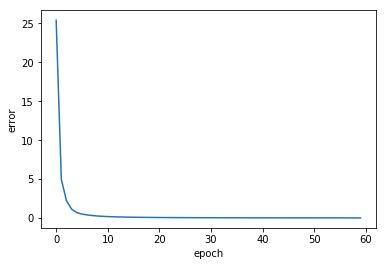

In [7]:

#Visualisations
import matplotlib.pyplot as plt

plt.plot(error_each_epoch)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()

In [8]:
print(total)
print(error_each_epoch)

0.0209798979629
[  2.54071865e+01   4.95719137e+00   2.23035260e+00   1.14228008e+00
   6.98535086e-01   5.16559705e-01   4.05674841e-01   3.27099880e-01
   2.69391555e-01   2.26188922e-01   1.93313539e-01   1.67868648e-01
   1.47823027e-01   1.31752008e-01   1.18652616e-01   1.07812132e-01
   9.87173522e-02   9.09930912e-02   8.43607153e-02   7.86100706e-02
   7.35802943e-02   6.91465338e-02   6.52106278e-02   6.16944739e-02
   5.85352416e-02   5.56818703e-02   5.30924744e-02   5.07323960e-02
   4.85727282e-02   4.65891816e-02   4.47612062e-02   4.30713046e-02
   4.15044901e-02   4.00478549e-02   3.86902242e-02   3.74218767e-02
   3.62343171e-02   3.51200895e-02   3.40726242e-02   3.30861103e-02
   3.21553898e-02   3.12758687e-02   3.04434422e-02   2.96544317e-02
   2.89055309e-02   2.81937601e-02   2.75164267e-02   2.68710921e-02
   2.62555418e-02   2.56677610e-02   2.51059121e-02   2.45683159e-02
   2.40534349e-02   2.35598588e-02   2.30862915e-02   2.26315398e-02
   2.21945034e-02 